<h1 style="text-align: center;">Tuwaiq Academy</h1>
<h1 style="text-align: center;">Data Science and Machine Learning Bootcamp</h1>
<h2 style="text-align: center;">Usecase 2 - World Happiness Report</h2>

# introduction
Happiness is an important concept for us humans, but what does it really mean? And since we are, hopefully, happy, can we measure our happiness to ensure that we are truly happy? Well, this is a difficult question to answer, and here comes the World Happiness Report to answer it broadly by measuring happiness in each country.

### Who is World Happiness Report? 
The World Happiness Report is a collaboration between Gallup, the Oxford Wellbeing Research Centre, the UN Sustainable Development Solutions Network, and the WHR’s Editorial Board. It is published under the editorial supervision of the WHR Editorial Board.

### What Does the World Happiness Report do?
The World Happiness Report highlights the global call for focusing more on happiness and well-being in government policies. It looks at the current state of happiness around the world and explains how the science of happiness helps understand differences in happiness among people and countries.

### How Does the World Happiness Report Evaluate the World's Happiness?
The World Happiness Report analyzes observed data on six factors and their connection to life evaluations to understand differences across countries. These factors include GDP per capita, social support, healthy life expectancy, freedom, generosity, and corruption. However, the happiness rankings are not determined by an index of these factors. Instead, they are based on individuals’ self-assessments of their lives, particularly their responses to the Cantril ladder life-evaluation question, much like how epidemiologists assess the effects of smoking, exercise, and diet on life expectancy.

# The Six Factors of Happiness
- ### GDP per Capita 
 The gross domestic product per person in a given country, and it is measured annually.
- ### Social Support
 Social support  is the national average of the binary responses to the Gallup World Poll (GWP) question “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?” (A yes or no question)
- ### Healthy Life Expectancy
The World Happiness Report uses data on healthy life expectancy from the WHO. WHO defines Healthy Life Expectancy as the average number of years that a newborn could expect to live, if they were to pass through life exposed to the sex- and age-specific death rates prevailing at the time of their birth, for a specific year, in a given country, territory, or geographic area.
- ### Freedom to make life choices
Freedom to make life choices is the national average of binary responses to the GWP question “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?” (A yes or no question)
- ### Generosity
Generosity is the residual of regressing the national average of GWP responses to the donation question “Have you donated money to a charity in the past month?” on log GDP per capita.
- ### Perceptions of Corruption
Perceptions of sorruption are the average of binary answers to two GWP questions: “Is corruption widespread throughout the government or not?” and “Is corruption widespread within businesses or not?” Where data for government corruption are missing, the perception of business corruption is used as the overall corruption-perception measure.

## Dystopia Residual
(Dystopia is the anit-utopia or the opposite of utopia and it is an imaginary country that has the least happy people). Each country is also compared against a hypothetical nation called Dystopia. Dystopia represents the lowest national averages for each key variable and is, along with residual error, used as a regression benchmark.

In [431]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import plotly.graph_objects as go
from plotly.subplots import make_subplots
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [104]:
#Read in the csv file and convert to a Pandas dataframe
happiness2015 = pd.read_csv('Data/2015.csv')
happiness2016 = pd.read_csv('Data/2016.csv')
happiness2017 = pd.read_csv('Data/2017.csv')
happiness2018 = pd.read_csv('Data/2018.csv')
happiness2019 = pd.read_csv('Data/2019.csv')

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

1. Chekcing the shape of each dataset

These shapes give us a few possible suggestions. There are exactly 12 features in 2015 & 2017, 13 features in 2016 and 9 features in 2018 & 2019 so, what happened here? why were some features removed in 2018 & 2019? were they less important for people's happiness?

In [28]:
print('The shape of 2015 dataset:', happiness2015.shape)
print('The shape of 2016 dataset:', happiness2016.shape)
print('The shape of 2017 dataset:', happiness2017.shape)
print('The shape of 2018 dataset:', happiness2018.shape)
print('The shape of 2019 dataset:', happiness2019.shape)

The shape of 2015 dataset: (158, 12)
The shape of 2016 dataset: (157, 13)
The shape of 2017 dataset: (155, 12)
The shape of 2018 dataset: (156, 9)
The shape of 2019 dataset: (156, 9)


2. Getting a quick look at each dataset

#### World Happiness Report 2015

In addition to the six factors we have these following columns:
- Country: represents the country name
- Region: represents the region of the country in the continent
- Happiness Rank: the order of the country in terms of happiness
- Happiness Score: represents how different the population mean is from the sample mean (how accuractyly a sample represents a population)
- Family: represents how much having a family contributes to the happines score

we can see from these first five columns that four out of the top five happies country are located in Western Europe and the fifth one is in North America

In [4]:
happiness2015.head()

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201  
2     0.34139            2.49204  
3     0.34699            2.46531  
4     0.45811            2.45176

#### World Happiness Report 2016

Two new columns have been added here and one column, Standard Error, is not found in this dataset. The new columns are Lower Confidence Interval & Upper Confidence Interval
- Confidence Interval: it is a measure of the likelihood that a prediction will be accurate 
- Lower Confidence Interval: represents the lower limits of conifdence interval
- Upper Confidence Interval: represents the upper limits of conifdence interval
</br></br>
Here, in the 2016 dataset, the top five happiest countries are all located in Westren Europe! 

In [5]:
happiness2016.head()

Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1            7.526   
1  Switzerland  Western Europe               2            7.509   
2      Iceland  Western Europe               3            7.501   
3       Norway  Western Europe               4            7.498   
4      Finland  Western Europe               5            7.413   

   Lower Confidence Interval  Upper Confidence Interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   
2                      7.333                      7.669   
3                      7.421                      7.575   
4                      7.351                      7.475   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   
2                   1.42666  1.18326                   0.86733  0.56624   
3                   1.57744  1.12690                   0.79579  0.59609   
4                   1.40598  1.13464                   0.81091  0.57104   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                        0.44453     0.36171            2.73939  
1                        0.41203     0.28083            2.69463  
2                        0.14975     0.47678            2.83137  
3                        0.35776     0.37895            2.66465  
4                        0.41004     0.25492            2.82596

#### World Happiness Report 2017

- Lower and Upper Confidence Interval have been replaced by Whisker High and Whisker Low.
- The Region feature has been removed.
- Column names have a different format.
- The top five happiest countries are still the same as the previous year but in a different order.

In [6]:
happiness2017.head()

Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
0       Norway               1            7.537      7.594445     7.479556   
1      Denmark               2            7.522      7.581728     7.462272   
2      Iceland               3            7.504      7.622030     7.385970   
3  Switzerland               4            7.494      7.561772     7.426227   
4      Finland               5            7.469      7.527542     7.410458   

   Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   
1                  1.482383  1.551122                  0.792566  0.626007   
2                  1.480633  1.610574                  0.833552  0.627163   
3                  1.564980  1.516912                  0.858131  0.620071   
4                  1.443572  1.540247                  0.809158  0.617951   

   Generosity  Trust..Government.Corruption.  Dystopia.Residual  
0    0.362012                       0.315964           2.277027  
1    0.355280                       0.400770           2.313707  
2    0.475540                       0.153527           2.322715  
3    0.290549                       0.367007           2.276716  
4    0.245483                       0.382612           2.430182

#### World Happiness Report 2018

- Whisker high and low, faimly, and dystopia residual features have been removed.
- Country feature is renamed to Country or region, Happiness Score is renmaed to score, Happiness rank is renmaed to  overall rank, Freedom is renmaed to Freedom to make life choises and Trust (Government Corruption) is renmaed to Perceptions of corruption
- A new feature, Social Support, has been added.
- The top five happiest countries are still the same as the previous year but in a different order.

In [7]:
happiness2018.head()

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.632           1.305           1.592   
1             2            Norway  7.594           1.456           1.582   
2             3           Denmark  7.555           1.351           1.590   
3             4           Iceland  7.495           1.343           1.644   
4             5       Switzerland  7.487           1.420           1.549   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.874                         0.681       0.202   
1                    0.861                         0.686       0.286   
2                    0.868                         0.683       0.284   
3                    0.914                         0.677       0.353   
4                    0.927                         0.660       0.256   

   Perceptions of corruption  
0                      0.393  
1                      0.340  
2                      0.408  
3                      0.138  
4                      0.357

#### World Happiness Report 2019

- in 2019 dataset we see that World Happiness Report decided to focus on the six features to calculate the happiness (GDP per capita,Social support, Healthy life expectancy, freedom to make life choices, Generosity, and Perceptions of corruption)
- The top five happiest countries are still the same as the previous year but in a different order.
- We also found that Finland ranked first as the happiest country in 2018 and 2019.

In [8]:
happiness2019.head()

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                      0.341  
3                      0.118  
4                      0.298

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

1. Checking the columns for each dataset.

In [9]:
happiness2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [10]:
happiness2016.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [11]:
happiness2017.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [12]:
happiness2018.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [13]:
happiness2019.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

2. Getting an overview of each dataset using info().

#### World Happiness Report 2015

Insights from the overview of the 2015 dataset:
- The number of entries (158) and how they are indexed, the columns and their names, and types, which seem correct.
- The count of each data type.
- Apparently, there are no null values in the 2015 dataset, but we still need to check for missing values.

In [4]:
happiness2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

#### World Happiness Report 2016

Insights from the overview of the 2016 dataset:
- We see here that the entires of 2016 dataset is less than 2015 entries by one. 
- the total number of each data type is increased by one (float toatl number went up to 10 ) and all of them seem correct.

In [15]:
happiness2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

#### World Happiness Report 2017

Insights from the overview of the 2017 dataset:
- The total number of entries is fewer than the total number of entries in the 2015 and 2016 datasets.
- Unlike the 2015 and 2016 datasets, we only have one object data type, which is the Country feature.
- The total number of float and int data types remains the same as in the 2016 dataset.

In [16]:
happiness2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

#### World Happiness Report 2018

Insights from the overview of the 2018 dataset:
- The total number of entries in 2018 is one more than the total number of entries in 2017, but it is still fewer than the total number of entries in 2015 and 2016.
- We have fewer features here, so the total number of float data types has decreased.

In [17]:
happiness2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


#### World Happiness Report 2019

Insights from the overview of the 2019 dataset:

The total number of entries and the total number of features, along with their names, are the same as those in the 2018 dataset. This gives us a simple glimpse that the datasets of the World Happiness Report are becoming more consistent over the years.

In [18]:
happiness2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


3. Getting more descriptive details using describe().

#### World Happiness Report 2015

More insights from 2015 dataset:
- We can understand from this that the countries are all unique and there is no duplicated country.
- There are 10 regions of continent, but Sub-Saharan Africa has the most frequncies out of these 10 regions. However, we noticed from the head rows that the top five happiest countries in the world are located in Western Europe and North America. 

In [19]:
happiness2015.describe(include='object')

Country              Region
count           158                 158
unique          158                  10
top     Switzerland  Sub-Saharan Africa
freq              1                  40

In [20]:
happiness2015.describe()

Happiness Rank  Happiness Score  Standard Error  \
count      158.000000       158.000000      158.000000   
mean        79.493671         5.375734        0.047885   
std         45.754363         1.145010        0.017146   
min          1.000000         2.839000        0.018480   
25%         40.250000         4.526000        0.037268   
50%         79.500000         5.232500        0.043940   
75%        118.750000         6.243750        0.052300   
max        158.000000         7.587000        0.136930   

       Economy (GDP per Capita)      Family  Health (Life Expectancy)  \
count                158.000000  158.000000                158.000000   
mean                   0.846137    0.991046                  0.630259   
std                    0.403121    0.272369                  0.247078   
min                    0.000000    0.000000                  0.000000   
25%                    0.545808    0.856823                  0.439185   
50%                    0.910245    1.029510                  0.696705   
75%                    1.158448    1.214405                  0.811013   
max                    1.690420    1.402230                  1.025250   

          Freedom  Trust (Government Corruption)  Generosity  \
count  158.000000                     158.000000  158.000000   
mean     0.428615                       0.143422    0.237296   
std      0.150693                       0.120034    0.126685   
min      0.000000                       0.000000    0.000000   
25%      0.328330                       0.061675    0.150553   
50%      0.435515                       0.107220    0.216130   
75%      0.549092                       0.180255    0.309883   
max      0.669730                       0.551910    0.795880   

       Dystopia Residual  
count         158.000000  
mean            2.098977  
std             0.553550  
min             0.328580  
25%             1.759410  
50%             2.095415  
75%             2.462415  
max             3.602140

##### GDP per Capita

In [21]:
#Checking the countries that their GDP per Capita didn't contribute to their happiness
#Unicef mentioned that Congo is one of the poorest countries which make sense that their GDP per Capita 
#did not contribute to their happiness.
happiness2015[happiness2015['Economy (GDP per Capita)'] == 0]

Country              Region  Happiness Rank  Happiness Score  \
119  Congo (Kinshasa)  Sub-Saharan Africa             120            4.517   

     Standard Error  Economy (GDP per Capita)  Family  \
119          0.0368                       0.0  1.0012   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
119                   0.09806  0.22605                        0.07625   

     Generosity  Dystopia Residual  
119     0.24834            2.86712

In [22]:
#Checking the coutnries that has the highest score for GDP per Capita
#well, as an Arab this makes a lot of sense! Qatar is one of the richest countries in the world.
happiness2015[happiness2015['Economy (GDP per Capita)'] == 1.690420]

Country                           Region  Happiness Rank  Happiness Score  \
27   Qatar  Middle East and Northern Africa              28            6.611   

    Standard Error  Economy (GDP per Capita)  Family  \
27         0.06257                   1.69042  1.0786   

    Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
27                   0.79733   0.6404                        0.52208   

    Generosity  Dystopia Residual  
27     0.32573            1.55674

##### Family

In [23]:
# Checking the coutnries that Family feature did not contribute to their happiness
# Central African Republic is a poor country but its GDP contributed to their happiness unlike Congo
# that family feature has more contribution to their happiness. 
# How much family and money are importnat for poor and rich countries? Which one is more importnat?

happiness2015[happiness2015['Family'] == 0]

Country              Region  Happiness Rank  \
147  Central African Republic  Sub-Saharan Africa             148   

     Happiness Score  Standard Error  Economy (GDP per Capita)  Family  \
147            3.678         0.06112                    0.0785     0.0   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
147                   0.06699  0.48879                        0.08289   

     Generosity  Dystopia Residual  
147     0.23835             2.7223

In [24]:
#Checking the coutnries that has the highest score for Family
#We can see here that Iceland, the second happiest country in the world for 2015, has the family 
#feature contributing more to its happiness than GDP per capita (interesting!).
happiness2015[happiness2015['Family'] == 1.402230]

Country          Region  Happiness Rank  Happiness Score  Standard Error  \
1  Iceland  Western Europe               2            7.561         0.04884   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
1                   1.30232  1.40223                   0.94784  0.62877   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
1                        0.14145      0.4363            2.70201

#### Health (Life Expectancy) feature

In [25]:
# Checking the coutnries that Health (Life Expectancy) feature did not contribute to their happiness
# WHO says that the life expectancy in Sierra Leone is 50 years, and maternal and child mortality 
# are among the highest in the world.
happiness2015[happiness2015['Health (Life Expectancy)'] == 0]

Country              Region  Happiness Rank  Happiness Score  \
122  Sierra Leone  Sub-Saharan Africa             123            4.507   

     Standard Error  Economy (GDP per Capita)   Family  \
122         0.07068                   0.33024  0.95571   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
122                       0.0   0.4084                        0.08786   

     Generosity  Dystopia Residual  
122     0.21488            2.51009

In [26]:
#Checking the coutnries that has the highest score for Health (Life Expectancy) feature
happiness2015[happiness2015['Health (Life Expectancy)'] == 1.025250]

Country             Region  Happiness Rank  Happiness Score  \
23  Singapore  Southeastern Asia              24            6.798   

    Standard Error  Economy (GDP per Capita)  Family  \
23          0.0378                   1.52186    1.02   

    Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
23                   1.02525  0.54252                         0.4921   

    Generosity  Dystopia Residual  
23     0.31105            1.88501

##### Freedom

In [27]:
# Checking the coutnries that Freedom feature did not contribute to their happiness
happiness2015[happiness2015['Freedom'] == 0]

Country                           Region  Happiness Rank  Happiness Score  \
111    Iraq  Middle East and Northern Africa             112            4.677   

     Standard Error  Economy (GDP per Capita)   Family  \
111         0.05232                   0.98549  0.81889   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
111                   0.60237      0.0                        0.13788   

     Generosity  Dystopia Residual  
111     0.17922            1.95335

In [28]:
#Checking the coutnries that has the highest score for Freedom feature
happiness2015[happiness2015['Freedom'] == 0.669730]

Country          Region  Happiness Rank  Happiness Score  Standard Error  \
3  Norway  Western Europe               4            7.522          0.0388   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
3                     1.459  1.33095                   0.88521  0.66973   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
3                        0.36503     0.34699            2.46531

##### Trust (Government Corruption)

In [29]:
happiness2015[happiness2015['Trust (Government Corruption)'] == 0]

Country             Region  Happiness Rank  Happiness Score  \
73  Indonesia  Southeastern Asia              74            5.399   

    Standard Error  Economy (GDP per Capita)   Family  \
73         0.02596                   0.82827  1.08708   

    Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
73                   0.63793  0.46611                            0.0   

    Generosity  Dystopia Residual  
73     0.51535            1.86399

In [30]:
happiness2015[happiness2015['Trust (Government Corruption)'] == 0.551910]

Country              Region  Happiness Rank  Happiness Score  \
153  Rwanda  Sub-Saharan Africa             154            3.465   

     Standard Error  Economy (GDP per Capita)  Family  \
153         0.03464                   0.22208  0.7737   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
153                   0.42864  0.59201                        0.55191   

     Generosity  Dystopia Residual  
153     0.22628            0.67042

##### Generosity

In [31]:
# This is intersting! I have always heared that Greeks are generous. So, why generosity did not 
# contribute to their happiness? it could be that their generosity is based on their hosting skills, 
# not on how World Happiness Report measures generoisty.
happiness2015[happiness2015['Generosity'] == 0]

Country          Region  Happiness Rank  Happiness Score  Standard Error  \
101  Greece  Western Europe             102            4.857         0.05062   

     Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
101                   1.15406  0.92933                   0.88213  0.07699   

     Trust (Government Corruption)  Generosity  Dystopia Residual  
101                        0.01397         0.0            1.80101

In [32]:
happiness2015[happiness2015['Generosity'] == 0.795880]

Country             Region  Happiness Rank  Happiness Score  \
128  Myanmar  Southeastern Asia             129            4.307   

     Standard Error  Economy (GDP per Capita)   Family  \
128         0.04351                   0.27108  0.70905   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
128                   0.48246  0.44017                        0.19034   

     Generosity  Dystopia Residual  
128     0.79588            1.41805

#### World Happiness Report 2016

More insights from 2016 dataset:

- We see here, that no country is duplicated, and Denamrk is the happiest country in 2016.
- The Sub-Saharan Africa  is still the most frequented region, but this time with less total number of frequncies which means two  countries from Sub-Saharan Africa are not recorded in 2016


In [33]:
#We see here, that no country is duplicated, and Denmark is the happiest country in the world in 2016
happiness2016.describe(include='object')

Country              Region
count       157                 157
unique      157                  10
top     Denmark  Sub-Saharan Africa
freq          1                  38

##### GDP per Capita

In [34]:
#Checking the countries that their GDP per Capita didn't contribute to their happiness
#The result changed from Congo to Somalia, which is also a poor country
happiness2016[happiness2016['Economy (GDP per Capita)'] == 0]

Country              Region  Happiness Rank  Happiness Score  \
75  Somalia  Sub-Saharan Africa              76             5.44   

    Lower Confidence Interval  Upper Confidence Interval  \
75                      5.321                      5.559   

    Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
75                       0.0  0.33613                   0.11466  0.56778   

    Trust (Government Corruption)  Generosity  Dystopia Residual  
75                         0.3118     0.27225            3.83772

In [35]:
#Checking what happened to Congo in 2016
#This indicates that Congo has a better economy for Congo. However, Congo ranked 119 in 2015, but here 
# ranked 124! 
happiness2016[happiness2016['Country'] == 'Congo (Kinshasa)']

Country              Region  Happiness Rank  Happiness Score  \
124  Congo (Kinshasa)  Sub-Saharan Africa             125            4.272   

     Lower Confidence Interval  Upper Confidence Interval  \
124                      4.191                      4.353   

     Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
124                   0.05661  0.80676                     0.188  0.15602   

     Trust (Government Corruption)  Generosity  Dystopia Residual  
124                        0.06075     0.25458            2.74924

In [36]:
#Checking the coutnries that has the highest score for GDP per Capita
# in both 2015 and 2016 Qatar's GDP per Capita was the highest that contributed to a country happiness,
#but Qatar ranked 27 in 2015 and in 2016 it ranked 35!
happiness2016[happiness2016['Economy (GDP per Capita)'] == 1.824270]

Country                           Region  Happiness Rank  Happiness Score  \
35   Qatar  Middle East and Northern Africa              36            6.375   

    Lower Confidence Interval  Upper Confidence Interval  \
35                      6.178                      6.572   

    Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
35                   1.82427  0.87964                   0.71723  0.56679   

    Trust (Government Corruption)  Generosity  Dystopia Residual  
35                        0.48049     0.32388            1.58224

##### Family

In [37]:
# Checking the coutnries that Family feature did not contribute to their happiness
happiness2016[happiness2016['Family'] == 0]

Country              Region  Happiness Rank  Happiness Score  \
154    Togo  Sub-Saharan Africa             155            3.303   

     Lower Confidence Interval  Upper Confidence Interval  \
154                      3.192                      3.414   

     Economy (GDP per Capita)  Family  Health (Life Expectancy)  Freedom  \
154                   0.28123     0.0                   0.24811  0.34678   

     Trust (Government Corruption)  Generosity  Dystopia Residual  
154                        0.11587     0.17517             2.1354

In [38]:
# Checking what happened to Central African Republic
# It seems that Central African Republic was not recorded for 2016 dataset
happiness2016[happiness2016['Country'] == 'Central African Republic']  

Empty DataFrame
Columns: [Country, Region, Happiness Rank, Happiness Score, Lower Confidence Interval, Upper Confidence Interval, Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity, Dystopia Residual]
Index: []

In [39]:
#Checking the coutnries that has the highest score for Family
#It is still Iceland. However, Iceland ranked 1 in 2015 dataset, but ranked 2 in 2016 dataset
happiness2016[happiness2016['Family'] == 1.183260]

Country          Region  Happiness Rank  Happiness Score  \
2  Iceland  Western Europe               3            7.501   

   Lower Confidence Interval  Upper Confidence Interval  \
2                      7.333                      7.669   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
2                   1.42666  1.18326                   0.86733  0.56624   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
2                        0.14975     0.47678            2.83137

#### Health (Life Expectancy) feature

In [40]:
# Checking the coutnries that Health (Life Expectancy) feature did not contribute to their happiness
# It is still Sierra Leone. in 2015 dataset, it ranked 122, but in 2016 dataset it ranked 110.
# People in Sierra Leone have a shorter life expectancy, but they are happier than the previous year!
happiness2016[happiness2016['Health (Life Expectancy)'] == 0]

Country              Region  Happiness Rank  Happiness Score  \
110  Sierra Leone  Sub-Saharan Africa             111            4.635   

     Lower Confidence Interval  Upper Confidence Interval  \
110                      4.505                      4.765   

     Economy (GDP per Capita)  Family  Health (Life Expectancy)  Freedom  \
110                   0.36485   0.628                       0.0  0.30685   

     Trust (Government Corruption)  Generosity  Dystopia Residual  
110                        0.08196     0.23897            3.01402

In [41]:
#Checking the coutnries that has the highest score for Health (Life Expectancy) feature
happiness2016[happiness2016['Health (Life Expectancy)'] == 0.952770]

Country        Region  Happiness Rank  Happiness Score  \
74  Hong Kong  Eastern Asia              75            5.458   

    Lower Confidence Interval  Upper Confidence Interval  \
74                      5.362                      5.554   

    Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
74                    1.5107  0.87021                   0.95277  0.48079   

    Trust (Government Corruption)  Generosity  Dystopia Residual  
74                        0.31647     0.40097            0.92614

##### Freedom

In [42]:
# Checking the coutnries that Freedom feature did not contribute to their happiness
happiness2016[happiness2016['Freedom'] == 0]

Country              Region  Happiness Rank  Happiness Score  \
132   Sudan  Sub-Saharan Africa             133            4.139   

     Lower Confidence Interval  Upper Confidence Interval  \
132                      3.928                       4.35   

     Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
132                   0.63069  0.81928                   0.29759      0.0   

     Trust (Government Corruption)  Generosity  Dystopia Residual  
132                        0.10039     0.18077            2.10995

In [43]:
# Checking what happened to Irag
# It seems that Iraq is still in the same rank as 2015, but the freedom contributes more to their 
# happiness
happiness2016[happiness2016['Country'] == 'Iraq']

Country                           Region  Happiness Rank  Happiness Score  \
111    Iraq  Middle East and Northern Africa             112            4.575   

     Lower Confidence Interval  Upper Confidence Interval  \
111                      4.446                      4.704   

     Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
111                   1.07474  0.59205                   0.51076  0.24856   

     Trust (Government Corruption)  Generosity  Dystopia Residual  
111                        0.13636     0.19589            1.81657

In [44]:
#Checking the coutnries that has the highest score for Freedom feature
#the result changed from Norway to Uzbekistan
happiness2016[happiness2016['Freedom'] == 0.608480] 

Country                      Region  Happiness Rank  Happiness Score  \
48  Uzbekistan  Central and Eastern Europe              49            5.987   

    Lower Confidence Interval  Upper Confidence Interval  \
48                      5.896                      6.078   

    Economy (GDP per Capita)  Family  Health (Life Expectancy)  Freedom  \
48                   0.73591  1.1681                   0.50163  0.60848   

    Trust (Government Corruption)  Generosity  Dystopia Residual  
48                        0.28333     0.34326            2.34638

In [45]:
# Checking what happened to Norway
happiness2016[happiness2016['Country'] == 'Norway']

Country          Region  Happiness Rank  Happiness Score  \
3  Norway  Western Europe               4            7.498   

   Lower Confidence Interval  Upper Confidence Interval  \
3                      7.421                      7.575   

   Economy (GDP per Capita)  Family  Health (Life Expectancy)  Freedom  \
3                   1.57744  1.1269                   0.79579  0.59609   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
3                        0.35776     0.37895            2.66465

##### Trust (Government Corruption)

In [46]:
happiness2016[happiness2016['Trust (Government Corruption)'] == 0]

Country                      Region  Happiness Rank  \
86  Bosnia and Herzegovina  Central and Eastern Europe              87   

    Happiness Score  Lower Confidence Interval  Upper Confidence Interval  \
86            5.163                      5.063                      5.263   

    Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
86                   0.93383  0.64367                   0.70766  0.09511   

    Trust (Government Corruption)  Generosity  Dystopia Residual  
86                            0.0     0.29889            2.48406

In [47]:
#It is still Rwanda
happiness2016[happiness2016['Trust (Government Corruption)'] == 0.505210]

Country              Region  Happiness Rank  Happiness Score  \
151  Rwanda  Sub-Saharan Africa             152            3.515   

     Lower Confidence Interval  Upper Confidence Interval  \
151                      3.444                      3.586   

     Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
151                   0.32846  0.61586                   0.31865   0.5432   

     Trust (Government Corruption)  Generosity  Dystopia Residual  
151                        0.50521     0.23552            0.96819

##### Generosity

In [48]:
#It is still Greece, but its ranked changed from 101 to 98
happiness2016[happiness2016['Generosity'] == 0]

Country          Region  Happiness Rank  Happiness Score  \
98  Greece  Western Europe              99            5.033   

    Lower Confidence Interval  Upper Confidence Interval  \
98                      4.935                      5.131   

    Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
98                   1.24886  0.75473                   0.80029  0.05822   

    Trust (Government Corruption)  Generosity  Dystopia Residual  
98                        0.04127         0.0            2.12944

In [49]:
#It is still Myanmar, but its ranked changed from 128 to 118
happiness2016[happiness2016['Generosity'] == 0.819710]

Country             Region  Happiness Rank  Happiness Score  \
118  Myanmar  Southeastern Asia             119            4.395   

     Lower Confidence Interval  Upper Confidence Interval  \
118                      4.327                      4.463   

     Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
118                   0.34112  0.69981                    0.3988  0.42692   

     Trust (Government Corruption)  Generosity  Dystopia Residual  
118                        0.20243     0.81971            1.50655

#### World Happiness Report 2017

In [50]:
#We see here, that no country is duplicated, and Finland is the happiest country in the world in 2018
happiness2018.describe(include='object')

Country or region
count                156
unique               156
top              Finland
freq                   1

In [51]:
happiness2017.describe()

Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
count      155.000000       155.000000    155.000000   155.000000   
mean        78.000000         5.354019      5.452326     5.255713   
std         44.888751         1.131230      1.118542     1.145030   
min          1.000000         2.693000      2.864884     2.521116   
25%         39.500000         4.505500      4.608172     4.374955   
50%         78.000000         5.279000      5.370032     5.193152   
75%        116.500000         6.101500      6.194600     6.006527   
max        155.000000         7.537000      7.622030     7.479556   

       Economy..GDP.per.Capita.      Family  Health..Life.Expectancy.  \
count                155.000000  155.000000                155.000000   
mean                   0.984718    1.188898                  0.551341   
std                    0.420793    0.287263                  0.237073   
min                    0.000000    0.000000                  0.000000   
25%                    0.663371    1.042635                  0.369866   
50%                    1.064578    1.253918                  0.606042   
75%                    1.318027    1.414316                  0.723008   
max                    1.870766    1.610574                  0.949492   

          Freedom  Generosity  Trust..Government.Corruption.  \
count  155.000000  155.000000                     155.000000   
mean     0.408786    0.246883                       0.123120   
std      0.149997    0.134780                       0.101661   
min      0.000000    0.000000                       0.000000   
25%      0.303677    0.154106                       0.057271   
50%      0.437454    0.231538                       0.089848   
75%      0.516561    0.323762                       0.153296   
max      0.658249    0.838075                       0.464308   

       Dystopia.Residual  
count         155.000000  
mean            1.850238  
std             0.500028  
min             0.377914  
25%             1.591291  
50%             1.832910  
75%             2.144654  
max             3.117485

##### GDP per Capita

In [52]:
#Checking the countries that their GDP per Capita didn't contribute to their happiness
#this mean Central African Republic is recorded after it wasn't recorded in 2016
happiness2017[happiness2017['Economy..GDP.per.Capita.'] == 0]

Country  Happiness.Rank  Happiness.Score  Whisker.high  \
154  Central African Republic             155            2.693      2.864884   

     Whisker.low  Economy..GDP.per.Capita.  Family  Health..Life.Expectancy.  \
154     2.521116                       0.0     0.0                  0.018773   

      Freedom  Generosity  Trust..Government.Corruption.  Dystopia.Residual  
154  0.270842    0.280876                       0.056565           2.066005

In [53]:
#Checking the coutnries that has the highest score for GDP per Capita
#It is still Qatar for the third year in a row! However, its ranking went lower.
happiness2017[happiness2017['Economy..GDP.per.Capita.'].round(6) == 1.870766]

Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
34   Qatar              35            6.375      6.568477     6.181523   

    Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
34                  1.870766  1.274297                  0.710098  0.604131   

    Generosity  Trust..Government.Corruption.  Dystopia.Residual  
34    0.330474                       0.439299           1.145464

##### Family

In [54]:
# Checking the coutnries that Family feature did not contribute to their happiness
# It seems that Centeral African Republic is back to be the least happiest country in the world

happiness2017[happiness2017['Family'] == 0]

Country  Happiness.Rank  Happiness.Score  Whisker.high  \
154  Central African Republic             155            2.693      2.864884   

     Whisker.low  Economy..GDP.per.Capita.  Family  Health..Life.Expectancy.  \
154     2.521116                       0.0     0.0                  0.018773   

      Freedom  Generosity  Trust..Government.Corruption.  Dystopia.Residual  
154  0.270842    0.280876                       0.056565           2.066005

In [55]:
# Checking to find what happened to Togo
# Now, Togo seems to be happier than it was in 2016
happiness2017[happiness2017['Country'] == 'Togo']

Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
149    Togo             150            3.495      3.594038     3.395962   

     Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
149                  0.305445  0.431883                  0.247106  0.380426   

     Generosity  Trust..Government.Corruption.  Dystopia.Residual  
149    0.196896                       0.095665           1.837229

In [56]:
#Checking the coutnries that has the highest score for Family
#For the third year in a row, Iceland has the highest score for Family feature contribution to their 
#happiness
happiness2017[happiness2017['Family'].round(6) == 1.610574]

Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
2  Iceland               3            7.504       7.62203      7.38597   

   Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
2                  1.480633  1.610574                  0.833552  0.627163   

   Generosity  Trust..Government.Corruption.  Dystopia.Residual  
2     0.47554                       0.153527           2.322715

#### Health (Life Expectancy) feature

In [57]:
# Checking the coutnries that Health (Life Expectancy) feature did not contribute to their happiness
happiness2017[happiness2017['Health..Life.Expectancy.'] == 0]

Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
138  Lesotho             139            3.808      4.044344     3.571656   

     Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
138                  0.521021  1.190095                       0.0  0.390661   

     Generosity  Trust..Government.Corruption.  Dystopia.Residual  
138    0.157497                       0.119095           1.429835

In [58]:
# Checking what happened to Sierra Leone
# It seems that finally Sierra Leone has a better health life expectany than it had in 2015 and 2016
happiness2017[happiness2017['Country'] == 'Sierra Leone']

Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
105  Sierra Leone             106            4.709      4.850643     4.567357   

     Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
105                  0.368421  0.984136                  0.005565  0.318698   

     Generosity  Trust..Government.Corruption.  Dystopia.Residual  
105    0.293041                       0.071095            2.66846

In [59]:
#Checking the coutnries that has the highest score for 'Health..Life.Expectancy. feature
# Singapore is back for the best health life expectancy 
happiness2017[happiness2017['Health..Life.Expectancy.'].round(6) == 0.949492]

Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
25  Singapore              26            6.572      6.636723     6.507277   

    Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
25                  1.692278  1.353814                  0.949492  0.549841   

    Generosity  Trust..Government.Corruption.  Dystopia.Residual  
25    0.345966                       0.464308           1.216362

In [60]:
# Checking to find what happened to Hong Kong
#happiness2017[happiness2017['Country'] == 'Hong Kong'] This didn't return Hong Kong
#the format of Hong Kong's name is changed! (inconsistency!) -> fixing it in data cleaning
#Hong Kong moved up in ranking
happiness2017[happiness2017['Country'].str.contains('Hong Kong', case=False, na=False)] 

Country  Happiness.Rank  Happiness.Score  Whisker.high  \
70  Hong Kong S.A.R., China              71            5.472      5.549594   

    Whisker.low  Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.  \
70     5.394406                  1.551675  1.262791                  0.943062   

     Freedom  Generosity  Trust..Government.Corruption.  Dystopia.Residual  
70  0.490969    0.374466                       0.293934           0.554633

##### Freedom

In [61]:
# Checking the coutnries that Freedom feature did not contribute to their happiness
happiness2017[happiness2017['Freedom'] == 0]

Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
139  Angola             140            3.795      3.951642     3.638358   

     Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.  Freedom  \
139                  0.858428  1.104412                  0.049869      0.0   

     Generosity  Trust..Government.Corruption.  Dystopia.Residual  
139    0.097926                        0.06972           1.614482

In [62]:
# Checking what happened to Sudan
# Sudan moved up in the ranking
happiness2017[happiness2017['Country'] == 'Sudan']

Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
129   Sudan             130            4.139      4.345747     3.932253   

     Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
129                  0.659517  1.214009                  0.290921  0.014996   

     Generosity  Trust..Government.Corruption.  Dystopia.Residual  
129    0.182317                       0.089848           1.687066

In [63]:
#Checking the coutnries that has the highest score for Freedom feature
# It still Uzbekistan and it moved up in the ranking
happiness2017[happiness2017['Freedom'].round(6) == 0.658249]

Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
46  Uzbekistan              47            5.971      6.065538     5.876463   

    Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
46                  0.786441  1.548969                  0.498273  0.658249   

    Generosity  Trust..Government.Corruption.  Dystopia.Residual  
46    0.415984                       0.246528           1.816914

##### Trust (Government Corruption)

In [64]:
happiness2017[happiness2017['Trust..Government.Corruption.'] == 0]

Country  Happiness.Rank  Happiness.Score  Whisker.high  \
89  Bosnia and Herzegovina              90            5.182      5.276336   

    Whisker.low  Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.  \
89     5.087665                  0.982409  1.069336                  0.705186   

     Freedom  Generosity  Trust..Government.Corruption.  Dystopia.Residual  
89  0.204403    0.328867                            0.0           1.892173

In [65]:
happiness2017[happiness2017['Trust..Government.Corruption.'].round(6) == 0.464308]

Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
25  Singapore              26            6.572      6.636723     6.507277   

    Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
25                  1.692278  1.353814                  0.949492  0.549841   

    Generosity  Trust..Government.Corruption.  Dystopia.Residual  
25    0.345966                       0.464308           1.216362

##### Generosity

In [66]:
# It is Greece for the third year in a row, and it moved up in the ranking!
happiness2017[happiness2017['Generosity'] == 0]

Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
86  Greece              87            5.227      5.325246     5.128754   

    Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
86                  1.289487  1.239415                  0.810199  0.095731   

    Generosity  Trust..Government.Corruption.  Dystopia.Residual  
86         0.0                        0.04329           1.749222

In [67]:
#It is still Myanmar for the third year in a row, but it moved up in the ranking

happiness2017[happiness2017['Generosity'].round(6)== 0.838075]

Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
113  Myanmar             114            4.545       4.61474      4.47526   

     Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
113                  0.367111  1.123236                  0.397523  0.514492   

     Generosity  Trust..Government.Corruption.  Dystopia.Residual  
113    0.838075                       0.188816            1.11529

#### World Happiness Report 2018

In [68]:
#No duplicated countries and Finland is the happiest country in the world in 2018
happiness2018.describe(include='object')

Country or region
count                156
unique               156
top              Finland
freq                   1

In [69]:
happiness2018.describe()

Overall rank       Score  GDP per capita  Social support  \
count    156.000000  156.000000      156.000000      156.000000   
mean      78.500000    5.375917        0.891449        1.213237   
std       45.177428    1.119506        0.391921        0.302372   
min        1.000000    2.905000        0.000000        0.000000   
25%       39.750000    4.453750        0.616250        1.066750   
50%       78.500000    5.378000        0.949500        1.255000   
75%      117.250000    6.168500        1.197750        1.463000   
max      156.000000    7.632000        2.096000        1.644000   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               156.000000                    156.000000  156.000000   
mean                  0.597346                      0.454506    0.181006   
std                   0.247579                      0.162424    0.098471   
min                   0.000000                      0.000000    0.000000   
25%                   0.422250                      0.356000    0.109500   
50%                   0.644000                      0.487000    0.174000   
75%                   0.777250                      0.578500    0.239000   
max                   1.030000                      0.724000    0.598000   

       Perceptions of corruption  
count                 155.000000  
mean                    0.112000  
std                     0.096492  
min                     0.000000  
25%                     0.051000  
50%                     0.082000  
75%                     0.137000  
max                     0.457000

#### GDP per Capita

In [70]:
#Checking the countries that their GDP per Capita didn't contribute to their happiness
happiness2018[happiness2018['GDP per capita'] == 0]

Overall rank Country or region  Score  GDP per capita  Social support  \
97            98           Somalia  4.982             0.0           0.712   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
97                    0.115                         0.674       0.238   

    Perceptions of corruption  
97                      0.282

In [71]:
#Checking to find what happened to Central African Rupblic
#Its GDP is better than Somalia but it is still on of the least happiest countries in the world
happiness2018[happiness2018['Country or region'] == 'Central African Republic']

Overall rank         Country or region  Score  GDP per capita  \
154           155  Central African Republic  3.083           0.024   

     Social support  Healthy life expectancy  Freedom to make life choices  \
154             0.0                     0.01                         0.305   

     Generosity  Perceptions of corruption  
154       0.218                      0.038

In [72]:
#Checking the coutnries that has the highest score for GDP per Capita
# This time it changed from Qatar to UAE! and it has a better rank than Qatar had in 2015, 2016, and 
# 2017!
happiness2018[happiness2018['GDP per capita'] == 2.096000]

Overall rank     Country or region  Score  GDP per capita  Social support  \
19            20  United Arab Emirates  6.774           2.096           0.776   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
19                     0.67                         0.284       0.186   

    Perceptions of corruption  
19                        NaN

In [73]:
# Checking to find what happened to Qatar
happiness2018[happiness2018['Country or region'] == 'Qatar']

Overall rank Country or region  Score  GDP per capita  Social support  \
31            32             Qatar  6.374           1.649           1.303   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
31                    0.748                         0.654       0.256   

    Perceptions of corruption  
31                      0.171

#### Social Support

In [74]:
# Checking the countries that their Social Support didn't contribute to their happiness
happiness2018[happiness2018['Social support'] == 0]

Overall rank         Country or region  Score  GDP per capita  \
154           155  Central African Republic  3.083           0.024   

     Social support  Healthy life expectancy  Freedom to make life choices  \
154             0.0                     0.01                         0.305   

     Generosity  Perceptions of corruption  
154       0.218                      0.038

In [75]:
#Checking the coutnries that has the highest score for Social Support
# Family feature is removed, but Iceland always had the best score. It is not surpising to see it here, too
happiness2018[happiness2018['Social support'] == 1.644000]

Overall rank Country or region  Score  GDP per capita  Social support  \
3             4           Iceland  7.495           1.343           1.644   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
3                    0.914                         0.677       0.353   

   Perceptions of corruption  
3                      0.138

#### Healthy Life Expectancy

In [76]:
# Checking the countries that their Healthy Life Expectancy didn't contribute to their happiness
# Sierra Leone came back and its rank moved down!
happiness2018[happiness2018['Healthy life expectancy'] == 0]

Overall rank Country or region  Score  GDP per capita  Social support  \
112           113      Sierra Leone  4.571           0.256           0.813   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
112                      0.0                         0.355       0.238   

     Perceptions of corruption  
112                      0.053

In [77]:
#Checking to find what happened to Lesotho
happiness2018[happiness2018['Country or region'] == 'Lesotho']

Overall rank Country or region  Score  GDP per capita  Social support  \
140           141           Lesotho  3.808           0.472           1.215   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
140                    0.079                         0.423       0.116   

     Perceptions of corruption  
140                      0.112

In [78]:
#Checking the coutnries that has the highest score for Healthy Life Expectancy
#Hong Kong is back
happiness2018[happiness2018['Healthy life expectancy'] == 1.030000]

Overall rank Country or region  Score  GDP per capita  Social support  \
75            76         Hong Kong   5.43           1.405            1.29   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
75                     1.03                         0.524       0.246   

    Perceptions of corruption  
75                      0.291

In [79]:
# Checking to find what happened to Singapore
# It moved down in ranking
happiness2018[happiness2018['Country or region'] == 'Singapore']

Overall rank Country or region  Score  GDP per capita  Social support  \
33            34         Singapore  6.343           1.529           1.451   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
33                    1.008                         0.631       0.261   

    Perceptions of corruption  
33                      0.457

#### Freedom to make life choices

In [80]:
# Checking the countries that their Freedom to make life choices didn't contribute to their happiness
happiness2018[happiness2018['Freedom to make life choices'] == 0]

Overall rank Country or region  Score  GDP per capita  Social support  \
141           142            Angola  3.795            0.73           1.125   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
141                    0.269                           0.0       0.079   

     Perceptions of corruption  
141                      0.061

In [81]:
#Checking the coutnries that has the highest score for Freedom to make life choices
#It is still Uzbekistan and it moved up in ranking
happiness2018[happiness2018['Freedom to make life choices'] == 0.724000]

Overall rank Country or region  Score  GDP per capita  Social support  \
43            44        Uzbekistan  6.096           0.719           1.584   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
43                    0.605                         0.724       0.328   

    Perceptions of corruption  
43                      0.259

#### Generosity

In [82]:
# Checking the countries that their Generosity didn't contribute to their happiness
#It is still Greece for the fourth year in a row, and it moved up in ranking
happiness2018[happiness2018['Generosity'] == 0]

Overall rank Country or region  Score  GDP per capita  Social support  \
78            79            Greece  5.358           1.154           1.202   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
78                    0.879                         0.131         0.0   

    Perceptions of corruption  
78                      0.044

In [83]:
#Checking the coutnries that has the highest score for Generosity
#It is still Mynamar for the fourth year in a row, and it moved down in the ranking
happiness2018[happiness2018['Generosity'] == 0.598000]

Overall rank Country or region  Score  GDP per capita  Social support  \
129           130           Myanmar  4.308           0.682           1.174   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
129                    0.429                          0.58       0.598   

     Perceptions of corruption  
129                      0.178

#### Perceptions of corruption

In [84]:
# Checking the countries that their Perceptions of corruption didn't contribute to their happiness
happiness2018[happiness2018['Perceptions of corruption'] == 0]

Overall rank       Country or region  Score  GDP per capita  \
66            67                 Moldova  5.640           0.657   
92            93  Bosnia and Herzegovina  5.129           0.915   

    Social support  Healthy life expectancy  Freedom to make life choices  \
66           1.301                    0.620                         0.232   
92           1.078                    0.758                         0.280   

    Generosity  Perceptions of corruption  
66       0.171                        0.0  
92       0.216                        0.0

In [85]:
#Checking the coutnries that has the highest score for Perceptions of corruption
happiness2018[happiness2018['Perceptions of corruption'] == 0.457000]

Overall rank Country or region  Score  GDP per capita  Social support  \
33            34         Singapore  6.343           1.529           1.451   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
33                    1.008                         0.631       0.261   

    Perceptions of corruption  
33                      0.457

#### World Happiness Report 2019

In [86]:
#We see here, that no country is duplicated, and Finland is the happiest country in the world in 2019. The total number
#of countries is still the same as 2018
happiness2019.describe(include='object')

Country or region
count                156
unique               156
top              Finland
freq                   1

In [87]:
happiness2019.describe()

Overall rank       Score  GDP per capita  Social support  \
count    156.000000  156.000000      156.000000      156.000000   
mean      78.500000    5.407096        0.905147        1.208814   
std       45.177428    1.113120        0.398389        0.299191   
min        1.000000    2.853000        0.000000        0.000000   
25%       39.750000    4.544500        0.602750        1.055750   
50%       78.500000    5.379500        0.960000        1.271500   
75%      117.250000    6.184500        1.232500        1.452500   
max      156.000000    7.769000        1.684000        1.624000   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               156.000000                    156.000000  156.000000   
mean                  0.725244                      0.392571    0.184846   
std                   0.242124                      0.143289    0.095254   
min                   0.000000                      0.000000    0.000000   
25%                   0.547750                      0.308000    0.108750   
50%                   0.789000                      0.417000    0.177500   
75%                   0.881750                      0.507250    0.248250   
max                   1.141000                      0.631000    0.566000   

       Perceptions of corruption  
count                 156.000000  
mean                    0.110603  
std                     0.094538  
min                     0.000000  
25%                     0.047000  
50%                     0.085500  
75%                     0.141250  
max                     0.453000

#### GDP per Capita

In [88]:
#Checking the countries that their GDP per Capita didn't contribute to their happiness
#It is still Somalia and it moved down in the ranking
happiness2019[happiness2019['GDP per capita'] == 0]

Overall rank Country or region  Score  GDP per capita  Social support  \
111           112           Somalia  4.668             0.0           0.698   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
111                    0.268                         0.559       0.243   

     Perceptions of corruption  
111                       0.27

In [89]:
#Checking the coutnries that has the highest score for GDP per Capita
# Qatar returned to be has the best score in GDP per Capita and it moved up in the ranking
happiness2019[happiness2019['GDP per capita'] == 1.684000]

Overall rank Country or region  Score  GDP per capita  Social support  \
28            29             Qatar  6.374           1.684           1.313   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
28                    0.871                         0.555        0.22   

    Perceptions of corruption  
28                      0.167

In [90]:
# Checking to find what happened to UAE
#has the same ranking as the previous year
happiness2018[happiness2018['Country or region'] == 'United Arab Emirates']

Overall rank     Country or region  Score  GDP per capita  Social support  \
19            20  United Arab Emirates  6.774           2.096           0.776   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
19                     0.67                         0.284       0.186   

    Perceptions of corruption  
19                        NaN

#### Social Support

In [91]:
# Checking the countries that their Social Support didn't contribute to their happiness
# It is still Central African Republic
happiness2019[happiness2019['Social support'] == 0]

Overall rank         Country or region  Score  GDP per capita  \
154           155  Central African Republic  3.083           0.026   

     Social support  Healthy life expectancy  Freedom to make life choices  \
154             0.0                    0.105                         0.225   

     Generosity  Perceptions of corruption  
154       0.235                      0.035

In [92]:
#Checking the coutnries that has the highest score for Social Support
#It is still Iceland 
happiness2019[happiness2019['Social support'].round(6) == 1.624000]

Overall rank Country or region  Score  GDP per capita  Social support  \
3             4           Iceland  7.494            1.38           1.624   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
3                    1.026                         0.591       0.354   

   Perceptions of corruption  
3                      0.118

#### Healthy Life Expectancy

In [93]:
# Checking the countries that their Healthy Life Expectancy didn't contribute to their happiness
happiness2019[happiness2019['Healthy life expectancy'] == 0]

Overall rank Country or region  Score  GDP per capita  Social support  \
134           135         Swaziland  4.212           0.811           1.149   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
134                      0.0                         0.313       0.074   

     Perceptions of corruption  
134                      0.135

In [94]:
#Checking to find what happened to Sierra Leone
happiness2019[happiness2019['Country or region'] == 'Sierra Leone']

Overall rank Country or region  Score  GDP per capita  Social support  \
128           129      Sierra Leone  4.374           0.268           0.841   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
128                    0.242                         0.309       0.252   

     Perceptions of corruption  
128                      0.045

In [95]:
#Checking the coutnries that has the highest score for Healthy Life Expectancy
#Hong Kong is back
happiness2019[happiness2019['Healthy life expectancy'] == 1.141000]

Overall rank Country or region  Score  GDP per capita  Social support  \
33            34         Singapore  6.262           1.572           1.463   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
33                    1.141                         0.556       0.271   

    Perceptions of corruption  
33                      0.453

In [96]:
# Checking to find what happened to Hong Kong
# It moved down in ranking
happiness2019[happiness2019['Country or region'] == 'Hong Kong']

Overall rank Country or region  Score  GDP per capita  Social support  \
75            76         Hong Kong   5.43           1.438           1.277   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
75                    1.122                          0.44       0.258   

    Perceptions of corruption  
75                      0.287

#### Freedom to make life choices

In [97]:
# Checking the countries that their Freedom to make life choices didn't contribute to their happiness
happiness2019[happiness2019['Freedom to make life choices'] == 0]

Overall rank Country or region  Score  GDP per capita  Social support  \
153           154       Afghanistan  3.203            0.35           0.517   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
153                    0.361                           0.0       0.158   

     Perceptions of corruption  
153                      0.025

In [98]:
#Checking the coutnries that has the highest score for Freedom to make life choices
#It is still Uzbekistan and it moved up in ranking
happiness2019[happiness2019['Freedom to make life choices'] == 0.631000]

Overall rank Country or region  Score  GDP per capita  Social support  \
40            41        Uzbekistan  6.174           0.745           1.529   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
40                    0.756                         0.631       0.322   

    Perceptions of corruption  
40                       0.24

#### Generosity

In [99]:
# Checking the countries that their Generosity didn't contribute to their happiness
#It is still Greece for the fourth year in a row, and it moved down in ranking
happiness2019[happiness2019['Generosity'] == 0]

Overall rank Country or region  Score  GDP per capita  Social support  \
81            82            Greece  5.287           1.181           1.156   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
81                    0.999                         0.067         0.0   

    Perceptions of corruption  
81                      0.034

In [100]:
#Checking the coutnries that has the highest score for Generosity
#It is still Mynamar for the fourth year in a row, and it moved down in the ranking
happiness2019[happiness2019['Generosity'] == 0.566000]

Overall rank Country or region  Score  GDP per capita  Social support  \
130           131           Myanmar   4.36            0.71           1.181   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
130                    0.555                         0.525       0.566   

     Perceptions of corruption  
130                      0.172

#### Perceptions of corruption

In [101]:
# Checking the countries that their Perceptions of corruption didn't contribute to their happiness
happiness2019[happiness2019['Perceptions of corruption'] == 0]

Overall rank Country or region  Score  GDP per capita  Social support  \
70            71           Moldova  5.529           0.685           1.328   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
70                    0.739                         0.245       0.181   

    Perceptions of corruption  
70                        0.0

In [102]:
#Checking the coutnries that has the highest score for Perceptions of corruption
happiness2019[happiness2019['Perceptions of corruption'] == 0.453000]

Overall rank Country or region  Score  GDP per capita  Social support  \
33            34         Singapore  6.262           1.572           1.463   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
33                    1.141                         0.556       0.271   

    Perceptions of corruption  
33                      0.453

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

The source of the datasets is World Happiness Report, as it is mentioned in their website, is a
partnership of Gallup, the Oxford Wellbeing Research Centre, the UN Sustainable Development Solutions Network, and the WHR’s Editorial Board.This makes the source trustworthy and therefor reliable.

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

Each dataset reflect the period of interest that includes 2015-2019

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


- The country feature, which is supposed to be the same across multiple datasets, is consistent.
- The consistency of the data schema was unstable during the years 2015-2017, but it started to be consistent in 2018 when the World Happiness Report standardized six features along with overall rank and the country name
- Fixing any inconsistency in data cleaning.

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.



To test the relevance of the dataset we need to check the questions we need to answer and the datasets
- What countries or regions rank the highest in overall happiness and each of
the six factors contributing to happiness?
- How did country ranks or scores change between the 2015 and 2016 as well as
the 2016 and 2017 reports?
- Did any country experience a significant increase or decrease in happiness?
- Bounce: Please begin your analysis, and don't hesitate to consider additional
relevant questions.


 - For now, the following features are the most relevant: [Country, regions, Happiness Rank, Happiness score, Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity]
 - The less relevant columns (for now) [Dystopia Residual] 


In [103]:
happiness2015.head()

Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201  
2     0.34139            2.49204  
3     0.34699            2.46531  
4     0.45811            2.45176

here the upper and lower confidence intervals can help us answering the third question:
- Did any country experience a significant increase or decrease in happiness?

- Why was the standard error replaced by lower and upper confidence interval in the 2016 dataset?

Genreally, standrad error shows the uncertainty in an estimation while confidence interval shows the range of likely true values

In World Happiness Report website, it is said that the confidence interval is useful to see whether countries differ significantly in the average life evaluations, which can help us answering the third questions: Did any country experience a significant increase or decrease in happiness? 



In [104]:
happiness2016.head()

Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1            7.526   
1  Switzerland  Western Europe               2            7.509   
2      Iceland  Western Europe               3            7.501   
3       Norway  Western Europe               4            7.498   
4      Finland  Western Europe               5            7.413   

   Lower Confidence Interval  Upper Confidence Interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   
2                      7.333                      7.669   
3                      7.421                      7.575   
4                      7.351                      7.475   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   
2                   1.42666  1.18326                   0.86733  0.56624   
3                   1.57744  1.12690                   0.79579  0.59609   
4                   1.40598  1.13464                   0.81091  0.57104   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                        0.44453     0.36171            2.73939  
1                        0.41203     0.28083            2.69463  
2                        0.14975     0.47678            2.83137  
3                        0.35776     0.37895            2.66465  
4                        0.41004     0.25492            2.82596

- Here, the upper and lower confidence interval are replaced by the whicker high and low. WHY?  Condifdence interval and whickers are used for different purposes.
- Whisker high in a (plot box) shows the maximum value that is not considered as an outlier. 
- Whisker low in a (plot box) shows the minimum value thta is not considered as an outlier.
They can show extreme changes in happiness and detect outliers, so they may help us answering the third question: Did any country experience a significant increase or decrease in happiness? 


In [105]:
happiness2017.head()

Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
0       Norway               1            7.537      7.594445     7.479556   
1      Denmark               2            7.522      7.581728     7.462272   
2      Iceland               3            7.504      7.622030     7.385970   
3  Switzerland               4            7.494      7.561772     7.426227   
4      Finland               5            7.469      7.527542     7.410458   

   Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   
1                  1.482383  1.551122                  0.792566  0.626007   
2                  1.480633  1.610574                  0.833552  0.627163   
3                  1.564980  1.516912                  0.858131  0.620071   
4                  1.443572  1.540247                  0.809158  0.617951   

   Generosity  Trust..Government.Corruption.  Dystopia.Residual  
0    0.362012                       0.315964           2.277027  
1    0.355280                       0.400770           2.313707  
2    0.475540                       0.153527           2.322715  
3    0.290549                       0.367007           2.276716  
4    0.245483                       0.382612           2.430182

Standard error, confidence intervals, and whiskers along with dystopia residual are completely removed, and we're left with Overall rank, Country or region, score and the six features/factors.


In [106]:
happiness2018.head()

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.632           1.305           1.592   
1             2            Norway  7.594           1.456           1.582   
2             3           Denmark  7.555           1.351           1.590   
3             4           Iceland  7.495           1.343           1.644   
4             5       Switzerland  7.487           1.420           1.549   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.874                         0.681       0.202   
1                    0.861                         0.686       0.286   
2                    0.868                         0.683       0.284   
3                    0.914                         0.677       0.353   
4                    0.927                         0.660       0.256   

   Perceptions of corruption  
0                      0.393  
1                      0.340  
2                      0.408  
3                      0.138  
4                      0.357

The features in the 2019 dataset are the same as the features in the 2018 dataset


In [107]:
happiness2019.head()

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                      0.341  
3                      0.118  
4                      0.298

After checking the relevant and checking the official website for World Happiness Report, we're not
going to drop any columns because they are all relevant for the use case. Some features may help 
answering one questions and others may help answering all of them. 

even though 2015, 2016, 2017 has differenct statstical metrices we can:
- calcualte the confidence interval using standard error for 2015 and then compare it with 2016


#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


#### World Happiness Report 2015

In [136]:
happiness2015.head(3)

Country          Region  Overall_rank  Score  Standard_Error  \
0  Switzerland  Western Europe             1  7.587         0.03411   
1      Iceland  Western Europe             2  7.561         0.04884   
2      Denmark  Western Europe             3  7.527         0.03328   

   GDP_per_capita   Family  Healthy_life_expectancy  Freedom  \
0         1.39651  1.34951                  0.94143  0.66557   
1         1.30232  1.40223                  0.94784  0.62877   
2         1.32548  1.36058                  0.87464  0.64938   

   Perceptions_of_corruption  Generosity  Dystopia_Residual  
0                    0.41978     0.29678            2.51738  
1                    0.14145     0.43630            2.70201  
2                    0.48357     0.34139            2.49204

In [137]:
#Chekcing for duplicated in 2015
happiness2015.duplicated().sum()

0

In [138]:
happiness2015.duplicated(['Overall_rank']).sum()

1

- We see here that two countries has the same rank and the same score which is a normal case.
- Happiness score (overall score of them 6 facotr scores) determines the rank, which means they are  both unique

In [139]:
happiness2015[happiness2015.duplicated(['Overall_rank'], keep=False)]

Country                           Region  Overall_rank  Score  \
81      Jordan  Middle East and Northern Africa            82  5.192   
82  Montenegro       Central and Eastern Europe            82  5.192   

    Standard_Error  GDP_per_capita   Family  Healthy_life_expectancy  Freedom  \
81         0.04524         0.90198  1.05392                  0.69639  0.40661   
82         0.05235         0.97438  0.90557                  0.72521  0.18260   

    Perceptions_of_corruption  Generosity  Dystopia_Residual  
81                    0.14293     0.11053            1.87996  
82                    0.14296     0.16140            2.10017

In [140]:
happiness2015.duplicated(['Healthy_life_expectancy']).sum()

1

The duplicated value of Health (Life Expectancy) belongs to a country divided into Cyprus and North Cyprus which is a normal case

In [141]:
happiness2015[happiness2015.duplicated(['Healthy_life_expectancy'], keep=False)]

Country          Region  Overall_rank  Score  Standard_Error  \
65  Northern Cyprus  Western Europe            66  5.695         0.05635   
66           Cyprus  Western Europe            67  5.689         0.05580   

    GDP_per_capita   Family  Healthy_life_expectancy  Freedom  \
65         1.20806  1.07008                  0.92356  0.49027   
66         1.20813  0.89318                  0.92356  0.40672   

    Perceptions_of_corruption  Generosity  Dystopia_Residual  
65                    0.14280     0.26169            1.59888  
66                    0.06146     0.30638            1.88931

#### World Happiness Report 2016

In [142]:
#Chekcing for duplicated in 2016
happiness2016.duplicated().sum()

0

In [143]:
happiness2016.head(3)

Country          Region  Overall_rank  Score  \
0      Denmark  Western Europe             1  7.526   
1  Switzerland  Western Europe             2  7.509   
2      Iceland  Western Europe             3  7.501   

   Lower_Confidence_Interval  Upper_Confidence_Interval  GDP_per_capita  \
0                      7.460                      7.592         1.44178   
1                      7.428                      7.590         1.52733   
2                      7.333                      7.669         1.42666   

    Family  Healthy_life_expectancy  Freedom  Perceptions_of_corruption  \
0  1.16374                  0.79504  0.57941                    0.44453   
1  1.14524                  0.86303  0.58557                    0.41203   
2  1.18326                  0.86733  0.56624                    0.14975   

   Generosity  Dystopia_Residual  
0     0.36171            2.73939  
1     0.28083            2.69463  
2     0.47678            2.83137

In [144]:
happiness2016.duplicated(['Overall_rank']).sum()

3

In [145]:
happiness2016[happiness2016.duplicated(['Overall_rank'], keep=False)]

Country                           Region  Overall_rank  Score  \
33   Saudi Arabia  Middle East and Northern Africa            34  6.379   
34         Taiwan                     Eastern Asia            34  6.379   
56         Poland       Central and Eastern Europe            57  5.835   
57    South Korea                     Eastern Asia            57  5.835   
144  Burkina Faso               Sub-Saharan Africa           145  3.739   
145        Uganda               Sub-Saharan Africa           145  3.739   

     Lower_Confidence_Interval  Upper_Confidence_Interval  GDP_per_capita  \
33                       6.287                      6.471         1.48953   
34                       6.305                      6.453         1.39729   
56                       5.749                      5.921         1.24585   
57                       5.747                      5.923         1.35948   
144                      3.647                      3.831         0.31995   
145                      3.629                      3.849         0.34719   

      Family  Healthy_life_expectancy  Freedom  Perceptions_of_corruption  \
33   0.84829                  0.59267  0.37904                    0.30008   
34   0.92624                  0.79565  0.32377                    0.06630   
56   1.04685                  0.69058  0.45190                    0.05500   
57   0.72194                  0.88645  0.25168                    0.07716   
144  0.63054                  0.21297  0.33370                    0.12533   
145  0.90981                  0.19625  0.43653                    0.06442   

     Generosity  Dystopia_Residual  
33      0.15457            2.61482  
34      0.25495            2.61523  
56      0.14443            2.20035  
57      0.18824            2.35015  
144     0.24353            1.87319  
145     0.27102            1.51416

In [146]:
happiness2016.duplicated(['Lower_Confidence_Interval', 'Upper_Confidence_Interval']).sum()

0

In [147]:
happiness2016.duplicated(['Lower_Confidence_Interval']).sum()

3

In [148]:
#Lower Confidence Interval -> 
happiness2016[happiness2016.duplicated(['Lower_Confidence_Interval'], keep=False)]

Country                           Region  Overall_rank  Score  \
102     Nigeria               Sub-Saharan Africa           103  4.875   
103    Honduras      Latin America and Caribbean           104  4.871   
119       Egypt  Middle East and Northern Africa           120  4.362   
121       Kenya               Sub-Saharan Africa           122  4.356   
146       Yemen  Middle East and Northern Africa           147  3.724   
147  Madagascar               Sub-Saharan Africa           148  3.695   

     Lower_Confidence_Interval  Upper_Confidence_Interval  GDP_per_capita  \
102                      4.750                      5.000         0.75216   
103                      4.750                      4.992         0.69429   
119                      4.259                      4.465         0.95395   
121                      4.259                      4.453         0.52267   
146                      3.621                      3.827         0.57939   
147                      3.621                      3.769         0.27954   

      Family  Healthy_life_expectancy  Freedom  Perceptions_of_corruption  \
102  0.64498                  0.05108  0.27854                    0.03050   
103  0.75596                  0.58383  0.26755                    0.06906   
119  0.49813                  0.52116  0.18847                    0.10393   
121  0.76240                  0.30147  0.40576                    0.06686   
146  0.47493                  0.31048  0.22870                    0.05892   
147  0.46115                  0.37109  0.13684                    0.07506   

     Generosity  Dystopia_Residual  
102     0.23219            2.88586  
103     0.20440            2.29551  
119     0.12706            1.96895  
121     0.41328            1.88326  
146     0.09821            1.97295  
147     0.22040            2.15075

In [121]:
happiness2016.duplicated(['Upper_Confidence_Interval']).sum()

3

In [149]:
happiness2016[happiness2016.duplicated(['Upper_Confidence_Interval'], keep=False)]

Country                      Region  Overall_rank  Score  \
55       Russia  Central and Eastern Europe            56  5.856   
57  South Korea                Eastern Asia            57  5.835   
84   Kyrgyzstan  Central and Eastern Europe            85  5.185   
87   Montenegro  Central and Eastern Europe            88  5.161   
95      Vietnam           Southeastern Asia            96  5.061   
98       Greece              Western Europe            99  5.033   

    Lower_Confidence_Interval  Upper_Confidence_Interval  GDP_per_capita  \
55                      5.789                      5.923         1.23228   
57                      5.747                      5.923         1.35948   
84                      5.103                      5.267         0.56044   
87                      5.055                      5.267         1.07838   
95                      4.991                      5.131         0.74037   
98                      4.935                      5.131         1.24886   

     Family  Healthy_life_expectancy  Freedom  Perceptions_of_corruption  \
55  1.05261                  0.58991  0.32682                    0.03586   
57  0.72194                  0.88645  0.25168                    0.07716   
84  0.95434                  0.55449  0.40212                    0.04762   
87  0.74173                  0.63533  0.15111                    0.12721   
95  0.79117                  0.66157  0.55954                    0.11556   
98  0.75473                  0.80029  0.05822                    0.04127   

    Generosity  Dystopia_Residual  
55     0.02736            2.59115  
57     0.18824            2.35015  
84     0.38432            2.28136  
87     0.17191            2.25531  
95     0.25075            1.94180  
98     0.00000            2.12944

#### World Happiness Report 2017

In [150]:
# Checking duplicates in 2017
happiness2017.duplicated().sum()

0

In [151]:
happiness2017.head(3)

Country  Overall_rank  Score  Whisker_high  Whisker_low  GDP_per_capita  \
0   Norway             1  7.537      7.594445     7.479556        1.616463   
1  Denmark             2  7.522      7.581728     7.462272        1.482383   
2  Iceland             3  7.504      7.622030     7.385970        1.480633   

     Family  Healthy_life_expectancy   Freedom  Generosity  \
0  1.533524                 0.796667  0.635423    0.362012   
1  1.551122                 0.792566  0.626007    0.355280   
2  1.610574                 0.833552  0.627163    0.475540   

   Perceptions_of_corruption  Dystopia_Residual  
0                   0.315964           2.277027  
1                   0.400770           2.313707  
2                   0.153527           2.322715

##### A question
isn't countries with the same score supposed to have the same rank?

In [152]:
happiness2017.duplicated(['Score']).sum() #Score is duplicated!

4

In [153]:
happiness2017.duplicated(['Overall_rank']).sum() #Rank is not duplicated!

0

##### Answering the question above
Comparing with 2015 and 2016 -> in these years datasets whichever countries get the same happiness score they also get the same happiness rank (in 2015 standard error was used, in 2016 confidence interval was used). Unlike them, in 2017 dataset two countries with the same happiness score have different happiness rank. This tell us that  the happiness rank in 2017 dataset doesn't depend solely on the overall score.

In [154]:
happiness2017[happiness2017.duplicated('Score', keep=False)]

Country  Overall_rank  Score  Whisker_high  Whisker_low  \
8        Sweden             9  7.284      7.344095     7.223905   
9     Australia            10  7.284      7.356651     7.211349   
27      Uruguay            28  6.454      6.545906     6.362094   
28    Guatemala            29  6.454      6.566874     6.341126   
54  South Korea            55  5.838      5.922559     5.753441   
55      Moldova            56  5.838      5.908371     5.767629   
93      Vietnam            94  5.074      5.147281     5.000719   
94      Nigeria            95  5.074      5.209500     4.938500   

    GDP_per_capita    Family  Healthy_life_expectancy   Freedom  Generosity  \
8         1.494387  1.478162                 0.830875  0.612924    0.385399   
9         1.484415  1.510042                 0.843887  0.601607    0.477699   
27        1.217560  1.412228                 0.719217  0.579392    0.175097   
28        0.872002  1.255585                 0.540240  0.531311    0.283488   
54        1.401678  1.128274                 0.900214  0.257922    0.206674   
55        0.728871  1.251826                 0.589465  0.240729    0.208779   
93        0.788548  1.277491                 0.652169  0.571056    0.234968   
94        0.783756  1.215770                 0.056916  0.394953    0.230947   

    Perceptions_of_corruption  Dystopia_Residual  
8                    0.384399           2.097538  
9                    0.301184           2.065211  
27                   0.178062           2.172410  
28                   0.077223           2.893891  
54                   0.063283           1.880378  
55                   0.010091           2.807808  
93                   0.087633           1.462319  
94                   0.026122           2.365391

#### World Happiness Report 2018

In [128]:
#checking duplicates in 2018 dataset
happiness2018.duplicated().sum()

0

In [155]:
happiness2018.head(3)

Overall_rank  Country  Score  GDP_per_capita  Social_support  \
0             1  Finland  7.632           1.305           1.592   
1             2   Norway  7.594           1.456           1.582   
2             3  Denmark  7.555           1.351           1.590   

   Healthy_life_expectancy  Freedom_to_make_life_choices  Generosity  \
0                    0.874                         0.681       0.202   
1                    0.861                         0.686       0.286   
2                    0.868                         0.683       0.284   

   Perceptions_of_corruption  
0                      0.393  
1                      0.340  
2                      0.408

In [156]:
happiness2018.duplicated(['Overall_rank']).sum() #the rank is not duplicated

0

the score is duplicated which means countries can have the  the same score but not the same rank which also means the rank in 2018 dataset is like the rank in 2017 dataset doesn't depend solely on the overall score

In [157]:
happiness2018.duplicated(['Score']).sum() 

2

In [158]:
happiness2018[happiness2018.duplicated(['Score'], keep=False)]

Overall_rank  Country  Score  GDP_per_capita  Social_support  \
72            73  Belarus  5.483           1.039           1.498   
73            74   Turkey  5.483           1.148           1.380   
78            79   Greece  5.358           1.154           1.202   
79            80  Lebanon  5.358           0.965           1.179   

    Healthy_life_expectancy  Freedom_to_make_life_choices  Generosity  \
72                    0.700                         0.307       0.101   
73                    0.686                         0.324       0.106   
78                    0.879                         0.131       0.000   
79                    0.785                         0.503       0.214   

    Perceptions_of_corruption  
72                      0.154  
73                      0.109  
78                      0.044  
79                      0.136

In [159]:
#This columns wasn't duplicated in the previous years
happiness2018.duplicated(['GDP_per_capita']).sum() 

9

In [160]:
happiness2018[happiness2018.duplicated(['GDP_per_capita'], keep=False)].head()

Overall_rank     Country  Score  GDP_per_capita  Social_support  \
9             10   Australia  7.272           1.340           1.573   
12            13  Costa Rica  7.072           1.010           1.459   
14            15     Germany  6.965           1.340           1.474   
45            46    Thailand  6.072           1.016           1.417   
52            53      Latvia  5.933           1.148           1.454   

    Healthy_life_expectancy  Freedom_to_make_life_choices  Generosity  \
9                     0.910                         0.647       0.361   
12                    0.817                         0.632       0.143   
14                    0.861                         0.586       0.273   
45                    0.707                         0.637       0.364   
52                    0.671                         0.363       0.092   

    Perceptions_of_corruption  
9                       0.302  
12                      0.101  
14                      0.280  
45                      0.029  
52                      0.066

In [161]:
happiness2018.duplicated(['Social_support']).sum()

10

In [162]:
happiness2018[happiness2018.duplicated(['Social_support'], keep=False)].head()

Overall_rank     Country  Score  GDP_per_capita  Social_support  \
6              7      Canada  7.328           1.330           1.532   
8              9      Sweden  7.314           1.355           1.501   
12            13  Costa Rica  7.072           1.010           1.459   
14            15     Germany  6.965           1.340           1.474   
24            25       Chile  6.476           1.131           1.331   

    Healthy_life_expectancy  Freedom_to_make_life_choices  Generosity  \
6                     0.896                         0.653       0.321   
8                     0.913                         0.659       0.285   
12                    0.817                         0.632       0.143   
14                    0.861                         0.586       0.273   
24                    0.808                         0.431       0.197   

    Perceptions_of_corruption  
6                       0.291  
8                       0.383  
12                      0.101  
14                      0.280  
24                      0.061

In [164]:
happiness2018.duplicated(['Healthy_life_expectancy']).sum()

13

In [163]:
happiness2018[happiness2018.duplicated(['Healthy_life_expectancy'], keep=False)].head()

Overall_rank      Country  Score  GDP_per_capita  Social_support  \
1              2       Norway  7.594           1.456           1.582   
6              7       Canada  7.328           1.330           1.532   
7              8  New Zealand  7.324           1.268           1.601   
13            14      Ireland  6.977           1.448           1.583   
14            15      Germany  6.965           1.340           1.474   

    Healthy_life_expectancy  Freedom_to_make_life_choices  Generosity  \
1                     0.861                         0.686       0.286   
6                     0.896                         0.653       0.321   
7                     0.876                         0.669       0.365   
13                    0.876                         0.614       0.307   
14                    0.861                         0.586       0.273   

    Perceptions_of_corruption  
1                       0.340  
6                       0.291  
7                       0.389  
13                      0.306  
14                      0.280

In [165]:
happiness2018.duplicated(['Freedom_to_make_life_choices']).sum()

20

In [166]:
happiness2018[happiness2018.duplicated(['Freedom_to_make_life_choices'], keep=False)].head(2)

Overall_rank     Country  Score  GDP_per_capita  Social_support  \
12            13  Costa Rica  7.072           1.010           1.459   
16            17  Luxembourg  6.910           1.576           1.520   

    Healthy_life_expectancy  Freedom_to_make_life_choices  Generosity  \
12                    0.817                         0.632       0.143   
16                    0.896                         0.632       0.196   

    Perceptions_of_corruption  
12                      0.101  
16                      0.321

In [167]:
happiness2018.duplicated(['Generosity']).sum()

34

In [168]:
happiness2018.duplicated(['Perceptions_of_corruption']).sum()

45

new questions:
- in 2015, 2016, and 2017 dataset the features, specfically the six factors were not duplicated. So, what is happening here? is the happiness over the world increased/decreased?


#### Happiness World Report 2019

In [169]:
#Checking duplicates in 2019 dataset
happiness2019.duplicated().sum()

0

In [170]:
happiness2019.head()

Overall_rank      Country  Score  GDP_per_capita  Social_support  \
0             1      Finland  7.769           1.340           1.587   
1             2      Denmark  7.600           1.383           1.573   
2             3       Norway  7.554           1.488           1.582   
3             4      Iceland  7.494           1.380           1.624   
4             5  Netherlands  7.488           1.396           1.522   

   Healthy_life_expectancy  Freedom_to_make_life_choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions_of_corruption  
0                      0.393  
1                      0.410  
2                      0.341  
3                      0.118  
4                      0.298

In [171]:
happiness2019.duplicated(['Overall_rank']).sum()

0

In [172]:
happiness2019.duplicated(['Score']).sum() 
#the same case of overall rank and score is also happening here

1

In [173]:
happiness2019[happiness2019.duplicated(['Score'], keep=False)]

Overall_rank     Country  Score  GDP_per_capita  Social_support  \
88            89     Morocco  5.208           0.801           0.782   
89            90  Azerbaijan  5.208           1.043           1.147   

    Healthy_life_expectancy  Freedom_to_make_life_choices  Generosity  \
88                    0.782                         0.418       0.036   
89                    0.769                         0.351       0.035   

    Perceptions_of_corruption  
88                      0.076  
89                      0.182

In [174]:
happiness2019.duplicated(['GDP_per_capita']).sum()

10

In [175]:
happiness2019.duplicated(['Social_support']).sum()

11

In [176]:
happiness2019.duplicated(['Healthy_life_expectancy']).sum()

37

In [177]:
happiness2019.duplicated(['Freedom_to_make_life_choices']).sum()

26

In [178]:
happiness2019.duplicated(['Generosity']).sum()

38

In [179]:
happiness2019['Generosity'].value_counts().head() 

0.153    4
0.244    3
0.175    3
0.043    3
0.083    3
Name: Generosity, dtype: int64

In [180]:
#Checking for what countries are the duplicated values are assigned 
#taking 0.153 and 0.244 in the next cell for instance 
#they are assigned for different countries that have ranks aren't close to each
#so, they are not redundant; rather, they are repeated.  

happiness2019[happiness2019['Generosity'] == 0.153]

Overall_rank  Country  Score  GDP_per_capita  Social_support  \
0               1  Finland  7.769           1.340           1.587   
29             30    Spain  6.354           1.286           1.484   
110           111  Senegal  4.681           0.450           1.134   
127           128     Mali  4.390           0.385           1.105   

     Healthy_life_expectancy  Freedom_to_make_life_choices  Generosity  \
0                      0.986                         0.596       0.153   
29                     1.062                         0.362       0.153   
110                    0.571                         0.292       0.153   
127                    0.308                         0.327       0.153   

     Perceptions_of_corruption  
0                        0.393  
29                       0.079  
110                      0.072  
127                      0.052

In [181]:
happiness2019[happiness2019['Generosity'] == 0.244]

Overall_rank       Country  Score  GDP_per_capita  Social_support  \
9              10       Austria  7.246           1.376           1.475   
86             87  Turkmenistan  5.247           1.052           1.538   
129           130     Sri Lanka  4.366           0.949           1.265   

     Healthy_life_expectancy  Freedom_to_make_life_choices  Generosity  \
9                      1.016                         0.532       0.244   
86                     0.657                         0.394       0.244   
129                    0.831                         0.470       0.244   

     Perceptions_of_corruption  
9                        0.226  
86                       0.028  
129                      0.047

In [183]:
happiness2019.duplicated(['Perceptions_of_corruption']).sum()

43

In [185]:
#seeing some duplicated values in the perceptions of corruption feature
happiness2019['Perceptions_of_corruption'].value_counts().head(30) 

0.028    4
0.078    4
0.089    4
0.041    3
0.064    3
0.056    3
0.100    3
0.167    3
0.055    3
0.027    3
0.034    3
0.093    3
0.006    2
0.086    2
0.073    2
0.087    2
0.110    2
0.047    2
0.164    2
0.097    2
0.050    2
0.053    2
0.080    2
0.085    2
0.082    2
0.025    2
0.182    2
0.060    2
0.076    1
0.114    1
Name: Perceptions_of_corruption, dtype: int64

In [186]:
#This columns has a high percentage of duplicated values, but it is still an important columns for EDA
happiness2019[(happiness2019['Perceptions_of_corruption'] == 0.028) |
              (happiness2019['Perceptions_of_corruption'] == 0.078) |
              (happiness2019['Perceptions_of_corruption'] == 0.089)]


Overall_rank       Country  Score  GDP_per_capita  Social_support  \
26             27     Guatemala  6.436           0.800           1.269   
51             52      Thailand  6.008           1.050           1.409   
55             56       Jamaica  5.890           0.831           1.478   
58             59      Honduras  5.860           0.642           1.236   
86             87  Turkmenistan  5.247           1.052           1.538   
91             92     Indonesia  5.192           0.931           1.203   
99            100         Nepal  4.913           0.446           1.226   
125           126          Iraq  4.437           1.043           0.980   
131           132          Chad  4.350           0.350           0.766   
141           142       Comoros  3.973           0.274           0.757   
145           146      Zimbabwe  3.663           0.366           1.114   
149           150        Malawi  3.410           0.191           0.560   

     Healthy_life_expectancy  Freedom_to_make_life_choices  Generosity  \
26                     0.746                         0.535       0.175   
51                     0.828                         0.557       0.359   
55                     0.831                         0.490       0.107   
58                     0.828                         0.507       0.246   
86                     0.657                         0.394       0.244   
91                     0.660                         0.491       0.498   
99                     0.677                         0.439       0.285   
125                    0.574                         0.241       0.148   
131                    0.192                         0.174       0.198   
141                    0.505                         0.142       0.275   
145                    0.433                         0.361       0.151   
149                    0.495                         0.443       0.218   

     Perceptions_of_corruption  
26                       0.078  
51                       0.028  
55                       0.028  
58                       0.078  
86                       0.028  
91                       0.028  
99                       0.089  
125                      0.089  
131                      0.078  
141                      0.078  
145                      0.089  
149                      0.089

In [187]:
happiness2019[happiness2019.duplicated(['Perceptions_of_corruption'], keep=False)]

Overall_rank               Country  Score  GDP_per_capita  \
11             12            Costa Rica  7.167           1.034   
12             13                Israel  7.139           1.276   
20             21  United Arab Emirates  6.825           1.503   
22             23                Mexico  6.595           1.070   
24             25                Taiwan  6.446           1.368   
..            ...                   ...    ...             ...   
145           146              Zimbabwe  3.663           0.366   
146           147                 Haiti  3.597           0.323   
147           148              Botswana  3.488           1.041   
149           150                Malawi  3.410           0.191   
153           154           Afghanistan  3.203           0.350   

     Social_support  Healthy_life_expectancy  Freedom_to_make_life_choices  \
11            1.441                    0.963                         0.558   
12            1.455                    1.029                         0.371   
20            1.310                    0.825                         0.598   
22            1.323                    0.861                         0.433   
24            1.430                    0.914                         0.351   
..              ...                      ...                           ...   
145           1.114                    0.433                         0.361   
146           0.688                    0.449                         0.026   
147           1.145                    0.538                         0.455   
149           0.560                    0.495                         0.443   
153           0.517                    0.361                         0.000   

     Generosity  Perceptions_of_corruption  
11        0.144                      0.093  
12        0.261                      0.082  
20        0.262                      0.182  
22        0.074                      0.073  
24        0.242                      0.097  
..          ...                        ...  
145       0.151                      0.089  
146       0.419                      0.110  
147       0.025                      0.100  
149       0.218                      0.089  
153       0.158                      0.025  

[71 rows x 9 columns]

The duplicated columns are the six factors we need for the analysis therefore we cannot drop them.
The number of duplicates in the six factors is increased except for perceptions of corruption. So, does
these duplicates mean anything or are thye just duplicated? since there were no duplicates 
in the period of 2015-2016 and a few duplicates in 2017, then it started to increased in both 2018-2019. Does these duplicates suggests
that the countries are starting to have the same level of happiness? 

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [188]:
#Display number missing values per column
happiness2015.isnull().sum().sort_values(ascending = False)

Country                      0
Region                       0
Overall_rank                 0
Score                        0
Standard_Error               0
GDP_per_capita               0
Family                       0
Healthy_life_expectancy      0
Freedom                      0
Perceptions_of_corruption    0
Generosity                   0
Dystopia_Residual            0
dtype: int64

In [189]:
#Display number missing values per column
happiness2016.isnull().sum().sort_values(ascending = False)

Country                      0
Region                       0
Overall_rank                 0
Score                        0
Lower_Confidence_Interval    0
Upper_Confidence_Interval    0
GDP_per_capita               0
Family                       0
Healthy_life_expectancy      0
Freedom                      0
Perceptions_of_corruption    0
Generosity                   0
Dystopia_Residual            0
dtype: int64

In [190]:
#Display number missing values per column
happiness2017.isnull().sum().sort_values(ascending = False)

Country                      0
Overall_rank                 0
Score                        0
Whisker_high                 0
Whisker_low                  0
GDP_per_capita               0
Family                       0
Healthy_life_expectancy      0
Freedom                      0
Generosity                   0
Perceptions_of_corruption    0
Dystopia_Residual            0
dtype: int64

In [191]:
#Display number missing values per column
#We have one missing value in the percptions of corruption column
happiness2018.isnull().sum().sort_values(ascending = False)

Perceptions_of_corruption       1
Overall_rank                    0
Country                         0
Score                           0
GDP_per_capita                  0
Social_support                  0
Healthy_life_expectancy         0
Freedom_to_make_life_choices    0
Generosity                      0
dtype: int64

In [192]:
#Display number missing values per column
happiness2019.isnull().sum().sort_values(ascending = False)

Overall_rank                    0
Country                         0
Score                           0
GDP_per_capita                  0
Social_support                  0
Healthy_life_expectancy         0
Freedom_to_make_life_choices    0
Generosity                      0
Perceptions_of_corruption       0
dtype: int64

In [194]:
# displaying the row with the missing value in 2018 dataset
# Checked other sources with the same data set and found the missing values which is 0.133
happiness2018[happiness2018['Perceptions_of_corruption'].isna()]

Overall_rank               Country  Score  GDP_per_capita  Social_support  \
19            20  United Arab Emirates  6.774           2.096           0.776   

    Healthy_life_expectancy  Freedom_to_make_life_choices  Generosity  \
19                     0.67                         0.284       0.186   

    Perceptions_of_corruption  
19                        NaN

In [195]:
#Replacing the null value with the true value
happiness2018.loc[happiness2018['Country'] == 'United Arab Emirates', 'Perceptions_of_corruption'] = 0.133

In [196]:
#Dispalying the row after adding the missing value
happiness2018[happiness2018['Country'] == 'United Arab Emirates']

Overall_rank               Country  Score  GDP_per_capita  Social_support  \
19            20  United Arab Emirates  6.774           2.096           0.776   

    Healthy_life_expectancy  Freedom_to_make_life_choices  Generosity  \
19                     0.67                         0.284       0.186   

    Perceptions_of_corruption  
19                      0.133

In [197]:
#Ensuring there is no missing values left in the 2018 dataset
happiness2018.isnull().sum().sort_values(ascending = False)

Overall_rank                    0
Country                         0
Score                           0
GDP_per_capita                  0
Social_support                  0
Healthy_life_expectancy         0
Freedom_to_make_life_choices    0
Generosity                      0
Perceptions_of_corruption       0
dtype: int64

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

#### World Happiness Report 2015

In [198]:
# check columns types 
happiness2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    158 non-null    object 
 1   Region                     158 non-null    object 
 2   Overall_rank               158 non-null    int64  
 3   Score                      158 non-null    float64
 4   Standard_Error             158 non-null    float64
 5   GDP_per_capita             158 non-null    float64
 6   Family                     158 non-null    float64
 7   Healthy_life_expectancy    158 non-null    float64
 8   Freedom                    158 non-null    float64
 9   Perceptions_of_corruption  158 non-null    float64
 10  Generosity                 158 non-null    float64
 11  Dystopia_Residual          158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [199]:
#We can see here that they are all Countries with the correct name format
pd.set_option("display.max_rows", None)
happiness2015['Country'].value_counts()

Switzerland                 1
Bangladesh                  1
Greece                      1
Lebanon                     1
Hungary                     1
Honduras                    1
Tajikistan                  1
Tunisia                     1
Palestinian Territories     1
Iran                        1
Mongolia                    1
Ukraine                     1
Iraq                        1
South Africa                1
Ghana                       1
Zimbabwe                    1
Liberia                     1
India                       1
Swaziland                   1
Laos                        1
Haiti                       1
Latvia                      1
Jordan                      1
Montenegro                  1
China                       1
Zambia                      1
Romania                     1
Serbia                      1
Portugal                    1
Philippines                 1
Dominican Republic          1
Somaliland Region           1
Morocco                     1
Macedonia 

In [200]:
#10 Regions with the correct format
happiness2015['Region'].value_counts() 

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

In [204]:
#They are moslty floats with five decimal points. However, they are floats with less number of decimal
#ponits, but I believe this is not a problem because for example 0.271 is treated the same as 0.27100
happiness2015['GDP_per_capita'].values

array([1.39651, 1.30232, 1.32548, 1.459  , 1.32629, 1.29025, 1.32944,
       1.33171, 1.25018, 1.33358, 1.22857, 0.95578, 1.33723, 1.02054,
       1.39451, 0.98124, 1.56391, 1.33596, 1.30782, 1.42727, 1.26637,
       1.36011, 1.04424, 1.52186, 1.06353, 1.32792, 1.10715, 1.69042,
       1.27778, 1.05351, 1.17898, 1.06166, 0.91861, 0.9669 , 1.39541,
       1.23011, 1.2074 , 1.29098, 1.55422, 0.99534, 1.21183, 0.76454,
       0.74553, 0.63244, 1.16891, 1.27074, 1.24461, 0.86402, 1.32376,
       1.25114, 0.68133, 0.59448, 0.75985, 1.12254, 1.18498, 1.14723,
       0.59325, 0.90019, 1.03192, 1.12555, 1.12486, 1.08254, 1.13145,
       1.13764, 0.81038, 1.20806, 1.20813, 0.93929, 0.80148, 0.95847,
       1.00761, 1.38604, 1.15174, 0.82827, 0.63216, 1.06098, 0.47428,
       0.65435, 0.77042, 1.02389, 0.59543, 0.90198, 0.97438, 0.89012,
       0.47038, 1.04345, 0.92053, 1.15991, 1.11312, 0.70532, 0.18847,
       0.73479, 0.91851, 0.08308, 0.87867, 0.83223, 0.37545, 0.89537,
       0.59066, 0.82

In [205]:
happiness2015['Overall_rank'].values #They are correct 

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  82,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158], dtype=int64)

In [206]:
happiness2015['Score'].values #the same as Economy GDP per capita

array([7.587, 7.561, 7.527, 7.522, 7.427, 7.406, 7.378, 7.364, 7.286,
       7.284, 7.278, 7.226, 7.2  , 7.187, 7.119, 6.983, 6.946, 6.94 ,
       6.937, 6.901, 6.867, 6.853, 6.81 , 6.798, 6.786, 6.75 , 6.67 ,
       6.611, 6.575, 6.574, 6.505, 6.485, 6.477, 6.455, 6.411, 6.329,
       6.302, 6.298, 6.295, 6.269, 6.168, 6.13 , 6.123, 6.003, 5.995,
       5.987, 5.984, 5.975, 5.96 , 5.948, 5.89 , 5.889, 5.878, 5.855,
       5.848, 5.833, 5.828, 5.824, 5.813, 5.791, 5.77 , 5.759, 5.754,
       5.716, 5.709, 5.695, 5.689, 5.605, 5.589, 5.548, 5.477, 5.474,
       5.429, 5.399, 5.36 , 5.332, 5.286, 5.268, 5.253, 5.212, 5.194,
       5.192, 5.192, 5.14 , 5.129, 5.124, 5.123, 5.102, 5.098, 5.073,
       5.057, 5.013, 5.007, 4.971, 4.959, 4.949, 4.898, 4.885, 4.876,
       4.874, 4.867, 4.857, 4.839, 4.8  , 4.788, 4.786, 4.739, 4.715,
       4.694, 4.686, 4.681, 4.677, 4.642, 4.633, 4.61 , 4.571, 4.565,
       4.55 , 4.518, 4.517, 4.514, 4.512, 4.507, 4.436, 4.419, 4.369,
       4.35 , 4.332,

In [207]:
happiness2015['Family'].values #the same as Economy GDP per capita and Happiness score

array([1.34951, 1.40223, 1.36058, 1.33095, 1.32261, 1.31826, 1.28017,
       1.28907, 1.31967, 1.30923, 1.22393, 1.23788, 1.29704, 0.91451,
       1.24711, 1.23287, 1.21963, 1.36948, 1.28566, 1.12575, 1.28548,
       1.08182, 1.25596, 1.02   , 1.1985 , 1.29937, 1.12447, 1.0786 ,
       1.26038, 1.24823, 1.20643, 1.2089 , 1.24018, 1.26504, 1.08393,
       1.31379, 1.30203, 1.07617, 1.16594, 0.972  , 1.18354, 1.02507,
       1.04356, 1.34043, 1.26999, 1.25712, 0.95774, 0.99903, 1.21624,
       1.19777, 0.97841, 1.01528, 1.30477, 1.12241, 1.27385, 1.25745,
       1.14184, 0.97459, 1.23289, 1.27948, 1.07023, 0.79624, 1.11862,
       1.23617, 1.15102, 1.07008, 0.89318, 1.07772, 0.81198, 1.22668,
       0.98521, 1.05818, 1.22791, 1.08708, 0.91226, 0.94632, 1.15115,
       0.90432, 1.10395, 0.93793, 0.41411, 1.05392, 0.90557, 0.94675,
       0.91612, 0.88588, 1.00964, 1.13935, 1.09562, 1.03516, 0.95152,
       0.64095, 1.00232, 1.02626, 0.80434, 0.91916, 1.04103, 1.17202,
       0.73803, 1.30

In [208]:
happiness2015['Freedom'].values#the same as Economy GDP per capita 

array([0.66557, 0.62877, 0.64938, 0.66973, 0.63297, 0.64169, 0.61576,
       0.6598 , 0.63938, 0.65124, 0.41319, 0.63376, 0.62433, 0.48181,
       0.54604, 0.49049, 0.61583, 0.61777, 0.5845 , 0.64157, 0.59625,
       0.63274, 0.42908, 0.54252, 0.5421 , 0.61477, 0.44132, 0.6404 ,
       0.55011, 0.44974, 0.46364, 0.60362, 0.53466, 0.55664, 0.31048,
       0.45951, 0.60365, 0.3974 , 0.55499, 0.59657, 0.55884, 0.4035 ,
       0.57733, 0.65821, 0.31751, 0.49615, 0.33208, 0.48574, 0.45492,
       0.26236, 0.57414, 0.32818, 0.53899, 0.51649, 0.60855, 0.21342,
       0.55475, 0.41496, 0.37938, 0.53122, 0.53024, 0.25883, 0.41668,
       0.36679, 0.50442, 0.49027, 0.40672, 0.28579, 0.24749, 0.4761 ,
       0.56066, 0.59608, 0.44888, 0.46611, 0.59444, 0.22815, 0.43477,
       0.34334, 0.53206, 0.3703 , 0.12102, 0.40661, 0.1826 , 0.51697,
       0.48827, 0.35068, 0.20107, 0.51469, 0.29671, 0.62545, 0.46582,
       0.41691, 0.33457, 0.34037, 0.35733, 0.09245, 0.31767, 0.57672,
       0.59591, 0.43

In [209]:
happiness2015['Generosity'].values #the same as Economy GDP per capita

array([0.29678, 0.4363 , 0.34139, 0.34699, 0.45811, 0.23351, 0.4761 ,
       0.36262, 0.47501, 0.43562, 0.33172, 0.25497, 0.33088, 0.14074,
       0.40105, 0.14574, 0.28034, 0.45901, 0.2225 , 0.26428, 0.51912,
       0.21542, 0.05841, 0.31105, 0.24434, 0.28214, 0.33363, 0.32573,
       0.12332, 0.11451, 0.10686, 0.2324 , 0.18401, 0.5763 , 0.13706,
       0.18227, 0.51752, 0.25376, 0.16228, 0.16991, 0.31844, 0.10692,
       0.27489, 0.22837, 0.16893, 0.10705, 0.18557, 0.11541, 0.17362,
       0.22823, 0.20536, 0.20951, 0.3424 , 0.11827, 0.25328, 0.02641,
       0.27815, 0.14982, 0.11046, 0.16759, 0.33075, 0.05444, 0.18295,
       0.00199, 0.2123 , 0.26169, 0.30638, 0.07822, 0.2831 , 0.16979,
       0.37744, 0.39478, 0.0868 , 0.51535, 0.1686 , 0.12253, 0.3003 ,
       0.27233, 0.47998, 0.07799, 0.33671, 0.11053, 0.1614 , 0.08185,
       0.19591, 0.13748, 0.19231, 0.13719, 0.18226, 0.24991, 0.50318,
       0.07172, 0.22359, 0.22269, 0.14272, 0.24808, 0.16388, 0.21684,
       0.42192, 0.33

In [210]:
happiness2015['Healthy_life_expectancy'].values #the same as Economy GDP per capita

array([0.94143, 0.94784, 0.87464, 0.88521, 0.90563, 0.88911, 0.89284,
       0.91087, 0.90837, 0.93156, 0.91387, 0.86027, 0.89042, 0.81444,
       0.86179, 0.69702, 0.91894, 0.89533, 0.89667, 0.80925, 0.90943,
       0.76276, 0.72052, 1.02525, 0.79661, 0.89186, 0.85857, 0.79733,
       0.94579, 0.78723, 0.84483, 0.8116 , 0.69077, 0.7385 , 0.72025,
       0.95562, 0.88721, 0.8753 , 0.72492, 0.6082 , 0.61483, 0.67737,
       0.64425, 0.59772, 0.78902, 0.99111, 0.96538, 0.79075, 0.74716,
       0.95446, 0.5392 , 0.61826, 0.66098, 0.64368, 0.87337, 0.73128,
       0.74314, 0.73017, 0.73608, 0.77903, 0.72394, 0.78805, 0.7038 ,
       0.66926, 0.68741, 0.92356, 0.92356, 0.61766, 0.63132, 0.53886,
       0.7095 , 1.01328, 0.77361, 0.63793, 0.74676, 0.73172, 0.65088,
       0.16007, 0.57407, 0.64045, 0.51466, 0.69639, 0.72521, 0.81658,
       0.29924, 0.7689 , 0.74836, 0.87519, 0.72437, 0.58114, 0.43873,
       0.60954, 0.73545, 0.09131, 0.81325, 0.79081, 0.07612, 0.66825,
       0.54909, 0.60

In [211]:
happiness2015['Perceptions_of_corruption'].values #the same as Economy GDP per capita

array([0.41978, 0.14145, 0.48357, 0.36503, 0.32957, 0.41372, 0.31814,
       0.43844, 0.42922, 0.35637, 0.07785, 0.10583, 0.18676, 0.21312,
       0.1589 , 0.17521, 0.37798, 0.28703, 0.2254 , 0.38583, 0.32067,
       0.32524, 0.11069, 0.4921 , 0.0927 , 0.21843, 0.12869, 0.52208,
       0.20646, 0.08484, 0.02652, 0.24558, 0.0512 , 0.03187, 0.32524,
       0.06398, 0.13586, 0.08129, 0.25609, 0.13633, 0.0114 , 0.11776,
       0.09472, 0.30826, 0.03431, 0.1806 , 0.07857, 0.1809 , 0.306  ,
       0.02901, 0.088  , 0.01615, 0.08242, 0.08454, 0.03787, 0.01031,
       0.19317, 0.05989, 0.1909 , 0.04212, 0.10501, 0.0243 , 0.11023,
       0.03005, 0.02299, 0.1428 , 0.06146, 0.17383, 0.04741, 0.30844,
       0.07521, 0.37124, 0.15184, 0.     , 0.10441, 0.15746, 0.04232,
       0.0403 , 0.15445, 0.16065, 0.10464, 0.14293, 0.14296, 0.02781,
       0.12468, 0.00649, 0.02617, 0.01078, 0.06332, 0.12279, 0.39928,
       0.08546, 0.05327, 0.15603, 0.06413, 0.00227, 0.12504, 0.14234,
       0.24249, 0.02

In [212]:
happiness2015['Dystopia_Residual'].values #the same as Economy GDP per capita

array([2.51738, 2.70201, 2.49204, 2.46531, 2.45176, 2.61955, 2.4657 ,
       2.37119, 2.26425, 2.26646, 3.08854, 3.17728, 2.5332 , 3.60214,
       2.51011, 3.26001, 1.96961, 1.9757 , 2.41484, 2.24743, 1.96994,
       2.47489, 3.19131, 1.88501, 2.84848, 2.11569, 2.67585, 1.55674,
       2.21126, 2.836  , 2.67782, 2.32142, 2.85737, 2.31945, 2.43872,
       2.12367, 1.6488 , 2.32323, 1.87634, 2.79094, 2.26882, 3.035  ,
       2.74255, 2.23741, 2.24639, 1.68435, 2.21978, 2.53942, 1.73797,
       2.02518, 2.82334, 3.10712, 2.18896, 2.24729, 1.61583, 2.44649,
       2.32407, 2.5945 , 2.1309 , 1.86565, 1.88541, 2.75414, 2.09066,
       2.27394, 2.32038, 1.59888, 1.88931, 2.43209, 2.76579, 1.86984,
       1.76145, 0.65429, 1.58782, 1.86399, 2.20173, 2.08528, 2.2327 ,
       2.89319, 1.63794, 2.00073, 3.10709, 1.87996, 2.10017, 1.8604 ,
       2.6343 , 1.93129, 2.025  , 1.26462, 1.62215, 1.7536 , 2.11032,
       2.45373, 1.73933, 3.05137, 1.89894, 2.06367, 2.79832, 1.21305,
       1.73799, 1.34

In [213]:
happiness2015['Standard_Error'].values #the same as Economy GDP per capita

array([0.03411, 0.04884, 0.03328, 0.0388 , 0.03553, 0.0314 , 0.02799,
       0.03157, 0.03371, 0.04083, 0.0347 , 0.04454, 0.03751, 0.04176,
       0.03839, 0.04076, 0.03499, 0.03676, 0.03595, 0.03729, 0.01866,
       0.05335, 0.06476, 0.0378 , 0.0491 , 0.01848, 0.058  , 0.06257,
       0.03512, 0.04612, 0.04168, 0.04539, 0.05051, 0.03557, 0.04633,
       0.03468, 0.04206, 0.03868, 0.04456, 0.09811, 0.10895, 0.05618,
       0.05224, 0.04361, 0.04267, 0.03581, 0.04098, 0.04528, 0.05412,
       0.03914, 0.05642, 0.03799, 0.04563, 0.04114, 0.04251, 0.03843,
       0.05371, 0.04615, 0.03938, 0.04263, 0.0433 , 0.04394, 0.07832,
       0.03135, 0.13693, 0.05635, 0.0558 , 0.05099, 0.05018, 0.04175,
       0.07197, 0.05051, 0.04013, 0.02596, 0.03107, 0.03864, 0.03823,
       0.04192, 0.03225, 0.03363, 0.03726, 0.04524, 0.05235, 0.02424,
       0.06988, 0.06607, 0.04864, 0.04802, 0.0464 , 0.04934, 0.06161,
       0.0342 , 0.05376, 0.07896, 0.05013, 0.06913, 0.09438, 0.07446,
       0.06698, 0.03

#### World Happiness Report 2016

In [214]:
happiness2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    157 non-null    object 
 1   Region                     157 non-null    object 
 2   Overall_rank               157 non-null    int64  
 3   Score                      157 non-null    float64
 4   Lower_Confidence_Interval  157 non-null    float64
 5   Upper_Confidence_Interval  157 non-null    float64
 6   GDP_per_capita             157 non-null    float64
 7   Family                     157 non-null    float64
 8   Healthy_life_expectancy    157 non-null    float64
 9   Freedom                    157 non-null    float64
 10  Perceptions_of_corruption  157 non-null    float64
 11  Generosity                 157 non-null    float64
 12  Dystopia_Residual          157 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 

In [215]:
#Checking for formatting issues
happiness2016['Country'].values #They are correct

array(['Denmark', 'Switzerland', 'Iceland', 'Norway', 'Finland', 'Canada',
       'Netherlands', 'New Zealand', 'Australia', 'Sweden', 'Israel',
       'Austria', 'United States', 'Costa Rica', 'Puerto Rico', 'Germany',
       'Brazil', 'Belgium', 'Ireland', 'Luxembourg', 'Mexico',
       'Singapore', 'United Kingdom', 'Chile', 'Panama', 'Argentina',
       'Czech Republic', 'United Arab Emirates', 'Uruguay', 'Malta',
       'Colombia', 'France', 'Thailand', 'Saudi Arabia', 'Taiwan',
       'Qatar', 'Spain', 'Algeria', 'Guatemala', 'Suriname', 'Kuwait',
       'Bahrain', 'Trinidad & Tobago', 'Venezuela', 'Slovakia',
       'El Salvador', 'Malaysia', 'Nicaragua', 'Uzbekistan', 'Italy',
       'Ecuador', 'Belize', 'Japan', 'Kazakhstan', 'Moldova', 'Russia',
       'Poland', 'South Korea', 'Bolivia', 'Lithuania', 'Belarus',
       'Northern Cyprus', 'Slovenia', 'Peru', 'Turkmenistan', 'Mauritius',
       'Libya', 'Latvia', 'Cyprus', 'Paraguay', 'Romania', 'Estonia',
       'Jamaica', 'Cro

In [216]:
happiness2016['Region'].value_counts() #10 regions like the 2015 dataset and they are correct

Sub-Saharan Africa                 38
Central and Eastern Europe         29
Latin America and Caribbean        24
Western Europe                     21
Middle East and Northern Africa    19
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

In [217]:
happiness2016['Overall_rank'].values #They are correct and unique

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  34,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  57,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 145, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157], dtype=int64)

In [218]:
happiness2016['Score'].values #we also here see what we saw in 2015 dataset where the floats 
#have different number of decimal points and we are going to see the same for the following columns

array([7.526, 7.509, 7.501, 7.498, 7.413, 7.404, 7.339, 7.334, 7.313,
       7.291, 7.267, 7.119, 7.104, 7.087, 7.039, 6.994, 6.952, 6.929,
       6.907, 6.871, 6.778, 6.739, 6.725, 6.705, 6.701, 6.65 , 6.596,
       6.573, 6.545, 6.488, 6.481, 6.478, 6.474, 6.379, 6.379, 6.375,
       6.361, 6.355, 6.324, 6.269, 6.239, 6.218, 6.168, 6.084, 6.078,
       6.068, 6.005, 5.992, 5.987, 5.977, 5.976, 5.956, 5.921, 5.919,
       5.897, 5.856, 5.835, 5.835, 5.822, 5.813, 5.802, 5.771, 5.768,
       5.743, 5.658, 5.648, 5.615, 5.56 , 5.546, 5.538, 5.528, 5.517,
       5.51 , 5.488, 5.458, 5.44 , 5.401, 5.389, 5.314, 5.303, 5.291,
       5.279, 5.245, 5.196, 5.185, 5.177, 5.163, 5.161, 5.155, 5.151,
       5.145, 5.132, 5.129, 5.123, 5.121, 5.061, 5.057, 5.045, 5.033,
       4.996, 4.907, 4.876, 4.875, 4.871, 4.813, 4.795, 4.793, 4.754,
       4.655, 4.643, 4.635, 4.575, 4.574, 4.513, 4.508, 4.459, 4.415,
       4.404, 4.395, 4.362, 4.36 , 4.356, 4.324, 4.276, 4.272, 4.252,
       4.236, 4.219,

In [219]:
happiness2016['Lower_Confidence_Interval'].values

array([7.46 , 7.428, 7.333, 7.421, 7.351, 7.335, 7.284, 7.264, 7.241,
       7.227, 7.199, 7.045, 7.02 , 6.999, 6.794, 6.93 , 6.875, 6.861,
       6.836, 6.804, 6.68 , 6.674, 6.647, 6.615, 6.601, 6.56 , 6.515,
       6.494, 6.456, 6.409, 6.384, 6.397, 6.396, 6.287, 6.305, 6.178,
       6.288, 6.227, 6.213, 6.073, 6.154, 6.128, 5.95 , 5.973, 5.996,
       5.967, 5.921, 5.877, 5.896, 5.898, 5.88 , 5.71 , 5.85 , 5.837,
       5.823, 5.789, 5.749, 5.747, 5.74 , 5.734, 5.723, 5.67 , 5.683,
       5.647, 5.58 , 5.507, 5.406, 5.486, 5.442, 5.453, 5.427, 5.437,
       5.315, 5.402, 5.362, 5.321, 5.308, 5.295, 5.237, 5.187, 5.226,
       5.16 , 5.199, 5.138, 5.103, 5.083, 5.063, 5.055, 5.037, 5.058,
       5.056, 5.038, 5.031, 5.03 , 5.017, 4.991, 4.934, 4.965, 4.935,
       4.923, 4.838, 4.742, 4.75 , 4.75 , 4.703, 4.645, 4.698, 4.649,
       4.546, 4.56 , 4.505, 4.446, 4.374, 4.417, 4.425, 4.371, 4.322,
       4.351, 4.327, 4.259, 4.266, 4.259, 4.236, 4.185, 4.191, 4.164,
       4.107, 4.151,

In [220]:
happiness2016['Upper_Confidence_Interval'].values

array([7.592, 7.59 , 7.669, 7.575, 7.475, 7.473, 7.394, 7.404, 7.385,
       7.355, 7.335, 7.193, 7.188, 7.175, 7.284, 7.058, 7.029, 6.997,
       6.978, 6.938, 6.876, 6.804, 6.803, 6.795, 6.801, 6.74 , 6.677,
       6.652, 6.634, 6.567, 6.578, 6.559, 6.552, 6.471, 6.453, 6.572,
       6.434, 6.483, 6.435, 6.465, 6.324, 6.308, 6.386, 6.195, 6.16 ,
       6.169, 6.089, 6.107, 6.078, 6.056, 6.072, 6.202, 5.992, 6.001,
       5.971, 5.923, 5.921, 5.923, 5.904, 5.892, 5.881, 5.872, 5.853,
       5.839, 5.736, 5.789, 5.824, 5.634, 5.65 , 5.623, 5.629, 5.597,
       5.705, 5.574, 5.554, 5.559, 5.494, 5.483, 5.391, 5.419, 5.356,
       5.398, 5.291, 5.254, 5.267, 5.271, 5.263, 5.267, 5.273, 5.244,
       5.234, 5.226, 5.227, 5.216, 5.225, 5.131, 5.18 , 5.125, 5.131,
       5.069, 4.976, 5.01 , 5.   , 4.992, 4.923, 4.945, 4.888, 4.859,
       4.764, 4.726, 4.765, 4.704, 4.774, 4.609, 4.591, 4.547, 4.508,
       4.457, 4.463, 4.465, 4.454, 4.453, 4.412, 4.367, 4.353, 4.34 ,
       4.365, 4.287,

In [222]:
happiness2016['GDP_per_capita'].values 

array([1.44178, 1.52733, 1.42666, 1.57744, 1.40598, 1.44015, 1.46468,
       1.36066, 1.44443, 1.45181, 1.33766, 1.45038, 1.50796, 1.06879,
       1.35943, 1.44787, 1.08754, 1.42539, 1.48341, 1.69752, 1.11508,
       1.64555, 1.40283, 1.2167 , 1.18306, 1.15137, 1.30915, 1.57352,
       1.18157, 1.30782, 1.03032, 1.39488, 1.0893 , 1.48953, 1.39729,
       1.82427, 1.34253, 1.05266, 0.83454, 1.09686, 1.61714, 1.44024,
       1.32572, 1.13367, 1.27973, 0.8737 , 1.25142, 0.69384, 0.73591,
       1.35495, 0.97306, 0.87616, 1.38007, 1.22943, 0.69177, 1.23228,
       1.24585, 1.35948, 0.79422, 1.2692 , 1.13062, 1.31141, 1.29947,
       0.99602, 1.08017, 1.14372, 1.06688, 1.21788, 1.31857, 0.89373,
       1.1697 , 1.27964, 0.89333, 1.18649, 1.5107 , 0.     , 0.90145,
       1.16492, 0.95104, 0.99673, 1.12373, 0.81217, 1.0278 , 0.8527 ,
       0.56044, 1.03437, 0.93383, 1.07838, 1.02787, 0.84058, 1.24142,
       0.68816, 1.12268, 1.27607, 1.0193 , 0.74037, 0.25558, 0.97724,
       1.24886, 0.48

In [223]:
happiness2016['Family'].values

array([1.16374, 1.14524, 1.18326, 1.1269 , 1.13464, 1.0961 , 1.02912,
       1.17278, 1.10476, 1.08764, 0.99537, 1.08383, 1.04782, 1.02152,
       1.08113, 1.09774, 1.03938, 1.05249, 1.16157, 1.03999, 0.7146 ,
       0.86758, 1.08672, 0.90587, 0.98912, 1.06612, 1.00793, 0.87114,
       1.03143, 1.09879, 1.02169, 1.00508, 1.04477, 0.84829, 0.92624,
       0.87964, 1.12945, 0.83309, 0.87119, 0.77866, 0.87758, 0.94397,
       0.98569, 1.03302, 1.08268, 0.80975, 0.88025, 0.89521, 1.1681 ,
       1.04167, 0.85974, 0.68655, 1.06054, 0.95544, 0.83132, 1.05261,
       1.04685, 0.72194, 0.83779, 1.06411, 1.04993, 0.81826, 1.05613,
       0.81255, 1.03817, 0.75695, 0.95076, 0.95025, 0.70697, 1.11111,
       0.72803, 1.05163, 0.96372, 0.60809, 0.87021, 0.33613, 0.66062,
       0.87717, 0.87625, 0.86216, 0.76042, 0.87877, 0.79381, 0.90836,
       0.95434, 0.81329, 0.64367, 0.74173, 0.99496, 0.38595, 0.93164,
       0.26135, 0.64184, 0.94367, 0.78236, 0.79117, 0.75862, 0.43165,
       0.75473, 0.75

In [224]:
happiness2016['Freedom'].values

array([0.57941, 0.58557, 0.56624, 0.59609, 0.57104, 0.5737 , 0.55211,
       0.58147, 0.56837, 0.58218, 0.36432, 0.54355, 0.48163, 0.55225,
       0.46823, 0.53466, 0.40425, 0.51354, 0.54008, 0.5487 , 0.37709,
       0.4877 , 0.50036, 0.37789, 0.48927, 0.42284, 0.41418, 0.56215,
       0.54388, 0.54994, 0.44735, 0.46562, 0.49553, 0.37904, 0.32377,
       0.56679, 0.37545, 0.21006, 0.50379, 0.52234, 0.43166, 0.47375,
       0.48453, 0.19847, 0.23391, 0.37269, 0.39031, 0.46582, 0.60848,
       0.18827, 0.4027 , 0.51231, 0.46761, 0.4052 , 0.25202, 0.32682,
       0.4519 , 0.25168, 0.50961, 0.18929, 0.29091, 0.43596, 0.53164,
       0.37502, 0.37408, 0.46145, 0.40672, 0.27996, 0.29507, 0.46235,
       0.36712, 0.41511, 0.43597, 0.23907, 0.48079, 0.56778, 0.14396,
       0.23889, 0.39237, 0.36023, 0.35327, 0.54854, 0.44012, 0.46074,
       0.40212, 0.15718, 0.09511, 0.15111, 0.52259, 0.25646, 0.1977 ,
       0.14622, 0.26228, 0.44727, 0.27668, 0.55954, 0.3913 , 0.23553,
       0.05822, 0.43

In [225]:
happiness2016['Generosity'].values

array([0.36171, 0.28083, 0.47678, 0.37895, 0.25492, 0.44834, 0.47416,
       0.49401, 0.47407, 0.38254, 0.32288, 0.32865, 0.41077, 0.22553,
       0.22202, 0.30452, 0.15776, 0.2424 , 0.44963, 0.27571, 0.11735,
       0.32706, 0.50156, 0.31595, 0.2418 , 0.10989, 0.09929, 0.26591,
       0.18056, 0.56237, 0.15626, 0.1216 , 0.58696, 0.15457, 0.25495,
       0.32388, 0.17665, 0.07044, 0.28808, 0.16665, 0.15965, 0.17147,
       0.31935, 0.0425 , 0.13837, 0.08877, 0.41474, 0.29773, 0.34326,
       0.16684, 0.10074, 0.23684, 0.10224, 0.15011, 0.19997, 0.02736,
       0.14443, 0.18824, 0.21698, 0.02025, 0.13942, 0.26322, 0.25738,
       0.14527, 0.22567, 0.36951, 0.17087, 0.17445, 0.27906, 0.25296,
       0.12889, 0.08423, 0.22245, 0.18434, 0.40097, 0.27225, 0.27992,
       0.04707, 0.56521, 0.14262, 0.0564 , 0.21674, 0.04959, 0.48546,
       0.38432, 0.20737, 0.29889, 0.17191, 0.21286, 0.04053, 0.099  ,
       0.31185, 0.23693, 0.11691, 0.23507, 0.25075, 0.51479, 0.03936,
       0.     , 0.25

In [226]:
#renaming columns to have underscores
happiness2016.columns = happiness2016.columns.str.replace(" ", "_")

In [227]:
#checking new columns
happiness2016.head(2)

Country          Region  Overall_rank  Score  \
0      Denmark  Western Europe             1  7.526   
1  Switzerland  Western Europe             2  7.509   

   Lower_Confidence_Interval  Upper_Confidence_Interval  GDP_per_capita  \
0                      7.460                      7.592         1.44178   
1                      7.428                      7.590         1.52733   

    Family  Healthy_life_expectancy  Freedom  Perceptions_of_corruption  \
0  1.16374                  0.79504  0.57941                    0.44453   
1  1.14524                  0.86303  0.58557                    0.41203   

   Generosity  Dystopia_Residual  
0     0.36171            2.73939  
1     0.28083            2.69463

We are seeing the same pattern and we have previous information from the descirbe and info methods. 
Until now, everything seems noraml. We're moving to check the next datasets.

#### World Happiness Report 2017

In [228]:
#As we see here, Country is an object and as the describe method informed us all of its value 
#are uniques, so we just need to check for its format. Happiness Rank is an int and as we already know
# it is unique and not duplicated. the describe method gave us a hint that there is no outliers in the
#rank column. 
#**Reminder** Starting from the year 2017 the rank is not duplicated and two countries can have the
# score, but different rannks.
#The rest of the columns are float, so they will mostly be like the float columns in the 2015 and 2016
#dataset
#The problem we're facing here is name of the columns. we need to rename them.
happiness2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    155 non-null    object 
 1   Overall_rank               155 non-null    int64  
 2   Score                      155 non-null    float64
 3   Whisker_high               155 non-null    float64
 4   Whisker_low                155 non-null    float64
 5   GDP_per_capita             155 non-null    float64
 6   Family                     155 non-null    float64
 7   Healthy_life_expectancy    155 non-null    float64
 8   Freedom                    155 non-null    float64
 9   Generosity                 155 non-null    float64
 10  Perceptions_of_corruption  155 non-null    float64
 11  Dystopia_Residual          155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 14.7+ KB


In [229]:
#first, checking for country formatting
happiness2017['Country'].values #they are all correct, unique, and consistent.

array(['Norway', 'Denmark', 'Iceland', 'Switzerland', 'Finland',
       'Netherlands', 'Canada', 'New Zealand', 'Sweden', 'Australia',
       'Israel', 'Costa Rica', 'Austria', 'United States', 'Ireland',
       'Germany', 'Belgium', 'Luxembourg', 'United Kingdom', 'Chile',
       'United Arab Emirates', 'Brazil', 'Czech Republic', 'Argentina',
       'Mexico', 'Singapore', 'Malta', 'Uruguay', 'Guatemala', 'Panama',
       'France', 'Thailand', 'Taiwan', 'Spain', 'Qatar', 'Colombia',
       'Saudi Arabia', 'Trinidad & Tobago', 'Kuwait', 'Slovakia',
       'Bahrain', 'Malaysia', 'Nicaragua', 'Ecuador', 'El Salvador',
       'Poland', 'Uzbekistan', 'Italy', 'Russia', 'Belize', 'Japan',
       'Lithuania', 'Algeria', 'Latvia', 'South Korea', 'Moldova',
       'Romania', 'Bolivia', 'Turkmenistan', 'Kazakhstan',
       'Northern Cyprus', 'Slovenia', 'Peru', 'Mauritius', 'Cyprus',
       'Estonia', 'Belarus', 'Libya', 'Turkey', 'Paraguay', 'Hong Kong',
       'Philippines', 'Serbia', 'Jordan

In [230]:
happiness2017.columns

Index(['Country', 'Overall_rank', 'Score', 'Whisker_high', 'Whisker_low',
       'GDP_per_capita', 'Family', 'Healthy_life_expectancy', 'Freedom',
       'Generosity', 'Perceptions_of_corruption', 'Dystopia_Residual'],
      dtype='object')

In [231]:
#Renaming the columns in data cleaning

In [232]:
#Checking new names
happiness2017.head(2)

Country  Overall_rank  Score  Whisker_high  Whisker_low  GDP_per_capita  \
0   Norway             1  7.537      7.594445     7.479556        1.616463   
1  Denmark             2  7.522      7.581728     7.462272        1.482383   

     Family  Healthy_life_expectancy   Freedom  Generosity  \
0  1.533524                 0.796667  0.635423    0.362012   
1  1.551122                 0.792566  0.626007    0.355280   

   Perceptions_of_corruption  Dystopia_Residual  
0                   0.315964           2.277027  
1                   0.400770           2.313707

#### World Happiness Report 2018

In [233]:
#We're seeing her fewer columns with the same datatypes as before and the same information we have
#We can predict similar pattern here, too.
happiness2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall_rank                  156 non-null    int64  
 1   Country                       156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP_per_capita                156 non-null    float64
 4   Social_support                156 non-null    float64
 5   Healthy_life_expectancy       156 non-null    float64
 6   Freedom_to_make_life_choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions_of_corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [234]:
#renaming all the columns to have underscores 
happiness2018.columns = happiness2018.columns.str.replace(" ", "_")

In [235]:
#cheking the new names
happiness2018.head(2)

Overall_rank  Country  Score  GDP_per_capita  Social_support  \
0             1  Finland  7.632           1.305           1.592   
1             2   Norway  7.594           1.456           1.582   

   Healthy_life_expectancy  Freedom_to_make_life_choices  Generosity  \
0                    0.874                         0.681       0.202   
1                    0.861                         0.686       0.286   

   Perceptions_of_corruption  
0                      0.393  
1                      0.340

In [236]:
#Checking country format
happiness2018['Country'].values #Yes, they are the same as 2017 and the previous years

array(['Finland', 'Norway', 'Denmark', 'Iceland', 'Switzerland',
       'Netherlands', 'Canada', 'New Zealand', 'Sweden', 'Australia',
       'United Kingdom', 'Austria', 'Costa Rica', 'Ireland', 'Germany',
       'Belgium', 'Luxembourg', 'United States', 'Israel',
       'United Arab Emirates', 'Czech Republic', 'Malta', 'France',
       'Mexico', 'Chile', 'Taiwan', 'Panama', 'Brazil', 'Argentina',
       'Guatemala', 'Uruguay', 'Qatar', 'Saudi Arabia', 'Singapore',
       'Malaysia', 'Spain', 'Colombia', 'Trinidad & Tobago', 'Slovakia',
       'El Salvador', 'Nicaragua', 'Poland', 'Bahrain', 'Uzbekistan',
       'Kuwait', 'Thailand', 'Italy', 'Ecuador', 'Belize', 'Lithuania',
       'Slovenia', 'Romania', 'Latvia', 'Japan', 'Mauritius', 'Jamaica',
       'South Korea', 'Northern Cyprus', 'Russia', 'Kazakhstan', 'Cyprus',
       'Bolivia', 'Estonia', 'Paraguay', 'Peru', 'Kosovo', 'Moldova',
       'Turkmenistan', 'Hungary', 'Libya', 'Philippines', 'Honduras',
       'Belarus', 'Turkey

In [237]:
#cheking one of the float values 
#as anticipated, they are like the previous datasets with floating points
happiness2018.Freedom_to_make_life_choices.values

array([0.681, 0.686, 0.683, 0.677, 0.66 , 0.638, 0.653, 0.669, 0.659,
       0.647, 0.464, 0.617, 0.632, 0.614, 0.586, 0.583, 0.632, 0.547,
       0.533, 0.284, 0.543, 0.645, 0.52 , 0.479, 0.431, 0.418, 0.597,
       0.493, 0.57 , 0.604, 0.625, 0.654, 0.509, 0.631, 0.356, 0.449,
       0.531, 0.575, 0.354, 0.461, 0.527, 0.546, 0.594, 0.724, 0.554,
       0.637, 0.281, 0.556, 0.593, 0.35 , 0.633, 0.528, 0.363, 0.553,
       0.584, 0.575, 0.244, 0.495, 0.399, 0.454, 0.423, 0.606, 0.553,
       0.541, 0.53 , 0.448, 0.232, 0.417, 0.259, 0.496, 0.643, 0.459,
       0.307, 0.324, 0.334, 0.524, 0.562, 0.288, 0.131, 0.503, 0.259,
       0.38 , 0.578, 0.077, 0.46 , 0.597, 0.43 , 0.292, 0.394, 0.468,
       0.462, 0.54 , 0.28 , 0.395, 0.618, 0.538, 0.541, 0.674, 0.454,
       0.359, 0.526, 0.133, 0.356, 0.266, 0.516, 0.459, 0.467, 0.499,
       0.406, 0.626, 0.271, 0.419, 0.355, 0.514, 0.58 , 0.585, 0.304,
       0.367, 0.519, 0.696, 0.312, 0.312, 0.531, 0.504, 0.503, 0.129,
       0.452, 0.375,

#### World Happiness Report 2019

In [238]:
#Similar to 2018 dataset
happiness2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall_rank                  156 non-null    int64  
 1   Country                       156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP_per_capita                156 non-null    float64
 4   Social_support                156 non-null    float64
 5   Healthy_life_expectancy       156 non-null    float64
 6   Freedom_to_make_life_choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions_of_corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [242]:
#The foramt is correct
happiness2019['Country'].values

array(['Finland', 'Denmark', 'Norway', 'Iceland', 'Netherlands',
       'Switzerland', 'Sweden', 'New Zealand', 'Canada', 'Austria',
       'Australia', 'Costa Rica', 'Israel', 'Luxembourg',
       'United Kingdom', 'Ireland', 'Germany', 'Belgium', 'United States',
       'Czech Republic', 'United Arab Emirates', 'Malta', 'Mexico',
       'France', 'Taiwan', 'Chile', 'Guatemala', 'Saudi Arabia', 'Qatar',
       'Spain', 'Panama', 'Brazil', 'Uruguay', 'Singapore', 'El Salvador',
       'Italy', 'Bahrain', 'Slovakia', 'Trinidad & Tobago', 'Poland',
       'Uzbekistan', 'Lithuania', 'Colombia', 'Slovenia', 'Nicaragua',
       'Kosovo', 'Argentina', 'Romania', 'Cyprus', 'Ecuador', 'Kuwait',
       'Thailand', 'Latvia', 'South Korea', 'Estonia', 'Jamaica',
       'Mauritius', 'Japan', 'Honduras', 'Kazakhstan', 'Bolivia',
       'Hungary', 'Paraguay', 'Northern Cyprus', 'Peru', 'Portugal',
       'Pakistan', 'Russia', 'Philippines', 'Serbia', 'Moldova', 'Libya',
       'Montenegro', 'Tajikis

In [243]:
#Checking for one of the float values
happiness2019['Score'].values

array([7.769, 7.6  , 7.554, 7.494, 7.488, 7.48 , 7.343, 7.307, 7.278,
       7.246, 7.228, 7.167, 7.139, 7.09 , 7.054, 7.021, 6.985, 6.923,
       6.892, 6.852, 6.825, 6.726, 6.595, 6.592, 6.446, 6.444, 6.436,
       6.375, 6.374, 6.354, 6.321, 6.3  , 6.293, 6.262, 6.253, 6.223,
       6.199, 6.198, 6.192, 6.182, 6.174, 6.149, 6.125, 6.118, 6.105,
       6.1  , 6.086, 6.07 , 6.046, 6.028, 6.021, 6.008, 5.94 , 5.895,
       5.893, 5.89 , 5.888, 5.886, 5.86 , 5.809, 5.779, 5.758, 5.743,
       5.718, 5.697, 5.693, 5.653, 5.648, 5.631, 5.603, 5.529, 5.525,
       5.523, 5.467, 5.432, 5.43 , 5.425, 5.386, 5.373, 5.339, 5.323,
       5.287, 5.285, 5.274, 5.265, 5.261, 5.247, 5.211, 5.208, 5.208,
       5.197, 5.192, 5.191, 5.175, 5.082, 5.044, 5.011, 4.996, 4.944,
       4.913, 4.906, 4.883, 4.812, 4.799, 4.796, 4.722, 4.719, 4.707,
       4.7  , 4.696, 4.681, 4.668, 4.639, 4.628, 4.587, 4.559, 4.548,
       4.534, 4.519, 4.516, 4.509, 4.49 , 4.466, 4.461, 4.456, 4.437,
       4.418, 4.39 ,

In [212]:
# go to clean them 

#### Checking Outliers 

In [214]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [215]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [216]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Correcting errors

-------------------

1. Renaming columns in 2015 dataset

In [105]:
happiness2015.columns = [col.strip().replace('(', '').replace(')', '').replace(' ', '_').strip('_') for col in happiness2015.columns]

In [106]:
happiness2015.columns

Index(['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'Standard_Error', 'Economy_GDP_per_Capita', 'Family',
       'Health_Life_Expectancy', 'Freedom', 'Trust_Government_Corruption',
       'Generosity', 'Dystopia_Residual'],
      dtype='object')

2. Renaming columns in 2016 dataset

In [107]:
happiness2016.columns = [col.strip().replace('(', '').replace(')', '').replace(' ', '_').strip('_') for col in happiness2016.columns]

In [108]:
happiness2016.columns

Index(['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'Lower_Confidence_Interval', 'Upper_Confidence_Interval',
       'Economy_GDP_per_Capita', 'Family', 'Health_Life_Expectancy', 'Freedom',
       'Trust_Government_Corruption', 'Generosity', 'Dystopia_Residual'],
      dtype='object')

3. Renaming columns in 2017 dataset

In [109]:
happiness2017.rename(columns={'Happiness.Rank':'Happiness_Rank', 'Happiness.Score':'Happiness_Score',
                      'Whisker.high':'Whisker_high', 'Whisker.low':'Whisker_low',
                      'Economy..GDP.per.Capita.':'Economy_GDP_per_Capita',
                      'Health..Life.Expectancy.':'Health_Life_Expectancy',
                      'Trust..Government.Corruption.':'Trust_Government_Corruption',
                      'Dystopia.Residual':'Dystopia_Residual'}, inplace=True)

4. Renaming columns in 2018 dataset

In [110]:
happiness2018.columns = happiness2018.columns.str.replace(' ', '_')

In [111]:
happiness2018.columns

Index(['Overall_rank', 'Country_or_region', 'Score', 'GDP_per_capita',
       'Social_support', 'Healthy_life_expectancy',
       'Freedom_to_make_life_choices', 'Generosity',
       'Perceptions_of_corruption'],
      dtype='object')

5. Renaming columns in 2019 dataset

In [112]:
happiness2019.columns = happiness2019.columns.str.replace(' ', '_')

In [113]:
happiness2019.columns

Index(['Overall_rank', 'Country_or_region', 'Score', 'GDP_per_capita',
       'Social_support', 'Healthy_life_expectancy',
       'Freedom_to_make_life_choices', 'Generosity',
       'Perceptions_of_corruption'],
      dtype='object')

6. Ensuring column name consistency across the five datasets

In [114]:
#2015
#Before
happiness2015.columns

Index(['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'Standard_Error', 'Economy_GDP_per_Capita', 'Family',
       'Health_Life_Expectancy', 'Freedom', 'Trust_Government_Corruption',
       'Generosity', 'Dystopia_Residual'],
      dtype='object')

In [115]:
happiness2015.rename(columns={
    'Happiness_Rank':'Overall_rank',
    'Economy_GDP_per_Capita':'GDP_per_capita',
    'Health_Life_Expectancy':'Healthy_life_expectancy',
    'Trust_Government_Corruption':'Perceptions_of_corruption'  
}, inplace=True)

In [116]:
happiness2015.rename({'Happiness_Score': 'Score'}, axis=1, inplace=True)

In [117]:
#2015
#After
happiness2015.columns

Index(['Country', 'Region', 'Overall_rank', 'Score', 'Standard_Error',
       'GDP_per_capita', 'Family', 'Healthy_life_expectancy', 'Freedom',
       'Perceptions_of_corruption', 'Generosity', 'Dystopia_Residual'],
      dtype='object')

In [118]:
#2016
#Before
happiness2016.columns

Index(['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'Lower_Confidence_Interval', 'Upper_Confidence_Interval',
       'Economy_GDP_per_Capita', 'Family', 'Health_Life_Expectancy', 'Freedom',
       'Trust_Government_Corruption', 'Generosity', 'Dystopia_Residual'],
      dtype='object')

In [119]:
happiness2016.rename({
    'Happiness_Rank':'Overall_rank',
    'Happiness_Score':'Score',
    'Economy_GDP_per_Capita':'GDP_per_capita',
    'Health_Life_Expectancy':'Healthy_life_expectancy',
    'Trust_Government_Corruption':'Perceptions_of_corruption'
}, axis = 1, inplace=True)

In [120]:
#2016
#After
happiness2016.columns

Index(['Country', 'Region', 'Overall_rank', 'Score',
       'Lower_Confidence_Interval', 'Upper_Confidence_Interval',
       'GDP_per_capita', 'Family', 'Healthy_life_expectancy', 'Freedom',
       'Perceptions_of_corruption', 'Generosity', 'Dystopia_Residual'],
      dtype='object')

In [121]:
#2017
#Before
happiness2017.columns

Index(['Country', 'Happiness_Rank', 'Happiness_Score', 'Whisker_high',
       'Whisker_low', 'Economy_GDP_per_Capita', 'Family',
       'Health_Life_Expectancy', 'Freedom', 'Generosity',
       'Trust_Government_Corruption', 'Dystopia_Residual'],
      dtype='object')

In [122]:
happiness2017.rename({
    'Happiness_Rank':'Overall_rank',
    'Happiness_Score':'Score',
    'Economy_GDP_per_Capita':'GDP_per_capita',
    'Health_Life_Expectancy':'Healthy_life_expectancy',
    'Trust_Government_Corruption':'Perceptions_of_corruption'
}, axis=1,inplace=True)

In [123]:
#2017
#After
happiness2017.columns

Index(['Country', 'Overall_rank', 'Score', 'Whisker_high', 'Whisker_low',
       'GDP_per_capita', 'Family', 'Healthy_life_expectancy', 'Freedom',
       'Generosity', 'Perceptions_of_corruption', 'Dystopia_Residual'],
      dtype='object')

In [124]:
#2018
#Before
happiness2018.columns

Index(['Overall_rank', 'Country_or_region', 'Score', 'GDP_per_capita',
       'Social_support', 'Healthy_life_expectancy',
       'Freedom_to_make_life_choices', 'Generosity',
       'Perceptions_of_corruption'],
      dtype='object')

In [125]:
#Renaming Country_or_region column
happiness2018.rename({'Country_or_region':'Country'}, axis=1, inplace=True)

In [126]:
#2018
#After
happiness2018.columns

Index(['Overall_rank', 'Country', 'Score', 'GDP_per_capita', 'Social_support',
       'Healthy_life_expectancy', 'Freedom_to_make_life_choices', 'Generosity',
       'Perceptions_of_corruption'],
      dtype='object')

In [127]:
#2019
#Before
happiness2019.columns

Index(['Overall_rank', 'Country_or_region', 'Score', 'GDP_per_capita',
       'Social_support', 'Healthy_life_expectancy',
       'Freedom_to_make_life_choices', 'Generosity',
       'Perceptions_of_corruption'],
      dtype='object')

In [128]:
#Renaming Country_or_region column
happiness2019.rename({'Country_or_region':'Country'}, axis=1, inplace=True)

In [129]:
#2019
#After
happiness2019.columns

Index(['Overall_rank', 'Country', 'Score', 'GDP_per_capita', 'Social_support',
       'Healthy_life_expectancy', 'Freedom_to_make_life_choices', 'Generosity',
       'Perceptions_of_corruption'],
      dtype='object')

7. Ensuring the consistency of country column


In [130]:
# Convert the 'Country' column to sets and use set intersection
countries_2015 = set(happiness2015['Country'])
countries_2016 = set(happiness2016['Country'])
countries_2017 = set(happiness2017['Country'])
countries_2018 = set(happiness2018['Country'])
countries_2019 = set(happiness2019['Country'])

# Get the common countries across all datasets
common_countries = countries_2015 & countries_2016 & countries_2017 & countries_2018 & countries_2019
print("Number of common countries:", len(common_countries))

# Check if each dataset matches the common set
print("2015 missing countries:", countries_2015 - common_countries)
print("2016 missing countries:", countries_2016 - common_countries)
print("2017 missing countries:", countries_2017 - common_countries)
print("2018 missing countries:", countries_2018 - common_countries)
print("2019 missing countries:", countries_2019 - common_countries)

#Intersting info about Swaziland -> it was renamed to Eswatini in Apr 18, 2019. so it makes sense that
# Swaziland appeared in 2015 dataset and chaning it to Eswatini may affect its trustworthness as a fact
# However, Swaziland appeared in 2019 dataset. So, maybe the data were collected before the official 
# name changing. Therefor, we're not changing it, and we'll keep it as Swziland for now.

Number of common countries: 141
2015 missing countries: {'Somaliland region', 'Central African Republic', 'Angola', 'Djibouti', 'Hong Kong', 'Sudan', 'Laos', 'Mozambique', 'Swaziland', 'Macedonia', 'Trinidad and Tobago', 'Comoros', 'Taiwan', 'North Cyprus', 'Suriname', 'Lesotho', 'Oman'}
2016 missing countries: {'Somalia', 'Somaliland Region', 'Angola', 'Hong Kong', 'Sudan', 'Laos', 'Namibia', 'Macedonia', 'Trinidad and Tobago', 'Puerto Rico', 'Comoros', 'Taiwan', 'Belize', 'North Cyprus', 'Suriname', 'South Sudan'}
2017 missing countries: {'Somalia', 'Hong Kong S.A.R., China', 'Taiwan Province of China', 'Central African Republic', 'Angola', 'Sudan', 'Mozambique', 'Namibia', 'Macedonia', 'Belize', 'North Cyprus', 'Trinidad and Tobago', 'Lesotho', 'South Sudan'}
2018 missing countries: {'Somalia', 'Angola', 'Hong Kong', 'Sudan', 'Laos', 'Mozambique', 'Namibia', 'Northern Cyprus', 'Taiwan', 'Trinidad & Tobago', 'Belize', 'Macedonia', 'Central African Republic', 'Lesotho', 'South Sudan'}

In [132]:
#Intersting info about Somaliland Region. It is actually not a recognized country. It was a part of 
#Somalia, but it broke away and decleared its independence from Somalia in 1991. Therefore, even 
# though it's unrecognized country, we'll not map it into Somalia to ensure the trustworthness
#of the data.

country_mapping = {
    'Taiwan Province of China': 'Taiwan',
    'Taiwan': 'Taiwan',
    'Hong Kong S.A.R., China': 'Hong Kong',
    'Somaliland region':  'Somaliland Region', 
    'North Cyprus': 'Northern Cyprus',
    'Trinidad and Tobago': 'Trinidad & Tobago'
}

In [133]:
def standardize_country_name(country_name):
    return country_mapping.get(country_name, country_name)  # Return the standardized name if exists

In [134]:
happiness2015['Country'] = happiness2015['Country'].apply(standardize_country_name)
happiness2016['Country'] = happiness2016['Country'].apply(standardize_country_name)
happiness2017['Country'] = happiness2017['Country'].apply(standardize_country_name)
happiness2018['Country'] = happiness2018['Country'].apply(standardize_country_name)
happiness2019['Country'] = happiness2019['Country'].apply(standardize_country_name)

## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

#### Detecting outliers using visualization


#### World Happiness Report 2015

In [219]:
happiness2015.columns

Index(['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'Standard_Error', 'Economy_(GDP_per_Capita)', 'Family',
       'Health_(Life_Expectancy)', 'Freedom', 'Trust_(Government_Corruption)',
       'Generosity', 'Dystopia_Residual'],
      dtype='object')

Text(0, 0.5, 'Happiness Score')

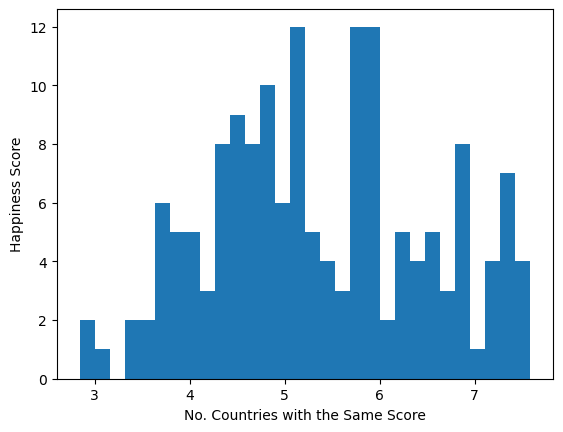

In [263]:
plt.hist(bins=30, x=happiness2015['Happiness_Score'])
plt.xlabel('No. Countries with the Same Score')
plt.ylabel('Happiness Score')

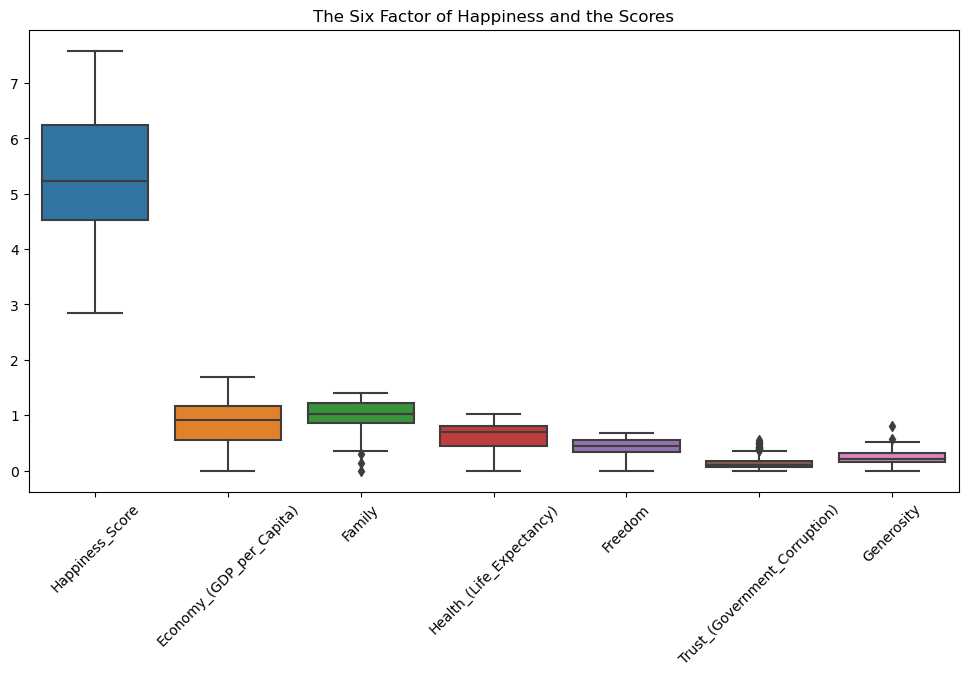

In [225]:
columns_to_plot = ['Happiness_Score', 'Economy_(GDP_per_Capita)', 'Family',
                   'Health_(Life_Expectancy)', 'Freedom', 'Trust_(Government_Corruption)',
                   'Generosity']
# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=happiness2015[columns_to_plot])
plt.xticks(rotation=45)  # Rotate labels for better visibility
plt.title("The Six Factor of Happiness and the Scores")
plt.show()

(array([ 6., 60., 57., 14., 11.,  5.,  2.,  2.,  0.,  1.]),
 array([0.01848 , 0.030325, 0.04217 , 0.054015, 0.06586 , 0.077705,
        0.08955 , 0.101395, 0.11324 , 0.125085, 0.13693 ]),
 <BarContainer object of 10 artists>)

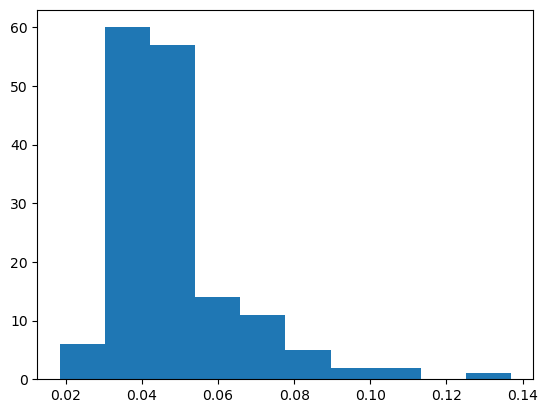

In [234]:
plt.hist(happiness2015['Standard_Error'])

<Axes: >

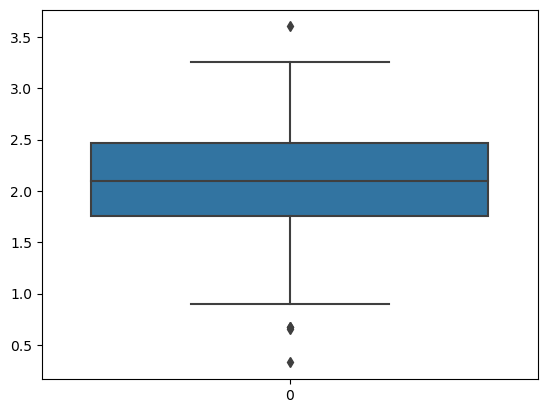

In [231]:
sns.boxplot(happiness2015['Dystopia_Residual'])

(array([ 1.,  0.,  3.,  0.,  2.,  1.,  2.,  2.,  7., 12., 11., 17., 16.,
        13., 16.,  8., 18.,  5.,  9.,  6.,  2.,  5.,  1.,  0.,  1.]),
 array([0.32858  , 0.4595224, 0.5904648, 0.7214072, 0.8523496, 0.983292 ,
        1.1142344, 1.2451768, 1.3761192, 1.5070616, 1.638004 , 1.7689464,
        1.8998888, 2.0308312, 2.1617736, 2.292716 , 2.4236584, 2.5546008,
        2.6855432, 2.8164856, 2.947428 , 3.0783704, 3.2093128, 3.3402552,
        3.4711976, 3.60214  ]),
 <BarContainer object of 25 artists>)

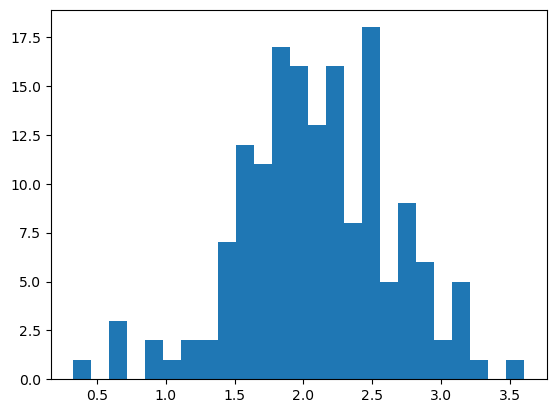

In [269]:
plt.hist(bins = 25, x=happiness2015['Dystopia_Residual'])

#### World Happiness Report 2016

Text(0, 0.5, 'Happiness Score')

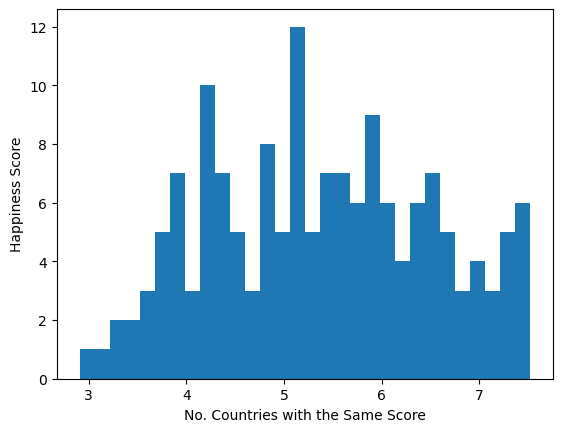

In [272]:
#It looks better than 2015 dataset score distribution
plt.hist(bins=30, x=happiness2016['Happiness_Score'])
plt.xlabel('No. Countries with the Same Score')
plt.ylabel('Happiness Score')

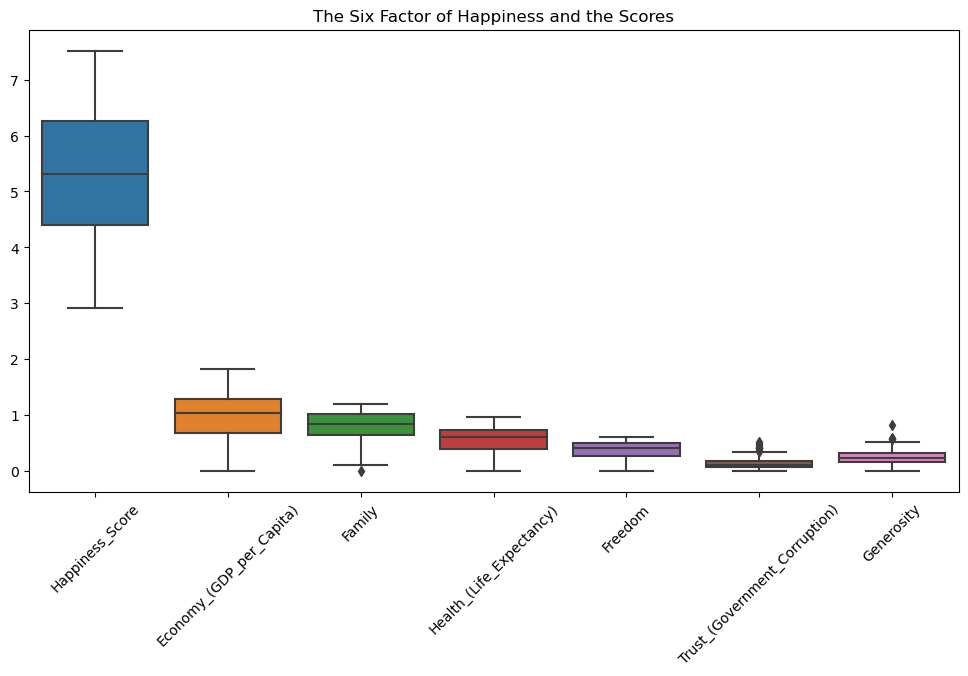

In [235]:
columns_to_plot = ['Happiness_Score', 'Economy_(GDP_per_Capita)', 'Family',
                   'Health_(Life_Expectancy)', 'Freedom', 'Trust_(Government_Corruption)',
                   'Generosity']
# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=happiness2016[columns_to_plot])
plt.xticks(rotation=45)  # Rotate labels for better visibility
plt.title("The Six Factor of Happiness and the Scores")
plt.show()

Text(0, 0.5, 'Upper Confidence Interval')

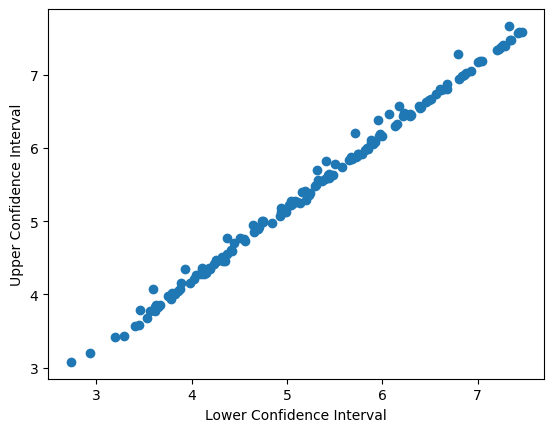

In [11]:
plt.scatter(x=happiness2016['Lower Confidence Interval'], y=happiness2016['Upper Confidence Interval'])
plt.xlabel('Lower Confidence Interval')
plt.ylabel('Upper Confidence Interval')

#### World Happiness Report 2017

Text(0, 0.5, 'Happiness Score')

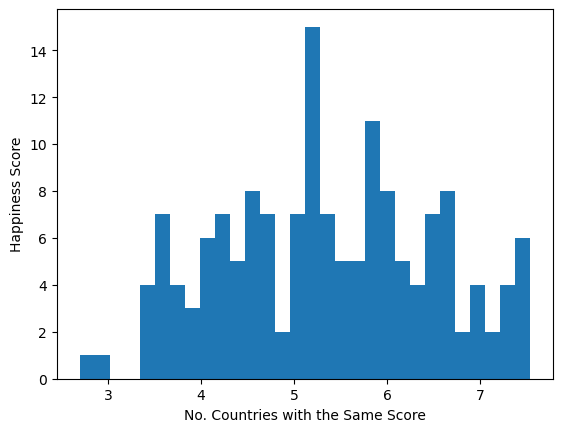

In [273]:
plt.hist(bins=30, x=happiness2017['Happiness_Score'])
plt.xlabel('No. Countries with the Same Score')
plt.ylabel('Happiness Score')

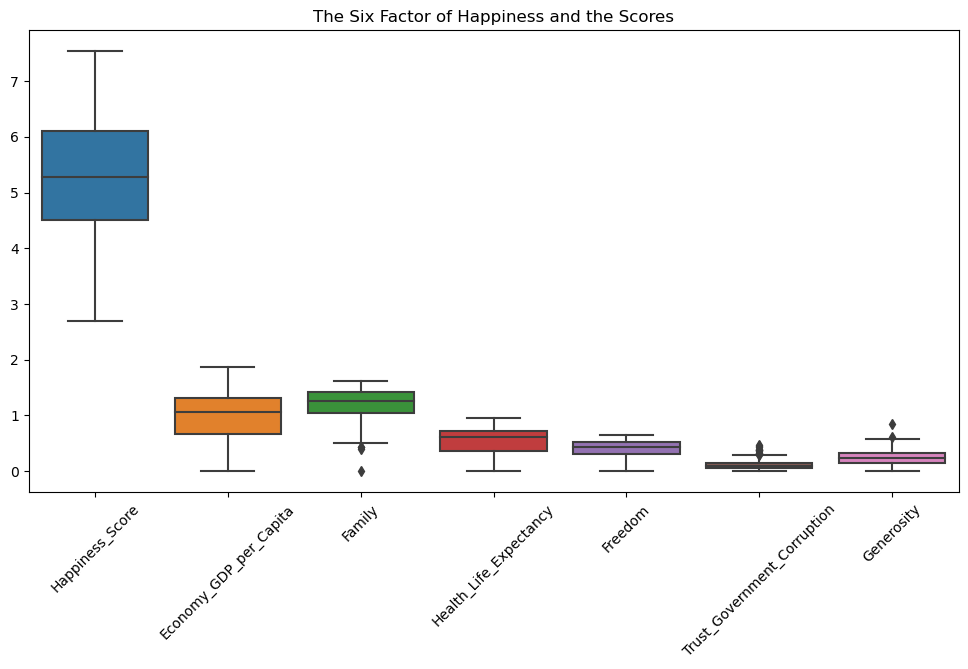

In [241]:
columns_to_plot = ['Happiness_Score', 'Economy_GDP_per_Capita', 'Family',
                   'Health_Life_Expectancy', 'Freedom', 'Trust_Government_Corruption',
                   'Generosity']
plt.figure(figsize=(12, 6))
sns.boxplot(data=happiness2017[columns_to_plot])
plt.xticks(rotation=45) 
plt.title("The Six Factor of Happiness and the Scores")
plt.show()

Text(0, 0.5, 'Whisker Low')

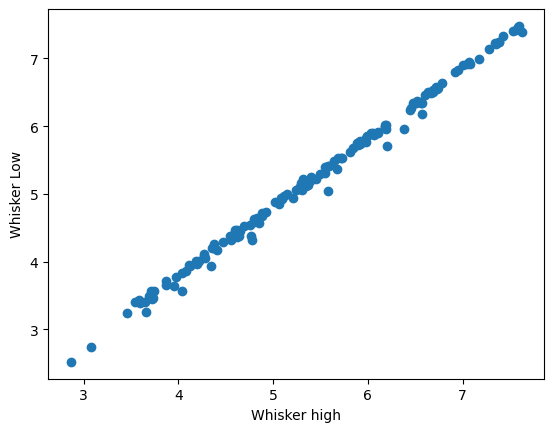

In [12]:
plt.scatter(x=happiness2017['Whisker.high'], y=happiness2017['Whisker.low'])
plt.xlabel('Whisker high')
plt.ylabel('Whisker Low')

#### Wrold Happiness Report 2018

Text(0, 0.5, 'Happiness Score')

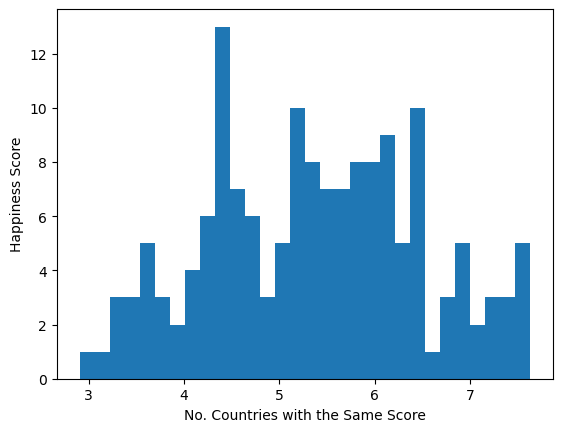

In [283]:
plt.hist(bins=30,x=happiness2018['Score'])
plt.xlabel('No. Countries with the Same Score')
plt.ylabel('Happiness Score')

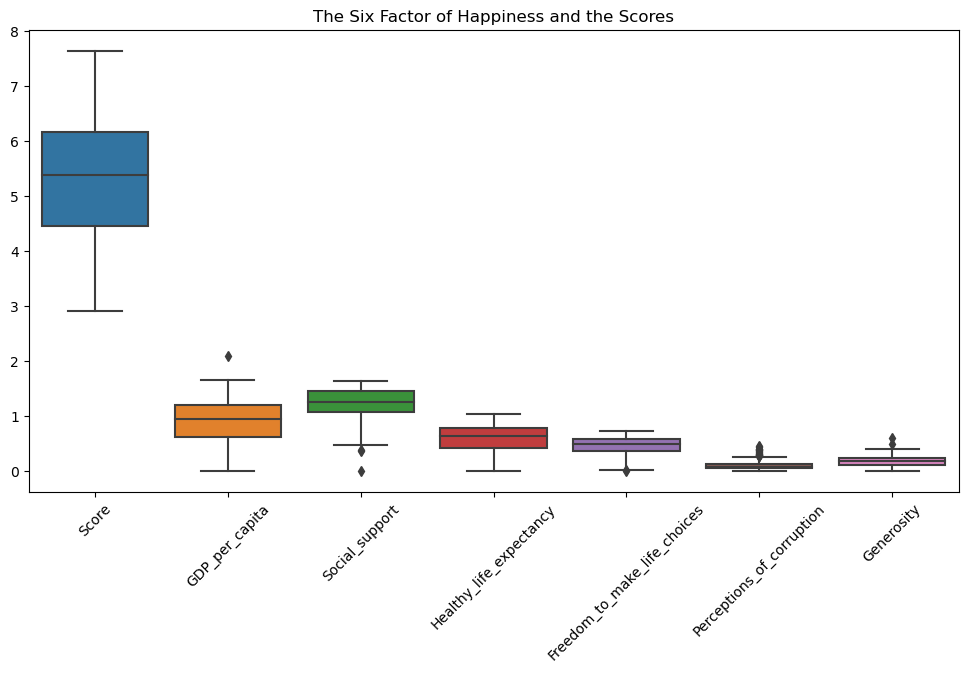

In [248]:
columns_to_plot = ['Score', 'GDP_per_capita', 'Social_support',
                   'Healthy_life_expectancy', 'Freedom_to_make_life_choices',
                   'Perceptions_of_corruption',
                   'Generosity']
plt.figure(figsize=(12, 6))
sns.boxplot(data=happiness2018[columns_to_plot])
plt.xticks(rotation=45)  # Rotate labels for better visibility
plt.title("The Six Factor of Happiness and the Scores")
plt.show()

#### World Happiness Report 2019

Text(0, 0.5, 'Happiness Score')

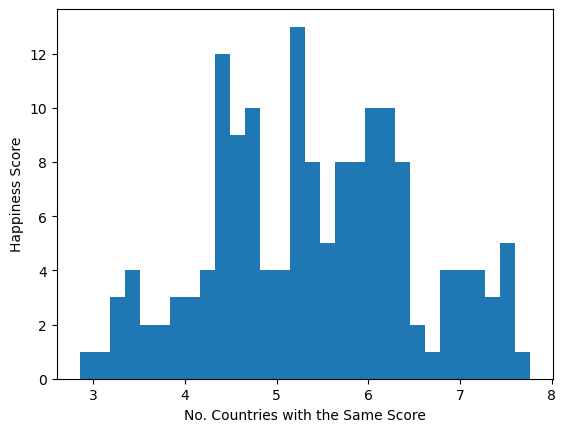

In [284]:
plt.hist(bins=30, x=happiness2019['Score'])
plt.xlabel('No. Countries with the Same Score')
plt.ylabel('Happiness Score')

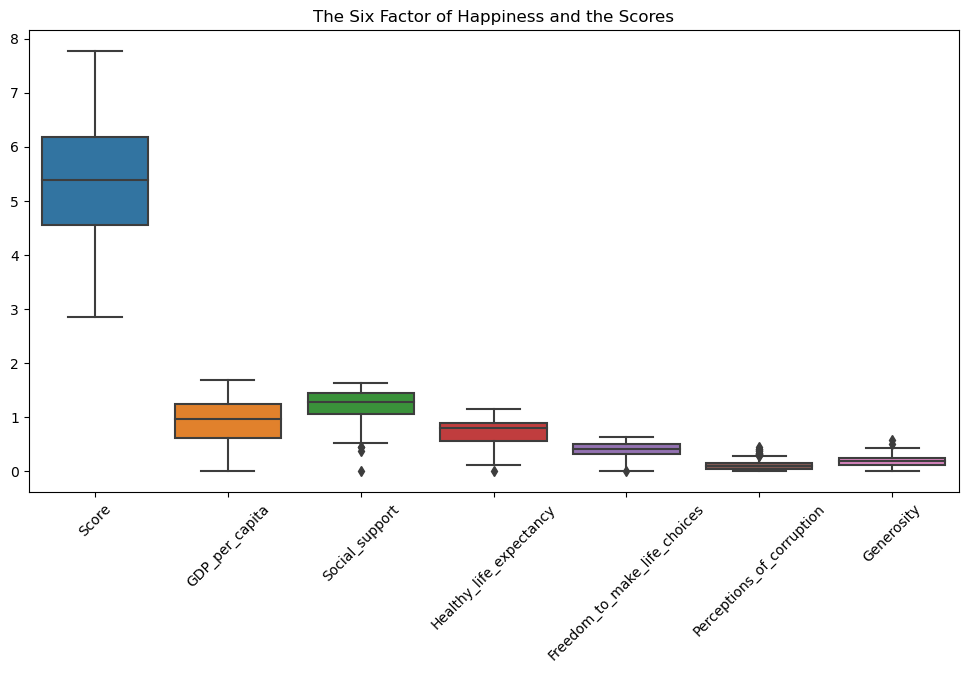

In [270]:
columns_to_plot = ['Score', 'GDP_per_capita', 'Social_support',
                   'Healthy_life_expectancy', 'Freedom_to_make_life_choices',
                   'Perceptions_of_corruption',
                   'Generosity']
plt.figure(figsize=(12, 6))
sns.boxplot(data=happiness2019[columns_to_plot])
plt.xticks(rotation=45) 
plt.title("The Six Factor of Happiness and the Scores")
plt.show()

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

#### World Happiness Report 2015

In [16]:
happiness2015.describe().T

count       mean        std      min  \
Happiness Rank                 158.0  79.493671  45.754363  1.00000   
Happiness Score                158.0   5.375734   1.145010  2.83900   
Standard Error                 158.0   0.047885   0.017146  0.01848   
Economy (GDP per Capita)       158.0   0.846137   0.403121  0.00000   
Family                         158.0   0.991046   0.272369  0.00000   
Health (Life Expectancy)       158.0   0.630259   0.247078  0.00000   
Freedom                        158.0   0.428615   0.150693  0.00000   
Trust (Government Corruption)  158.0   0.143422   0.120034  0.00000   
Generosity                     158.0   0.237296   0.126685  0.00000   
Dystopia Residual              158.0   2.098977   0.553550  0.32858   

                                     25%        50%         75%        max  
Happiness Rank                 40.250000  79.500000  118.750000  158.00000  
Happiness Score                 4.526000   5.232500    6.243750    7.58700  
Standard Error                  0.037268   0.043940    0.052300    0.13693  
Economy (GDP per Capita)        0.545808   0.910245    1.158448    1.69042  
Family                          0.856823   1.029510    1.214405    1.40223  
Health (Life Expectancy)        0.439185   0.696705    0.811013    1.02525  
Freedom                         0.328330   0.435515    0.549092    0.66973  
Trust (Government Corruption)   0.061675   0.107220    0.180255    0.55191  
Generosity                      0.150553   0.216130    0.309883    0.79588  
Dystopia Residual               1.759410   2.095415    2.462415    3.60214

In [21]:
happiness2015.describe(include='object').T

count unique                 top freq
Country   158    158         Switzerland    1
Region    158     10  Sub-Saharan Africa   40

#### World Happiness Report 2016

In [17]:
happiness2016.describe().T

count       mean        std      min       25%  \
Happiness Rank                 157.0  78.980892  45.466030  1.00000  40.00000   
Happiness Score                157.0   5.382185   1.141674  2.90500   4.40400   
Lower Confidence Interval      157.0   5.282395   1.148043  2.73200   4.32700   
Upper Confidence Interval      157.0   5.481975   1.136493  3.07800   4.46500   
Economy (GDP per Capita)       157.0   0.953880   0.412595  0.00000   0.67024   
Family                         157.0   0.793621   0.266706  0.00000   0.64184   
Health (Life Expectancy)       157.0   0.557619   0.229349  0.00000   0.38291   
Freedom                        157.0   0.370994   0.145507  0.00000   0.25748   
Trust (Government Corruption)  157.0   0.137624   0.111038  0.00000   0.06126   
Generosity                     157.0   0.242635   0.133756  0.00000   0.15457   
Dystopia Residual              157.0   2.325807   0.542220  0.81789   2.03171   

                                    50%        75%        max  
Happiness Rank                 79.00000  118.00000  157.00000  
Happiness Score                 5.31400    6.26900    7.52600  
Lower Confidence Interval       5.23700    6.15400    7.46000  
Upper Confidence Interval       5.41900    6.43400    7.66900  
Economy (GDP per Capita)        1.02780    1.27964    1.82427  
Family                          0.84142    1.02152    1.18326  
Health (Life Expectancy)        0.59659    0.72993    0.95277  
Freedom                         0.39747    0.48453    0.60848  
Trust (Government Corruption)   0.10547    0.17554    0.50521  
Generosity                      0.22245    0.31185    0.81971  
Dystopia Residual               2.29074    2.66465    3.83772

In [22]:
happiness2016.describe(include='object').T

count unique                 top freq
Country   157    157             Denmark    1
Region    157     10  Sub-Saharan Africa   38

#### World Happiness Report 2017

In [18]:
happiness2017.describe().T

count       mean        std       min  \
Happiness.Rank                 155.0  78.000000  44.888751  1.000000   
Happiness.Score                155.0   5.354019   1.131230  2.693000   
Whisker.high                   155.0   5.452326   1.118542  2.864884   
Whisker.low                    155.0   5.255713   1.145030  2.521116   
Economy..GDP.per.Capita.       155.0   0.984718   0.420793  0.000000   
Family                         155.0   1.188898   0.287263  0.000000   
Health..Life.Expectancy.       155.0   0.551341   0.237073  0.000000   
Freedom                        155.0   0.408786   0.149997  0.000000   
Generosity                     155.0   0.246883   0.134780  0.000000   
Trust..Government.Corruption.  155.0   0.123120   0.101661  0.000000   
Dystopia.Residual              155.0   1.850238   0.500028  0.377914   

                                     25%        50%         75%         max  
Happiness.Rank                 39.500000  78.000000  116.500000  155.000000  
Happiness.Score                 4.505500   5.279000    6.101500    7.537000  
Whisker.high                    4.608172   5.370032    6.194600    7.622030  
Whisker.low                     4.374955   5.193152    6.006527    7.479556  
Economy..GDP.per.Capita.        0.663371   1.064578    1.318027    1.870766  
Family                          1.042635   1.253918    1.414316    1.610574  
Health..Life.Expectancy.        0.369866   0.606042    0.723008    0.949492  
Freedom                         0.303677   0.437454    0.516561    0.658249  
Generosity                      0.154106   0.231538    0.323762    0.838075  
Trust..Government.Corruption.   0.057271   0.089848    0.153296    0.464308  
Dystopia.Residual               1.591291   1.832910    2.144654    3.117485

In [23]:
happiness2017.describe(include='object').T

count unique     top freq
Country   155    155  Norway    1

#### World Happiness Report 2018

In [19]:
happiness2018.describe().T

count       mean        std    min       25%  \
Overall rank                  156.0  78.500000  45.177428  1.000  39.75000   
Score                         156.0   5.375917   1.119506  2.905   4.45375   
GDP per capita                156.0   0.891449   0.391921  0.000   0.61625   
Social support                156.0   1.213237   0.302372  0.000   1.06675   
Healthy life expectancy       156.0   0.597346   0.247579  0.000   0.42225   
Freedom to make life choices  156.0   0.454506   0.162424  0.000   0.35600   
Generosity                    156.0   0.181006   0.098471  0.000   0.10950   
Perceptions of corruption     155.0   0.112000   0.096492  0.000   0.05100   

                                  50%        75%      max  
Overall rank                  78.5000  117.25000  156.000  
Score                          5.3780    6.16850    7.632  
GDP per capita                 0.9495    1.19775    2.096  
Social support                 1.2550    1.46300    1.644  
Healthy life expectancy        0.6440    0.77725    1.030  
Freedom to make life choices   0.4870    0.57850    0.724  
Generosity                     0.1740    0.23900    0.598  
Perceptions of corruption      0.0820    0.13700    0.457

In [24]:
happiness2018.describe(include='object').T

count unique      top freq
Country or region   156    156  Finland    1

#### Wrold Happiness Report 2019

In [248]:
happiness2019.describe().T

count       mean        std    min       25%  \
Overall_rank                  156.0  78.500000  45.177428  1.000  39.75000   
Score                         156.0   5.407096   1.113120  2.853   4.54450   
GDP_per_capita                156.0   0.905147   0.398389  0.000   0.60275   
Social_support                156.0   1.208814   0.299191  0.000   1.05575   
Healthy_life_expectancy       156.0   0.725244   0.242124  0.000   0.54775   
Freedom_to_make_life_choices  156.0   0.392571   0.143289  0.000   0.30800   
Generosity                    156.0   0.184846   0.095254  0.000   0.10875   
Perceptions_of_corruption     156.0   0.110603   0.094538  0.000   0.04700   

                                  50%        75%      max  
Overall_rank                  78.5000  117.25000  156.000  
Score                          5.3795    6.18450    7.769  
GDP_per_capita                 0.9600    1.23250    1.684  
Social_support                 1.2715    1.45250    1.624  
Healthy_life_expectancy        0.7890    0.88175    1.141  
Freedom_to_make_life_choices   0.4170    0.50725    0.631  
Generosity                     0.1775    0.24825    0.566  
Perceptions_of_corruption      0.0855    0.14125    0.453

In [249]:
happiness2019.describe(include='object').T

count unique      top freq
Country   156    156  Finland    1

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

We could also use a correlation matrix to get more specific information about the relationship between these two variables.

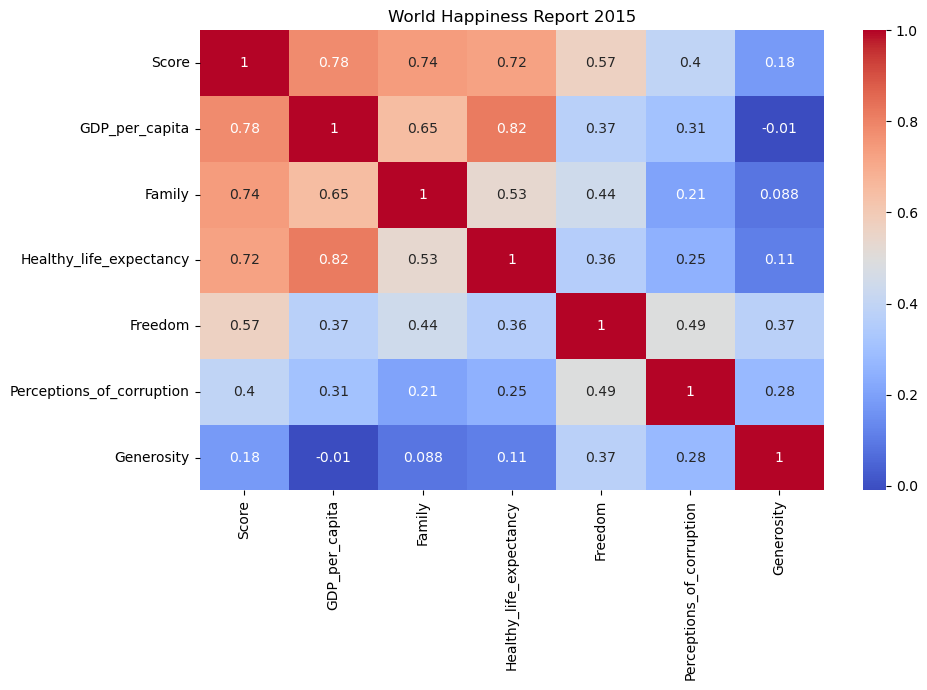

In [284]:
# Creating Correlation matrix for 2015 dataset

columns_of_interest = ['Score', 'GDP_per_capita', 'Family', 'Healthy_life_expectancy', 
                       'Freedom', 'Perceptions_of_corruption', 'Generosity']

# Creating Correlation matrices for each dataset
corr15 = happiness2015[columns_of_interest].corr()

# Plot the heatmap for 2015 dataset
plt.figure(figsize=(10, 7))
sns.heatmap(corr15[['Score', 'GDP_per_capita', 'Family', 'Healthy_life_expectancy', 'Freedom', 'Perceptions_of_corruption', 'Generosity']].iloc[:, :],
            annot=True, cmap="coolwarm")
plt.title("World Happiness Report 2015")
plt.tight_layout()
plt.show()

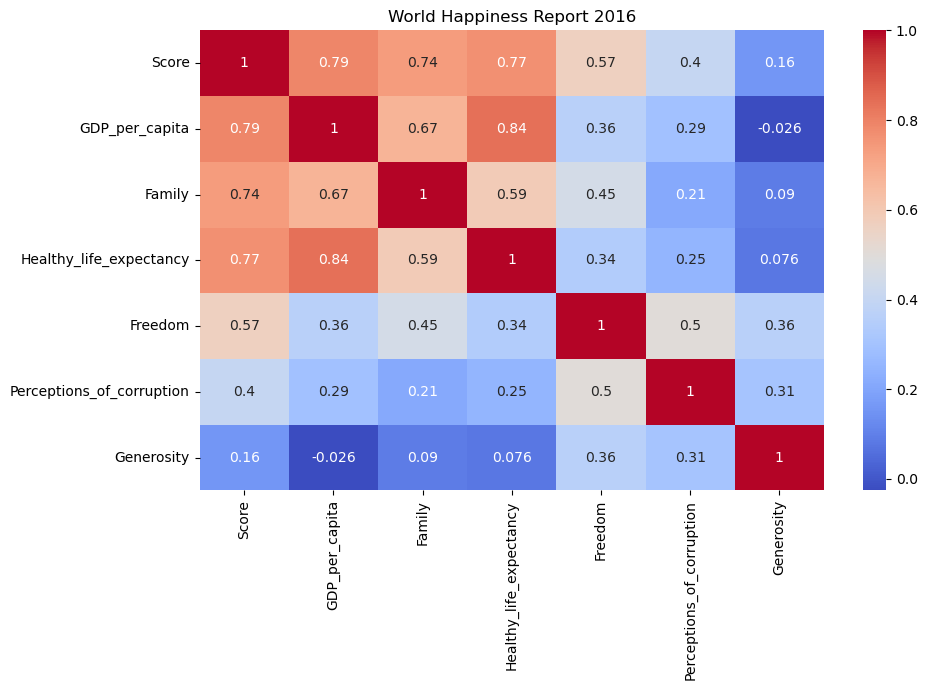

In [293]:
# Creating heatmaps for 2016 dataset

columns_of_interest = ['Score', 'GDP_per_capita', 'Family', 'Healthy_life_expectancy', 
                       'Freedom', 'Perceptions_of_corruption', 'Generosity']

# Creating Correlation matrices for each dataset
corr16 = happiness2016[columns_of_interest].corr()

# Plot the heatmap for 2016 dataset
plt.figure(figsize=(10, 7))
sns.heatmap(corr16[['Score', 'GDP_per_capita', 'Family', 'Healthy_life_expectancy', 'Freedom', 'Perceptions_of_corruption', 'Generosity']].iloc[:, :],
            annot=True, cmap="coolwarm")
plt.title("World Happiness Report 2016")
plt.tight_layout()
plt.show()

In [287]:
happiness2017.columns

Index(['Country', 'Overall_rank', 'Score', 'Whisker_high', 'Whisker_low',
       'GDP_per_capita', 'Family', 'Healthy_life_expectancy', 'Freedom',
       'Generosity', 'Perceptions_of_corruption', 'Dystopia_Residual'],
      dtype='object')

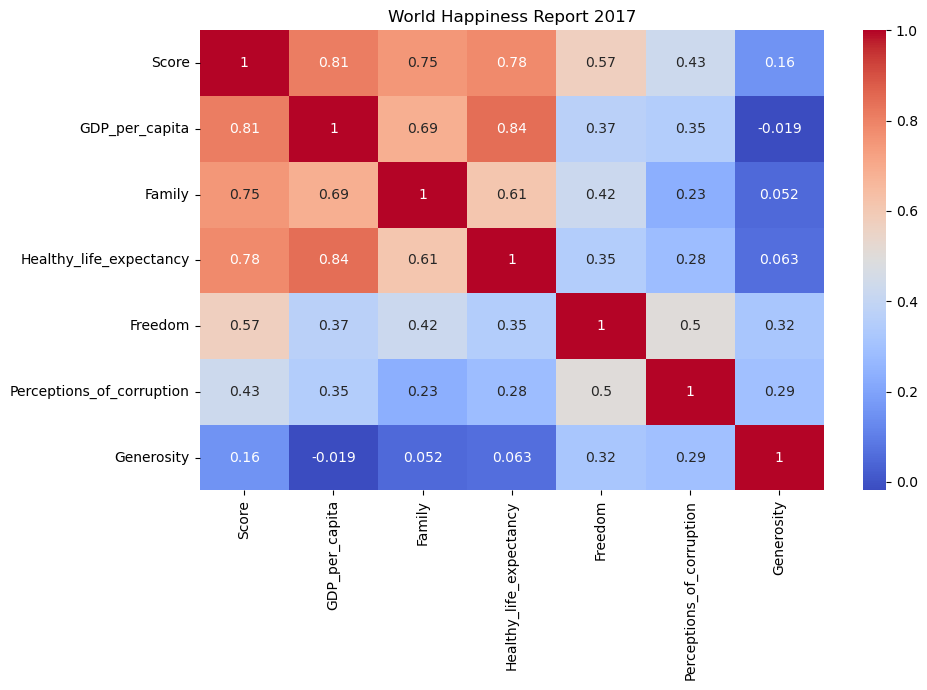

In [294]:
# Creating heatmaps for 2017 dataset

columns_of_interest = ['Score', 'GDP_per_capita', 'Family', 'Healthy_life_expectancy', 
                       'Freedom', 'Perceptions_of_corruption', 'Generosity']

# Creating Correlation matrices for each dataset
corr17 = happiness2017[columns_of_interest].corr()

# Plot the heatmap for 2017 dataset
plt.figure(figsize=(10, 7))
sns.heatmap(corr17[['Score', 'GDP_per_capita', 'Family', 'Healthy_life_expectancy', 'Freedom', 'Perceptions_of_corruption', 'Generosity']].iloc[:, :],
            annot=True, cmap="coolwarm")
plt.title("World Happiness Report 2017")
plt.tight_layout()
plt.show()

In [291]:
happiness2018.columns

Index(['Overall_rank', 'Country', 'Score', 'GDP_per_capita', 'Social_support',
       'Healthy_life_expectancy', 'Freedom_to_make_life_choices', 'Generosity',
       'Perceptions_of_corruption'],
      dtype='object')

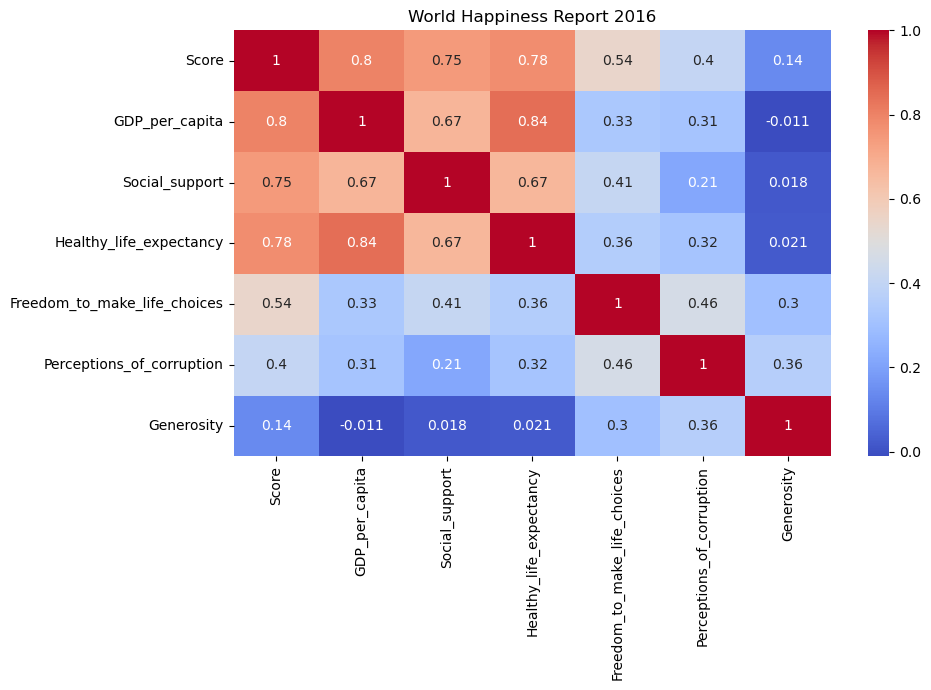

In [295]:
# Creating heatmaps for 2018 dataset

columns_of_interest = ['Score', 'GDP_per_capita', 'Social_support', 'Healthy_life_expectancy', 
                       'Freedom_to_make_life_choices', 'Perceptions_of_corruption', 'Generosity']

# Creating Correlation matrices for each dataset
corr18 = happiness2018[columns_of_interest].corr()

# Plot the heatmap for 2018 dataset
plt.figure(figsize=(10, 7))
sns.heatmap(corr18[['Score', 'GDP_per_capita', 'Social_support', 'Healthy_life_expectancy', 'Freedom_to_make_life_choices', 'Perceptions_of_corruption', 'Generosity']].iloc[:, :],
            annot=True, cmap="coolwarm")
plt.title("World Happiness Report 2016")
plt.tight_layout()
plt.show()

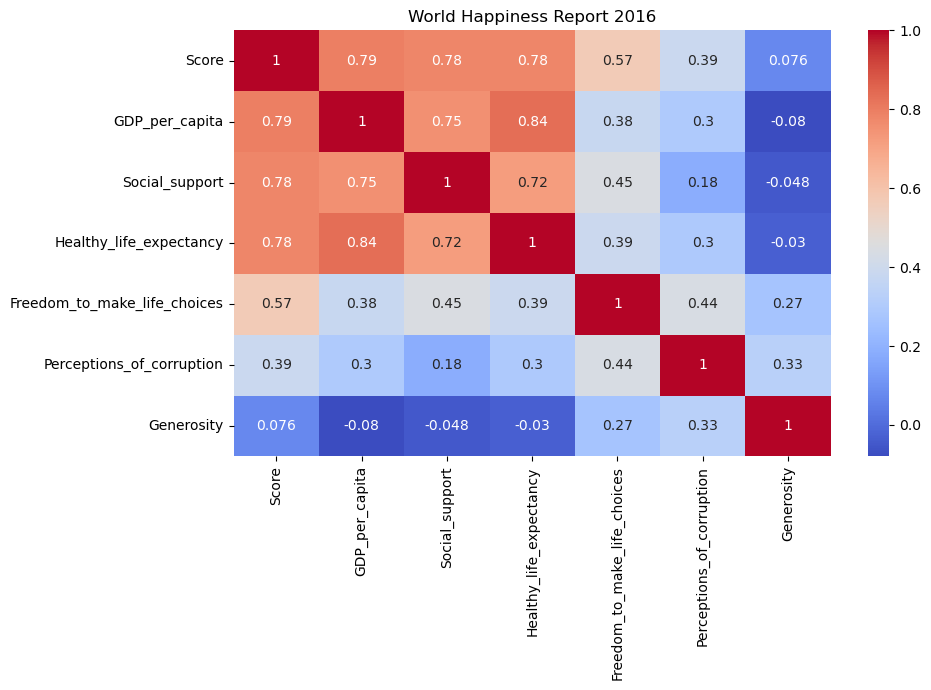

In [296]:
# Creating heatmaps for 2019 dataset

columns_of_interest = ['Score', 'GDP_per_capita', 'Social_support', 'Healthy_life_expectancy', 
                       'Freedom_to_make_life_choices', 'Perceptions_of_corruption', 'Generosity']

# Creating Correlation matrices for each dataset
corr19 = happiness2019[columns_of_interest].corr()

# Plot the heatmap for 2019 dataset
plt.figure(figsize=(10, 7))
sns.heatmap(corr19[['Score', 'GDP_per_capita', 'Social_support', 'Healthy_life_expectancy', 'Freedom_to_make_life_choices', 'Perceptions_of_corruption', 'Generosity']].iloc[:, :],
            annot=True, cmap="coolwarm")
plt.title("World Happiness Report 2016")
plt.tight_layout()
plt.show()

### Key Insights

#### Top 10 Happiest Countries for the Period of 2015-2019 and the contribution of each happines factor to the score

In [334]:
# Define the factors list
factors = ['GDP_per_capita', 'Family', 'Healthy_life_expectancy', 'Freedom', 'Perceptions_of_corruption', 'Generosity']

# The dataset is ordered, so we can directly take the first ten rows
top10 = happiness2015[['Overall_rank','Country', 'Score', 'GDP_per_capita', 'Family', 'Healthy_life_expectancy', 
                       'Freedom', 'Perceptions_of_corruption', 'Generosity']].nlargest(10, 'Score')

# Calculate the correlation matrix for the dataset
corr15 = happiness2015[['Score', 'GDP_per_capita', 'Family', 'Healthy_life_expectancy', 'Freedom', 
                        'Perceptions_of_corruption', 'Generosity']].corr()

# Identify negative correlations with the 'Score' column
negative_corr_factors = corr15['Score'][corr15['Score'] < 0].index

# Reverse the negative factors by subtracting them from 0 to make their effect positive
# Create a new dataframe for normalization, considering both positive and negative factors
normalized_factors = top10[factors].copy()

for factor in factors:
    if factor in negative_corr_factors:
        # Reverse the effect of negatively correlated factors (e.g., subtract from the max value or reverse the scaling)
        normalized_factors[factor] = 1 - (top10[factor] / top10[factor].max())
    else:
        # For positive correlations, just normalize
        normalized_factors[factor] = top10[factor] / top10[factor].max()

# Now, normalized_factors contains the adjusted data for plotting or analysis


<Figure size 1400x800 with 0 Axes>

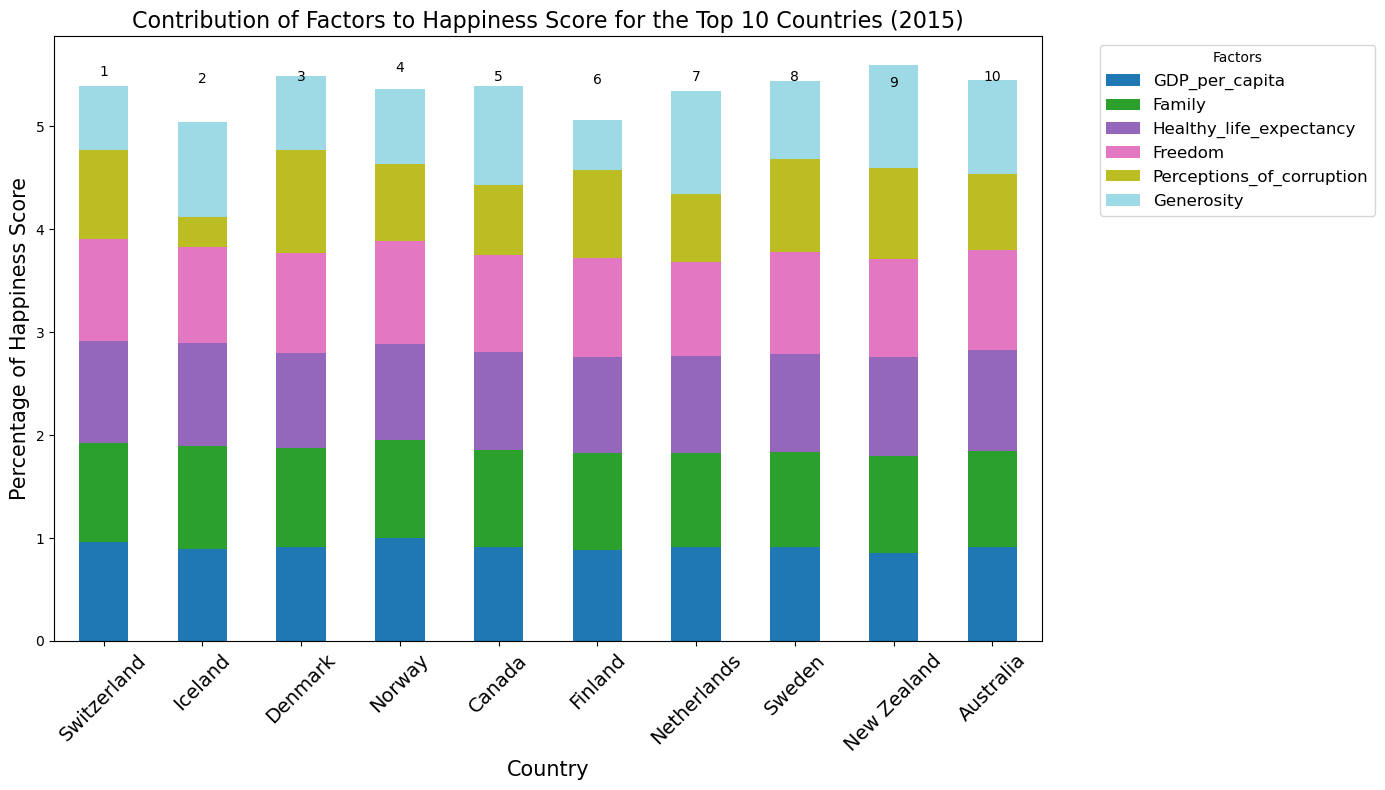

In [335]:
# Create a stacked bar chart with the adjusted normalized data
plt.figure(figsize=(14, 8))

# Plot the normalized factors as a stacked bar chart
bars = normalized_factors.set_index(top10['Country'])[factors].plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')

# Add labels and title
plt.title("Contribution of Factors to Happiness Score for the Top 10 Countries (2015)", fontsize=16)
plt.xlabel("Country", fontsize=15)
plt.ylabel("Percentage of Happiness Score", fontsize=15)
plt.xticks(rotation=45, fontsize=14)
plt.legend(title='Factors', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Add the rank labels at the top of each bar
for i, country in enumerate(top10['Country']):
    rank = top10['Overall_rank'].iloc[i]  # Get the rank from the 'Rank' column
    bar = bars.patches[i]  # Get the corresponding bar
    y_position = bar.get_height() + 4.5  # Position the rank label above the bar
    plt.text(bar.get_x() + bar.get_width() / 2, y_position, str(rank), ha='center', va='bottom', fontsize=10, color='black')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


In [339]:
# The dataset is ordered, so we can directly take the first ten rows
top10 = happiness2016[['Overall_rank','Country', 'Score', 'GDP_per_capita', 'Family', 'Healthy_life_expectancy', 
                       'Freedom', 'Perceptions_of_corruption', 'Generosity']].nlargest(10, 'Score')

# Calculate the correlation matrix for the dataset
corr16 = happiness2016[['Score', 'GDP_per_capita', 'Family', 'Healthy_life_expectancy', 'Freedom', 
                        'Perceptions_of_corruption', 'Generosity']].corr()

# Identify negative correlations with the 'Score' column
negative_corr_factors = corr16['Score'][corr16['Score'] < 0].index

# Reverse the negative factors by subtracting them from 0 to make their effect positive
# Create a new dataframe for normalization, considering both positive and negative factors
normalized_factors = top10[factors].copy()

for factor in factors:
    if factor in negative_corr_factors:
        # Reverse the effect of negatively correlated factors (e.g., subtract from the max value or reverse the scaling)
        normalized_factors[factor] = 1 - (top10[factor] / top10[factor].max())
    else:
        # For positive correlations, just normalize
        normalized_factors[factor] = top10[factor] / top10[factor].max()

# Now, normalized_factors contains the adjusted data for plotting or analysis

<Figure size 1400x800 with 0 Axes>

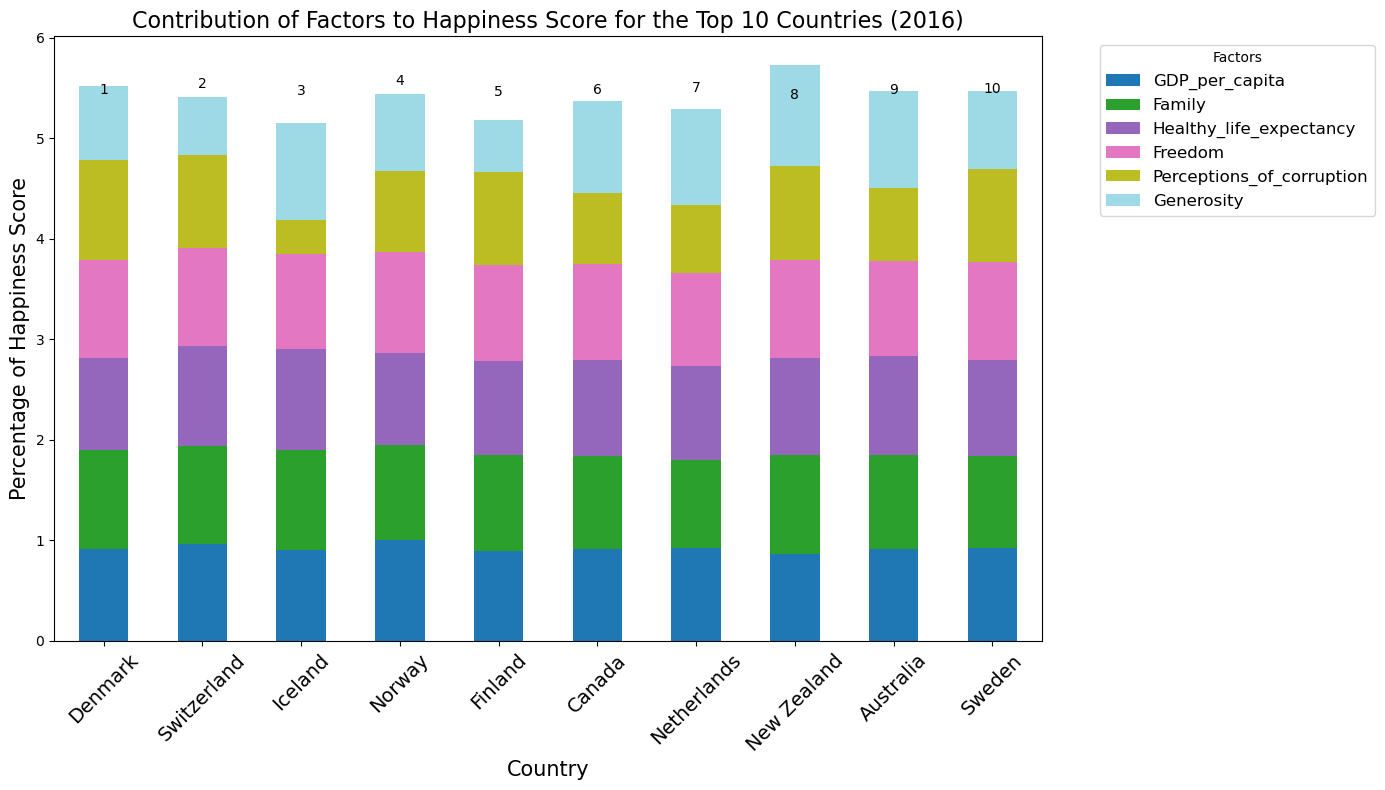

In [340]:
# Create a stacked bar chart with the adjusted normalized data
plt.figure(figsize=(14, 8))

# Plot the normalized factors as a stacked bar chart
bars = normalized_factors.set_index(top10['Country'])[factors].plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')

# Add labels and title
plt.title("Contribution of Factors to Happiness Score for the Top 10 Countries (2016)", fontsize=16)
plt.xlabel("Country", fontsize=15)
plt.ylabel("Percentage of Happiness Score", fontsize=15)
plt.xticks(rotation=45, fontsize=14)
plt.legend(title='Factors', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Add the rank labels at the top of each bar
for i, country in enumerate(top10['Country']):
    rank = top10['Overall_rank'].iloc[i]  # Get the rank from the 'Rank' column
    bar = bars.patches[i]  # Get the corresponding bar
    y_position = bar.get_height() + 4.5  # Position the rank label above the bar
    plt.text(bar.get_x() + bar.get_width() / 2, y_position, str(rank), ha='center', va='bottom', fontsize=10, color='black')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


In [353]:
#Redfinig the factors because they changed for 2018 and 2019
factors = ['Score', 'GDP_per_capita', 'Family', 'Healthy_life_expectancy', 
                       'Freedom', 'Perceptions_of_corruption', 'Generosity']
# The dataset is ordered, so we can directly take the first ten rows
top10 = happiness201[['Overall_rank','Country', 'Score', 'GDP_per_capita', 'Family', 'Healthy_life_expectancy', 
                       'Freedom', 'Perceptions_of_corruption', 'Generosity']].nlargest(10, 'Score')

# Calculate the correlation matrix for the dataset
corr17 = happiness2017[['Score', 'GDP_per_capita', 'Family', 'Healthy_life_expectancy', 'Freedom', 
                        'Perceptions_of_corruption', 'Generosity']].corr()

# Identify negative correlations with the 'Score' column
negative_corr_factors = corr17['Score'][corr17['Score'] < 0].index

# Reverse the negative factors by subtracting them from 0 to make their effect positive
# Create a new dataframe for normalization, considering both positive and negative factors
normalized_factors = top10[factors].copy()

for factor in factors:
    if factor in negative_corr_factors:
        # Reverse the effect of negatively correlated factors (e.g., subtract from the max value or reverse the scaling)
        normalized_factors[factor] = 1 - (top10[factor] / top10[factor].max())
    else:
        # For positive correlations, just normalize
        normalized_factors[factor] = top10[factor] / top10[factor].max()

# Now, normalized_factors contains the adjusted data for plotting or analysis

<Figure size 1400x800 with 0 Axes>

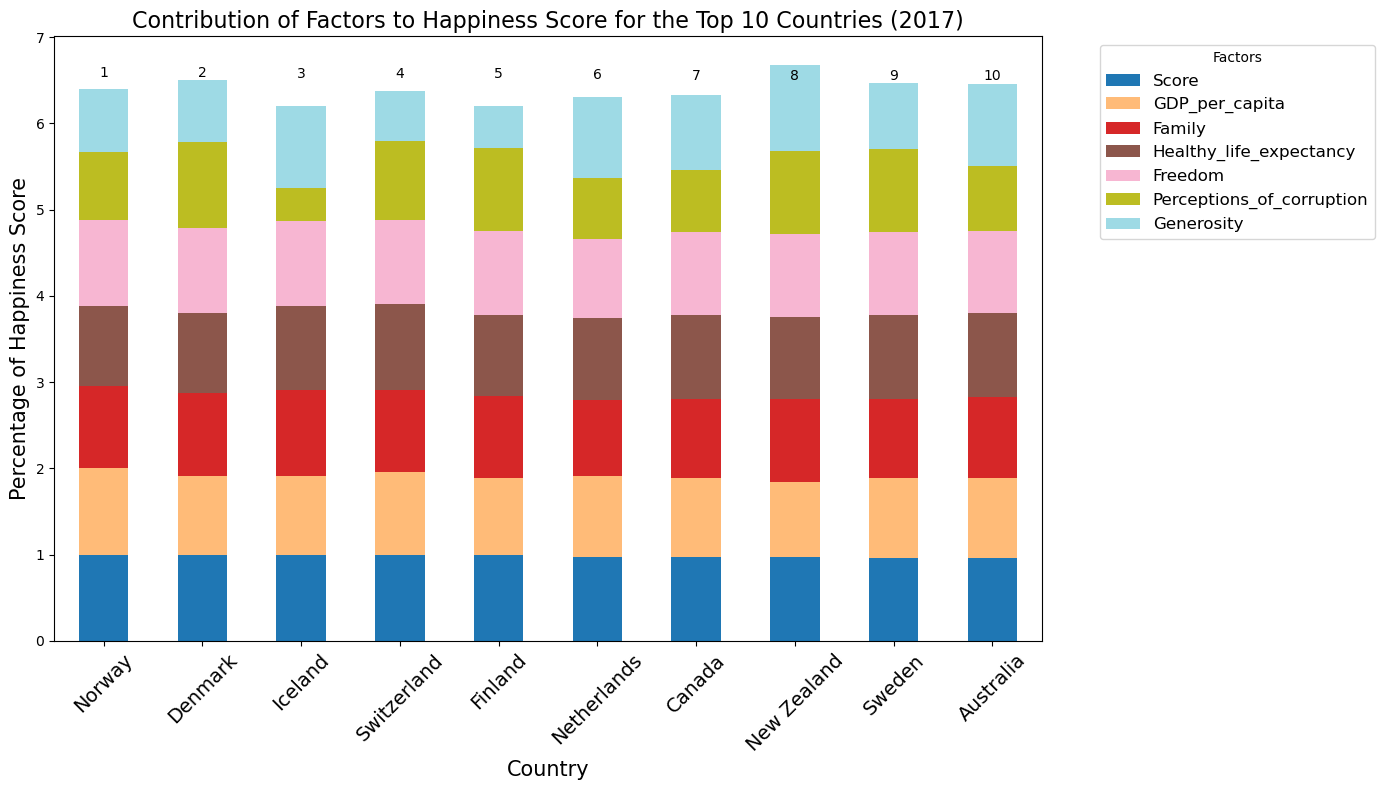

In [355]:
# Create a stacked bar chart with the adjusted normalized data
plt.figure(figsize=(14, 8))

# Plot the normalized factors as a stacked bar chart
bars = normalized_factors.set_index(top10['Country'])[factors].plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')

# Add labels and title
plt.title("Contribution of Factors to Happiness Score for the Top 10 Countries (2017)", fontsize=16)
plt.xlabel("Country", fontsize=15)
plt.ylabel("Percentage of Happiness Score", fontsize=15)
plt.xticks(rotation=45, fontsize=14)
plt.legend(title='Factors', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Add the rank labels at the top of each bar
for i, country in enumerate(top10['Country']):
    rank = top10['Overall_rank'].iloc[i]  # Get the rank from the 'Rank' column
    bar = bars.patches[i]  # Get the corresponding bar
    y_position = bar.get_height() + 5.5  # Position the rank label above the bar
    plt.text(bar.get_x() + bar.get_width() / 2, y_position, str(rank), ha='center', va='bottom', fontsize=10, color='black')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


In [357]:
#Redfining the factors for 2018 and 2019
factors = ['GDP_per_capita', 'Social_support', 'Healthy_life_expectancy', 
                       'Freedom_to_make_life_choices', 'Perceptions_of_corruption', 'Generosity']
# The dataset is ordered, so we can directly take the first ten rows
top10 = happiness2018[['Overall_rank','Country', 'Score', 'GDP_per_capita', 'Social_support', 'Healthy_life_expectancy', 
                       'Freedom_to_make_life_choices', 'Perceptions_of_corruption', 'Generosity']].nlargest(10, 'Score')

# Calculate the correlation matrix for the dataset
corr18 = happiness2018[['Score', 'GDP_per_capita', 'Social_support', 'Healthy_life_expectancy', 'Freedom_to_make_life_choices', 
                        'Perceptions_of_corruption', 'Generosity']].corr()

# Identify negative correlations with the 'Score' column
negative_corr_factors = corr18['Score'][corr18['Score'] < 0].index

# Reverse the negative factors by subtracting them from 0 to make their effect positive
# Create a new dataframe for normalization, considering both positive and negative factors
normalized_factors = top10[factors].copy()

for factor in factors:
    if factor in negative_corr_factors:
        # Reverse the effect of negatively correlated factors (e.g., subtract from the max value or reverse the scaling)
        normalized_factors[factor] = 1 - (top10[factor] / top10[factor].max())
    else:
        # For positive correlations, just normalize
        normalized_factors[factor] = top10[factor] / top10[factor].max()
# The dataset is ordered, so we can directly take the first ten rows
top10 = happiness2018[['Overall_rank','Country', 'Score', 'GDP_per_capita', 'Social_support', 'Healthy_life_expectancy', 
                       'Freedom_to_make_life_choices', 'Perceptions_of_corruption', 'Generosity']].nlargest(10, 'Score')

# List of factors to normalize
factors = ['GDP_per_capita', 'Social_support', 'Healthy_life_expectancy', 
           'Freedom_to_make_life_choices', 'Perceptions_of_corruption', 'Generosity']

# Calculate the correlation matrix for the dataset
corr18 = happiness2018[['Score', 'GDP_per_capita', 'Social_support', 'Healthy_life_expectancy', 'Freedom_to_make_life_choices', 
                        'Perceptions_of_corruption', 'Generosity']].corr()

# Identify negative correlations with the 'Score' column
negative_corr_factors = corr18['Score'][corr18['Score'] < 0].index

# Reverse the negative factors by subtracting them from 0 to make their effect positive
# Create a new dataframe for normalization, considering both positive and negative factors
normalized_factors = top10[factors].copy()

for factor in factors:
    if factor in negative_corr_factors:
        # Reverse the effect of negatively correlated factors (e.g., subtract from the max value or reverse the scaling)
        normalized_factors[factor] = 1 - (top10[factor] / top10[factor].max())
    else:
        # For positive correlations, just normalize
        normalized_factors[factor] = top10[factor] / top10[factor].max()

# Now, normalized_factors contains the adjusted data for plotting or analysis

# Now, normalized_factors contains the adjusted data for plotting or analysis

<Figure size 1400x800 with 0 Axes>

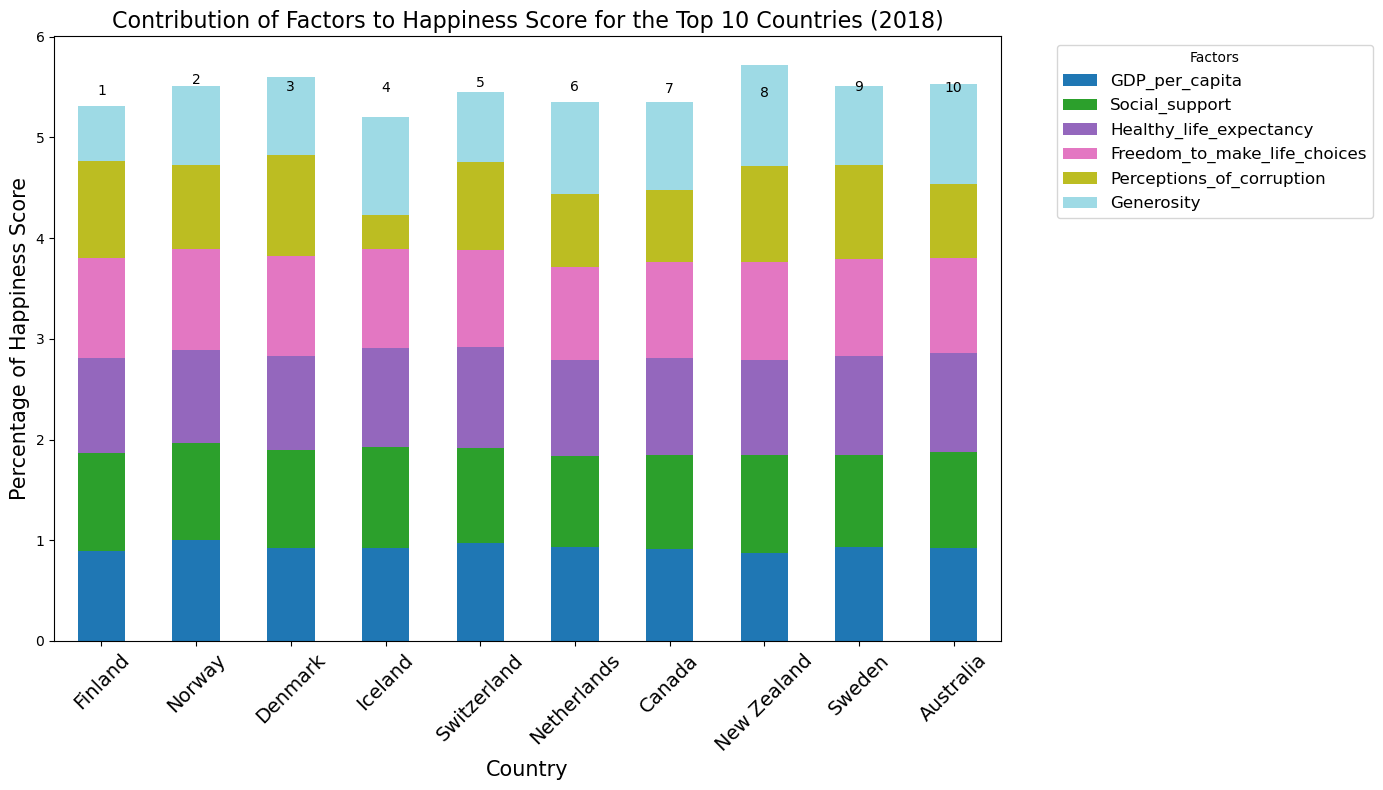

In [359]:
# Create a stacked bar chart with the adjusted normalized data
plt.figure(figsize=(14, 8))

# Plot the normalized factors as a stacked bar chart
bars = normalized_factors.set_index(top10['Country'])[factors].plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')

# Add labels and title
plt.title("Contribution of Factors to Happiness Score for the Top 10 Countries (2018)", fontsize=16)
plt.xlabel("Country", fontsize=15)
plt.ylabel("Percentage of Happiness Score", fontsize=15)
plt.xticks(rotation=45, fontsize=14)
plt.legend(title='Factors', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Add the rank labels at the top of each bar
for i, country in enumerate(top10['Country']):
    rank = top10['Overall_rank'].iloc[i]  # Get the rank from the 'Rank' column
    bar = bars.patches[i]  # Get the corresponding bar
    y_position = bar.get_height() + 4.5  # Position the rank label above the bar
    plt.text(bar.get_x() + bar.get_width() / 2, y_position, str(rank), ha='center', va='bottom', fontsize=10, color='black')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


In [360]:
# The dataset is ordered, so we can directly take the first ten rows
top10 = happiness2019[['Overall_rank','Country', 'Score', 'GDP_per_capita', 'Social_support', 'Healthy_life_expectancy', 
                       'Freedom_to_make_life_choices', 'Perceptions_of_corruption', 'Generosity']].nlargest(10, 'Score')

# Calculate the correlation matrix for the dataset
corr19 = happiness2019[['Score', 'GDP_per_capita', 'Social_support', 'Healthy_life_expectancy', 'Freedom_to_make_life_choices', 
                        'Perceptions_of_corruption', 'Generosity']].corr()

# Identify negative correlations with the 'Score' column
negative_corr_factors = corr18['Score'][corr18['Score'] < 0].index

# Reverse the negative factors by subtracting them from 0 to make their effect positive
# Create a new dataframe for normalization, considering both positive and negative factors
normalized_factors = top10[factors].copy()

for factor in factors:
    if factor in negative_corr_factors:
        # Reverse the effect of negatively correlated factors (e.g., subtract from the max value or reverse the scaling)
        normalized_factors[factor] = 1 - (top10[factor] / top10[factor].max())
    else:
        # For positive correlations, just normalize
        normalized_factors[factor] = top10[factor] / top10[factor].max()
# The dataset is ordered, so we can directly take the first ten rows
top10 = happiness2019[['Overall_rank','Country', 'Score', 'GDP_per_capita', 'Social_support', 'Healthy_life_expectancy', 
                       'Freedom_to_make_life_choices', 'Perceptions_of_corruption', 'Generosity']].nlargest(10, 'Score')

# List of factors to normalize
factors = ['GDP_per_capita', 'Social_support', 'Healthy_life_expectancy', 
           'Freedom_to_make_life_choices', 'Perceptions_of_corruption', 'Generosity']

# Calculate the correlation matrix for the dataset
corr18 = happiness2019[['Score', 'GDP_per_capita', 'Social_support', 'Healthy_life_expectancy', 'Freedom_to_make_life_choices', 
                        'Perceptions_of_corruption', 'Generosity']].corr()

# Identify negative correlations with the 'Score' column
negative_corr_factors = corr19['Score'][corr18['Score'] < 0].index

# Reverse the negative factors by subtracting them from 0 to make their effect positive
# Create a new dataframe for normalization, considering both positive and negative factors
normalized_factors = top10[factors].copy()

for factor in factors:
    if factor in negative_corr_factors:
        # Reverse the effect of negatively correlated factors (e.g., subtract from the max value or reverse the scaling)
        normalized_factors[factor] = 1 - (top10[factor] / top10[factor].max())
    else:
        # For positive correlations, just normalize
        normalized_factors[factor] = top10[factor] / top10[factor].max()

# Now, normalized_factors contains the adjusted data for plotting or analysis

# Now, normalized_factors contains the adjusted data for plotting or analysis

<Figure size 1400x800 with 0 Axes>

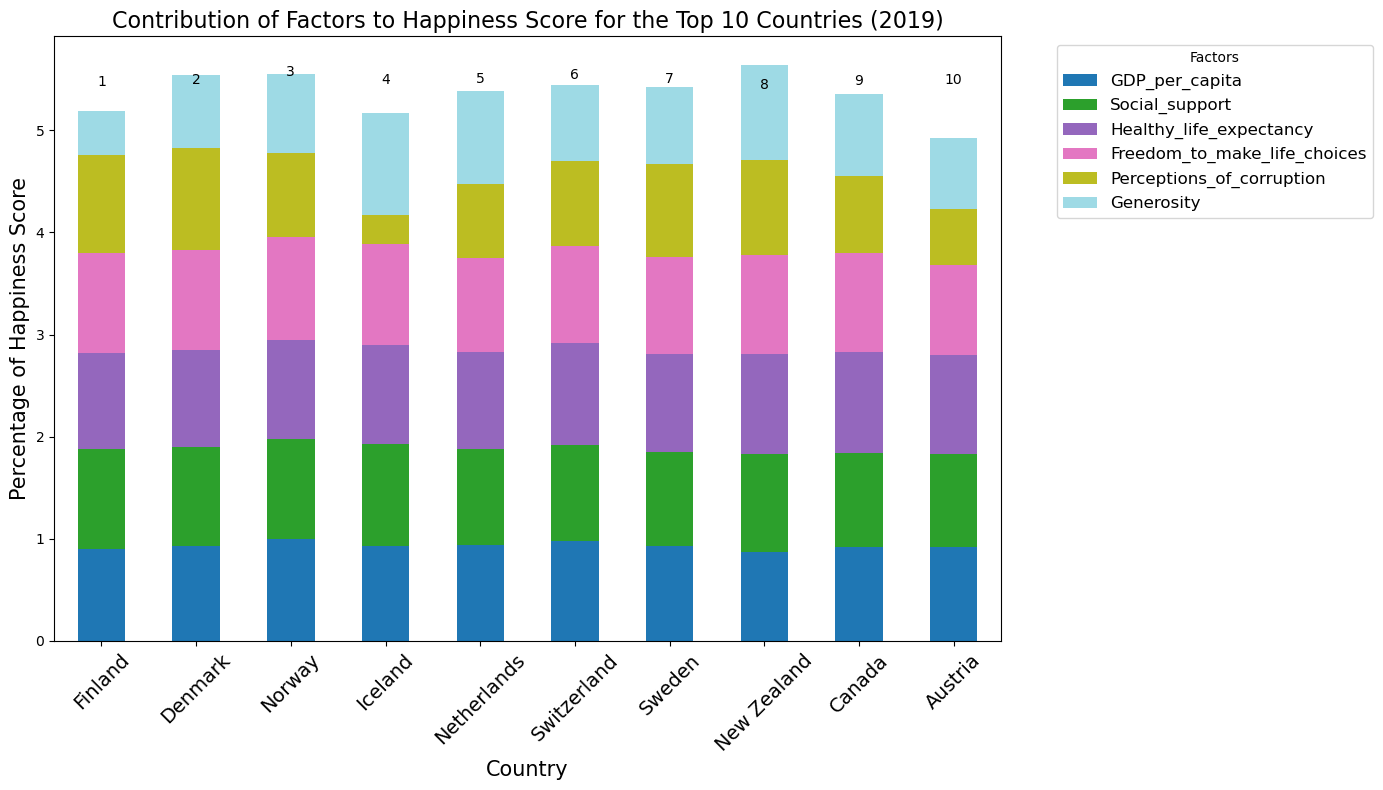

In [361]:
# Create a stacked bar chart with the adjusted normalized data
plt.figure(figsize=(14, 8))

# Plot the normalized factors as a stacked bar chart
bars = normalized_factors.set_index(top10['Country'])[factors].plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')

# Add labels and title
plt.title("Contribution of Factors to Happiness Score for the Top 10 Countries (2019)", fontsize=16)
plt.xlabel("Country", fontsize=15)
plt.ylabel("Percentage of Happiness Score", fontsize=15)
plt.xticks(rotation=45, fontsize=14)
plt.legend(title='Factors', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Add the rank labels at the top of each bar
for i, country in enumerate(top10['Country']):
    rank = top10['Overall_rank'].iloc[i]  # Get the rank from the 'Rank' column
    bar = bars.patches[i]  # Get the corresponding bar
    y_position = bar.get_height() + 4.5  # Position the rank label above the bar
    plt.text(bar.get_x() + bar.get_width() / 2, y_position, str(rank), ha='center', va='bottom', fontsize=10, color='black')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


### Tracking the Changes of Scores over 2015-2017

In [373]:
top10_2015.head()

Country  Overall_rank
0  Switzerland             1
1      Iceland             2
2      Denmark             3
3       Norway             4
4       Canada             5

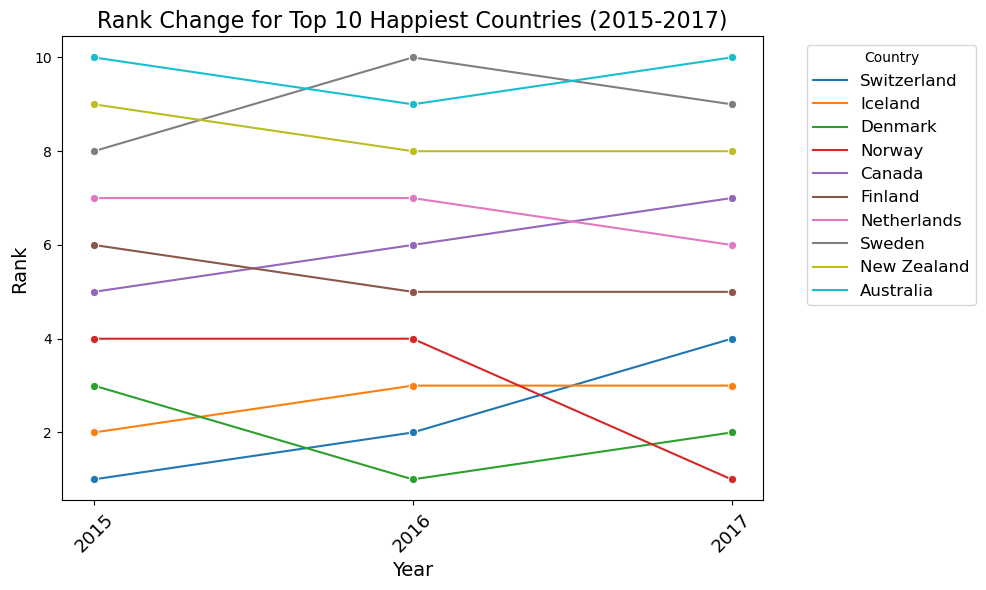

In [381]:
#Extracting top 10 happiest countries for each year.
#used head because the dataset is already ordered.
top10_2015 = happiness2015[['Country', 'Overall_rank']].head(10)
top10_2016 = happiness2016[['Country', 'Overall_rank']].head(10)
top10_2017 = happiness2017[['Country', 'Overall_rank']].head(10)

# Extract the top 10 countries for each year
top10_2015 = happiness2015[['Country', 'Overall_rank']].head(10)
top10_2016 = happiness2016[['Country', 'Overall_rank']].head(10)
top10_2017 = happiness2017[['Country', 'Overall_rank']].head(10)

# Merge the datasets on 'Country' to ensure we have the same countries for all three years
df = pd.merge(top10_2015[['Country', 'Overall_rank']], top10_2016[['Country', 'Overall_rank']], on='Country', suffixes=('_2015', '_2016'))
df = pd.merge(df, top10_2017[['Country', 'Overall_rank']], on='Country')

# Rename columns for clarity
df.columns = ['Country', '2015', '2016', '2017']

# Melt the dataframe to get a long format for plotting
df_melted = df.melt(id_vars=['Country'], value_vars=['2015', '2016', '2017'], 
                    var_name='Year', value_name='Rank')

# Plot the data
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Rank', hue='Country', data=df_melted, marker='o')

# Adjust the plot
plt.title("Rank Change for Top 10 Happiest Countries (2015-2017)", fontsize=16)
plt.ylabel("Rank", fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.xticks(rotation=45, fontsize=13)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.tight_layout()

# Show plot
plt.show()


### Countries that have experienced significant changes in their happiness.

In [382]:
df_2015 = happiness2015[['Country', 'Score']]
df_2016 = happiness2016[['Country', 'Score']]
df_2017 = happiness2017[['Country', 'Score']]
df_2018 = happiness2018[['Country', 'Score']]
df_2019 = happiness2019[['Country', 'Score']]

# Add a 'Year' column to each dataframe
df_2015['Year'] = 2015
df_2016['Year'] = 2016
df_2017['Year'] = 2017
df_2018['Year'] = 2018
df_2019['Year'] = 2019

df = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019], ignore_index=True)

C:\Users\sakur\AppData\Local\Temp\ipykernel_27548\1626882346.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2015['Year'] = 2015
C:\Users\sakur\AppData\Local\Temp\ipykernel_27548\1626882346.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2016['Year'] = 2016
C:\Users\sakur\AppData\Local\Temp\ipykernel_27548\1626882346.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [383]:
# Pivot the data so that countries are rows, years are columns, and scores are the values
pivot_df = df.pivot(index='Country', columns='Year', values='Score')

# Calculate the difference in scores between years
pivot_df_diff = pivot_df.diff(axis=1)  # This will calculate the difference for each year

In [393]:
# Calculate the change in happiness score between 2015 and 2019
pivot_df['Change_2015_2019'] = pivot_df[2019] - pivot_df[2015]

# Define a threshold for "significant" change
threshold = 1  

# Filter countries where the change exceeds the threshold
significant_changes = pivot_df[abs(pivot_df['Change_2015_2019']) >= threshold]

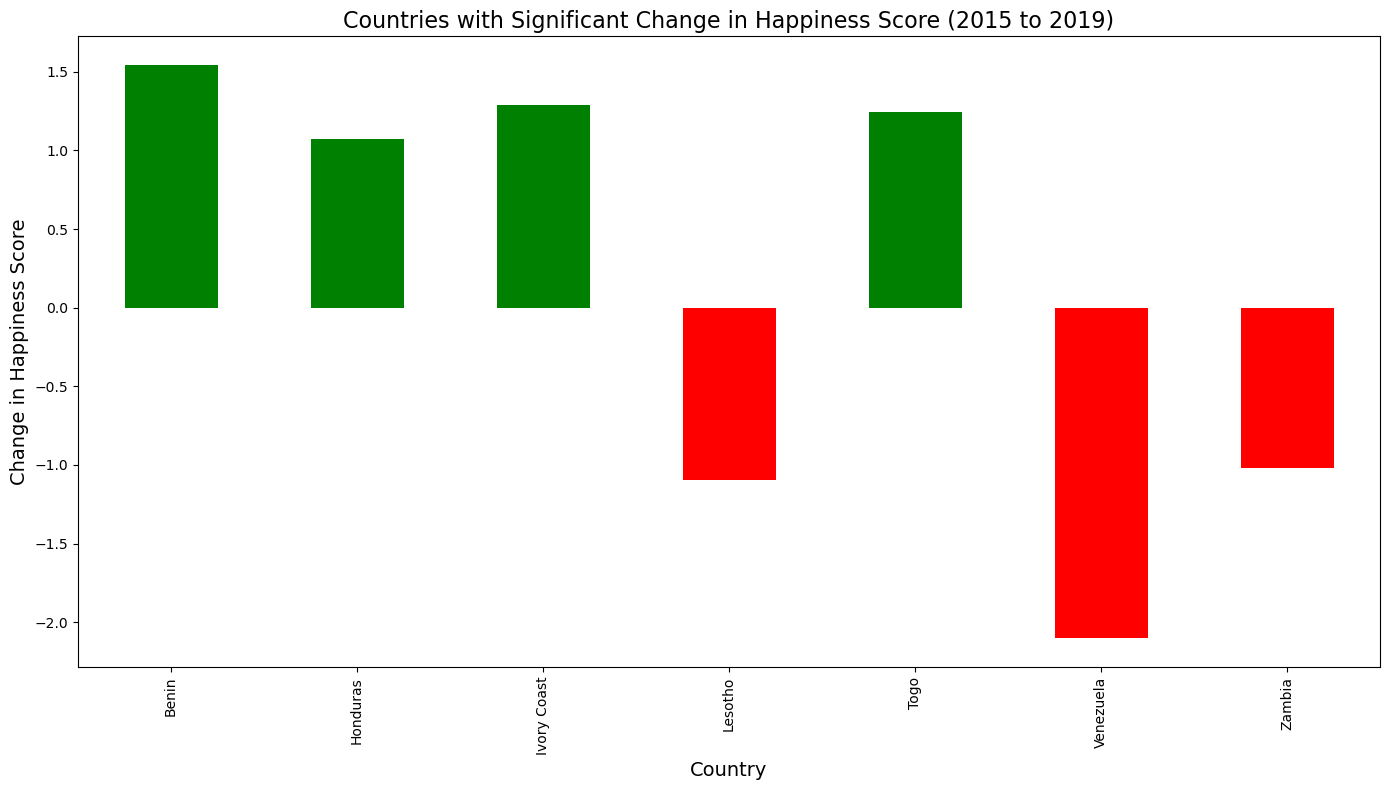

In [387]:
# Plot the bar chart for countries with significant changes
plt.figure(figsize=(14, 8))
significant_changes['Change_2015_2019'].plot(kind='bar', color=['green' if x > 0 else 'red' for x in significant_changes['Change_2015_2019']])

# Add labels and title
plt.title('Countries with Significant Change in Happiness Score (2015 to 2019)', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Change in Happiness Score', fontsize=14)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


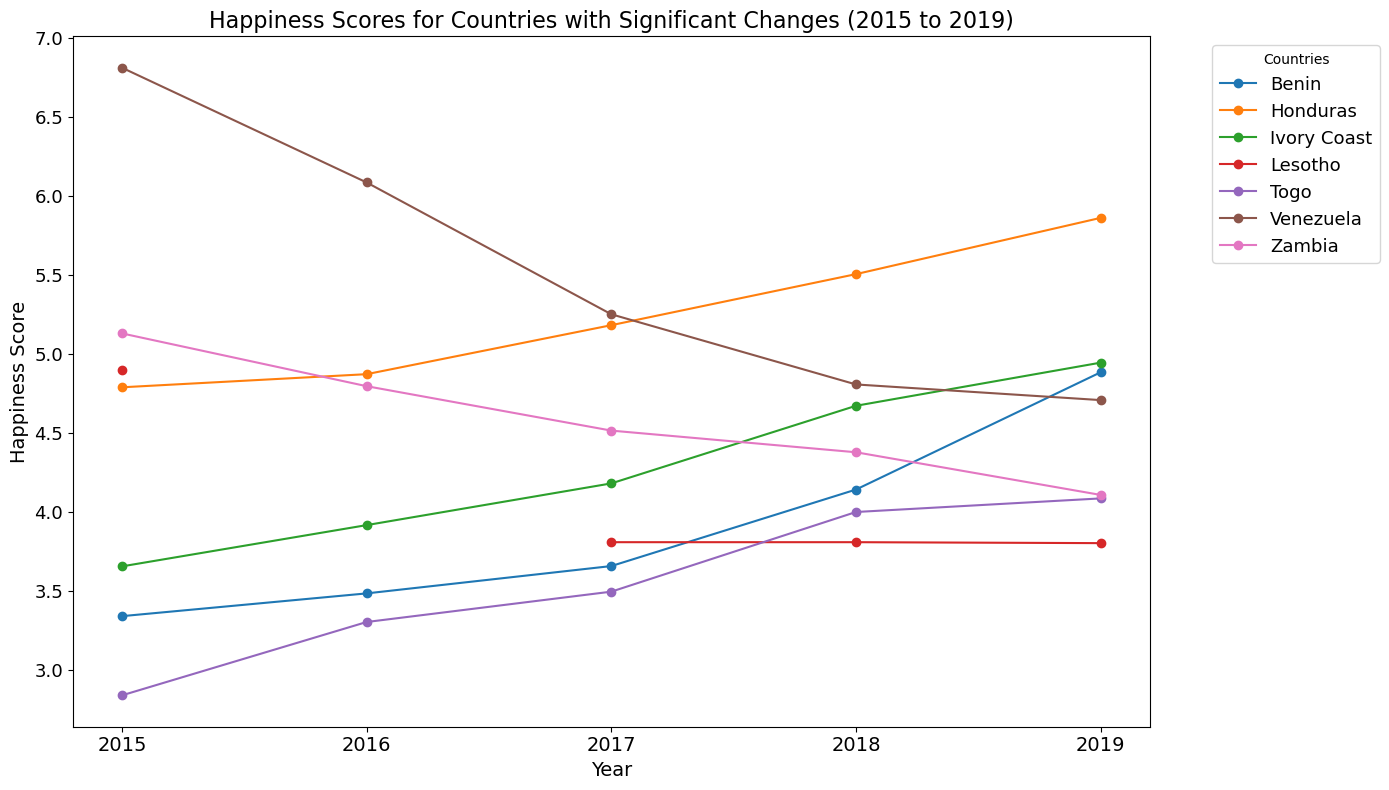

In [400]:

# filtering the countries that experienced significant changes
significant_changes = pivot_df[abs(pivot_df[2019] - pivot_df[2015]) >= threshold]

# Plotting the line chart for significant changes
plt.figure(figsize=(14, 8))

# Loop through each country and plot their happiness scores
for country in significant_changes.index:
    plt.plot(significant_changes.columns, significant_changes.loc[country], marker='o', label=country)

# Add labels and title
plt.title('Happiness Scores for Countries with Significant Changes (2015 to 2019)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Happiness Score', fontsize=14)
plt.xticks([2015, 2016, 2017, 2018, 2019], fontsize=14)
plt.yticks(fontsize=13)
plt.legend(title='Countries', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=13)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

### Saudi Arabia Happiness Over the Years

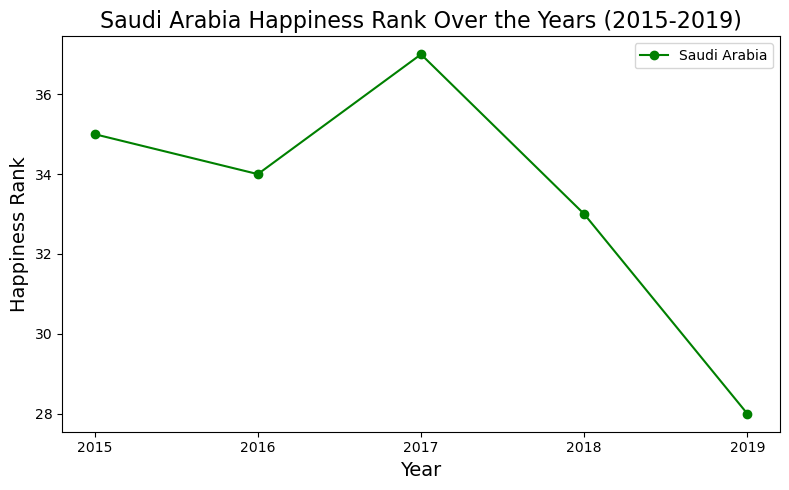

In [404]:
# Extract the rank for Saudi Arabia in each year
saudi_ranks = {
    2015: happiness2015[happiness2015['Country'] == 'Saudi Arabia']['Overall_rank'].values[0],
    2016: happiness2016[happiness2016['Country'] == 'Saudi Arabia']['Overall_rank'].values[0],
    2017: happiness2017[happiness2017['Country'] == 'Saudi Arabia']['Overall_rank'].values[0],
    2018: happiness2018[happiness2018['Country'] == 'Saudi Arabia']['Overall_rank'].values[0],
    2019: happiness2019[happiness2019['Country'] == 'Saudi Arabia']['Overall_rank'].values[0]
}

# Create a DataFrame for Saudi Arabia's rank over the years
saudi_ranks_df = pd.DataFrame(list(saudi_ranks.items()), columns=['Year', 'Rank'])

# Plot the data
plt.figure(figsize=(8, 5))
plt.plot(saudi_ranks_df['Year'], saudi_ranks_df['Rank'], marker='o', color='g', label='Saudi Arabia')
plt.title('Saudi Arabia Happiness Rank Over the Years (2015-2019)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Happiness Rank', fontsize=14)
plt.xticks([2015, 2016, 2017, 2018, 2019])
plt.legend()
plt.tight_layout()
plt.show()

### Factors that Contributed the Most for Saudi Arabia Happiness Rank

In [432]:

# Filter the data for Saudi Arabia
saudi_factors = {
    2015: happiness2015[happiness2015['Country'] == 'Saudi Arabia'].iloc[0],
    2016: happiness2016[happiness2016['Country'] == 'Saudi Arabia'].iloc[0],
    2017: happiness2017[happiness2017['Country'] == 'Saudi Arabia'].iloc[0],
    2018: happiness2018[happiness2018['Country'] == 'Saudi Arabia'].iloc[0],
    2019: happiness2019[happiness2019['Country'] == 'Saudi Arabia'].iloc[0]
}

# Define the factors for 2015-2017 and 2018-2019
factors_2015_2017 = ['GDP_per_capita', 'Family', 'Healthy_life_expectancy', 'Freedom', 'Perceptions_of_corruption', 'Generosity']
factors_2018_2019 = ['GDP_per_capita', 'Social_support', 'Healthy_life_expectancy', 'Freedom_to_make_life_choices', 'Perceptions_of_corruption', 'Generosity']

# Create a subplot with 3 rows and 2 columns
fig = make_subplots(rows=3, cols=2, subplot_titles=[f'Saudi Arabia: {year} Happiness Factors' for year in [2015, 2016, 2017, 2018, 2019]], specs=[[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]])

# Plot each year's factors
row_col_positions = [(1, 1), (1, 2), (2, 1), (2, 2), (3, 1)]
for i, year in enumerate([2015, 2016, 2017, 2018, 2019]):
    factors = factors_2015_2017 if year <= 2017 else factors_2018_2019
    data = saudi_factors[year][factors]
    fig.add_trace(go.Pie(labels=factors, values=data, textinfo='percent+label', hole=0.4), row=row_col_positions[i][0], col=row_col_positions[i][1])

# Update layout for better readability
fig.update_layout(height=900, width=1000, title_text='Saudi Arabia Happiness Factors (2015-2019)', showlegend=False)
fig.show()

# Template Owner
Tuwaiq Academy - Eng. Esra Madi
# Author
Yaqeen

# Refrences
1. World Happiness Report. (n.d.). About the World Happiness Report. Sustainable Development Solutions Network. Retrieved February 7, 2025, from https://worldhappiness.report/about/

2. Helliwell, John F., Richard Layard, and Jeffrey Sachs, eds. 2015. World Happiness Report 2015. New York: Sustainable Development Solutions Network.
3. World Health Organization. (n.d.). Healthy life expectancy (HALE). World Health Organization. https://www.who.int/data/gho/indicator-metadata-registry/imr-details/65#:~:text=Definition%3A,%2C%20territory%2C%20or%20geographic%20area